# House Prices: Advanced Regression Techniques

**Name**: Khandker Sadia Rahman

**ABSTRACT**
---
*There are several factors that affect the overall price of the house. Some of the factors are more tangible as the quality of the house and other factors are more intrinsic such as the performance of the economy. This assignment is based on a dataset that provides a number of features with a possible effect on the sale price of the house. There is a train and a test dataset, the train dataset provides a number of examples with the features along with the sale price. On the otherhand, the test dataset consists of a number of examples with features without the sale price. *

*The main task of this assignment is to develop a predictive neural network which predicts the sale price of the test dataset. In order to develop the model, the software used is "JUPYTER NOTEBOOK" of "ANACONDA". In other words, python programming is used.*


**IMPORTING REQUIRED LIBRARIES**

---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr



**EXTRACTING CSV FILE**

---



In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


**OVERALL VIEW OF THE DATASET**

---



**Sale Price**

In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Missing data in both train and test dataset**

In [4]:
missing=pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
missing[missing.sum(axis=1) > 0]

train    test
Alley          1369  1352.0
BsmtCond         37    45.0
BsmtExposure     38    44.0
BsmtFinSF1        0     1.0
BsmtFinSF2        0     1.0
BsmtFinType1     37    42.0
BsmtFinType2     38    42.0
BsmtFullBath      0     2.0
BsmtHalfBath      0     2.0
BsmtQual         37    44.0
BsmtUnfSF         0     1.0
Electrical        1     0.0
Exterior1st       0     1.0
Exterior2nd       0     1.0
Fence          1179  1169.0
FireplaceQu     690   730.0
Functional        0     2.0
GarageArea        0     1.0
GarageCars        0     1.0
GarageCond       81    78.0
GarageFinish     81    78.0
GarageQual       81    78.0
GarageType       81    76.0
GarageYrBlt      81    78.0
KitchenQual       0     1.0
LotFrontage     259   227.0
MSZoning          0     4.0
MasVnrArea        8    15.0
MasVnrType        8    16.0
MiscFeature    1406  1408.0
PoolQC         1453  1456.0
SaleType          0     1.0
TotalBsmtSF       0     1.0
Utilities         0     2.0

**Train Set**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

**CORRELATION MATRIX OF TRAIN SET**

---
This gives an overall idea of the relationship between the features and the sale price

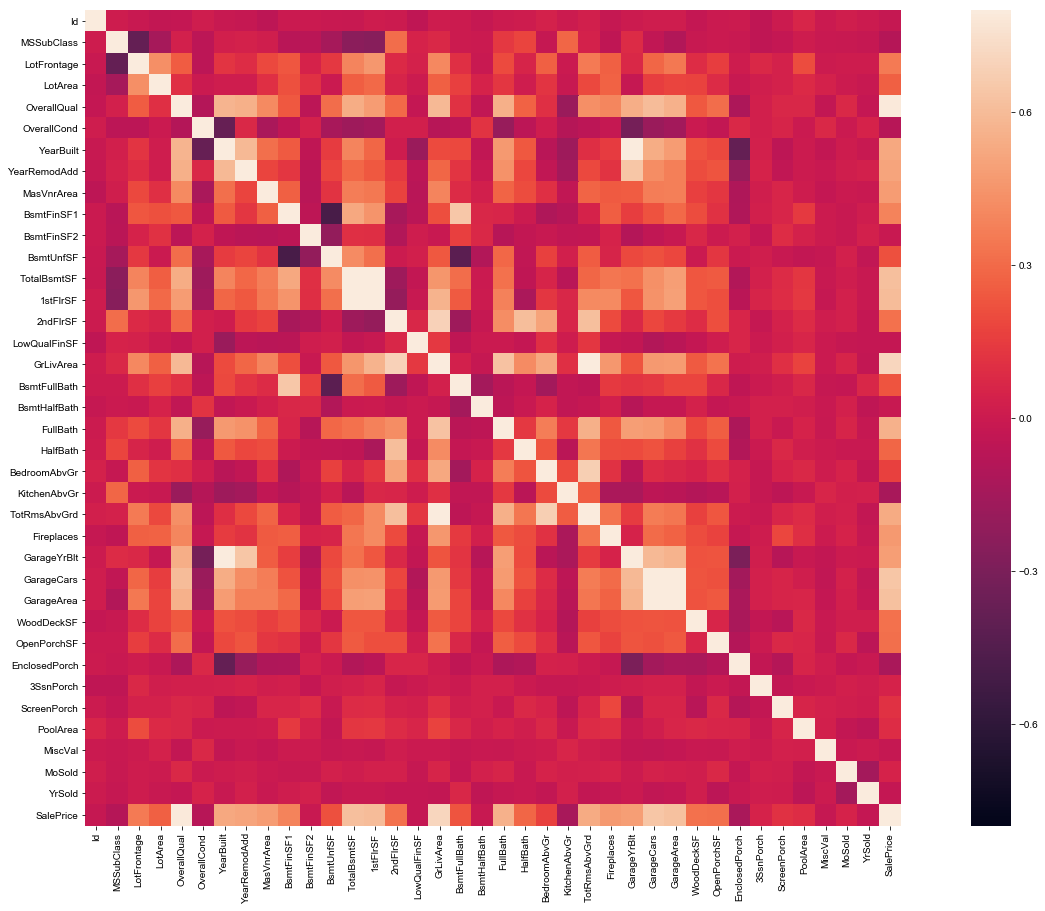

In [7]:
corrMat=train.corr()
f, ax = plt.subplots(figsize=(25,15))
fig1=sns.heatmap(corrMat,vmin=-0.8, vmax=0.8, square=True)
sns.set(font_scale=1)
plt.show(fig1)

**Relationship between the saleprice and the features**

[In descending order]


In [8]:
k=len(train.columns)
cols=corrMat.nlargest(k,"SalePrice")['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)
print(cols)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


**DATA ANALYSIS**
---
In this segment, the main focus is to have a better understanding of the features involved in the data.


**SPLITTING THE DATA IN DIFFERENT CATEGORIES**

---



In [9]:
#Surrounding environment
outsidesurr_df = train[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

#Building
building_df = train[['Id', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

#Utilities
utilities_df = train[['Id', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

#Ratings
ratings_df = train[['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

#Rooms
rooms_df = train[['Id', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]

# Set Id as index of the dataframe.
outsidesurr_df = outsidesurr_df.set_index('Id')
building_df = building_df.set_index('Id')
utilities_df = utilities_df.set_index('Id')
ratings_df = ratings_df.set_index('Id')
rooms_df = rooms_df.set_index('Id')

# Move SalePrice to the first column (Our Label)
sp0 = outsidesurr_df['SalePrice']
outsidesurr_df.drop(labels=['SalePrice'], axis=1, inplace=True)
outsidesurr_df.insert(0, 'SalePrice', sp0)

sp1 = building_df['SalePrice']
building_df.drop(labels=['SalePrice'], axis=1, inplace=True)
building_df.insert(0, 'SalePrice', sp1)

sp2 = utilities_df['SalePrice']
utilities_df.drop(labels=['SalePrice'], axis=1, inplace=True)
utilities_df.insert(0, 'SalePrice', sp2)

sp3 = ratings_df['SalePrice']
ratings_df.drop(labels=['SalePrice'], axis=1, inplace=True)
ratings_df.insert(0, 'SalePrice', sp3)

sp4 = rooms_df['SalePrice']
rooms_df.drop(labels=['SalePrice'], axis=1, inplace=True)
rooms_df.insert(0, 'SalePrice', sp4)


**BASIC INSIGHT OF THE DATA**

---



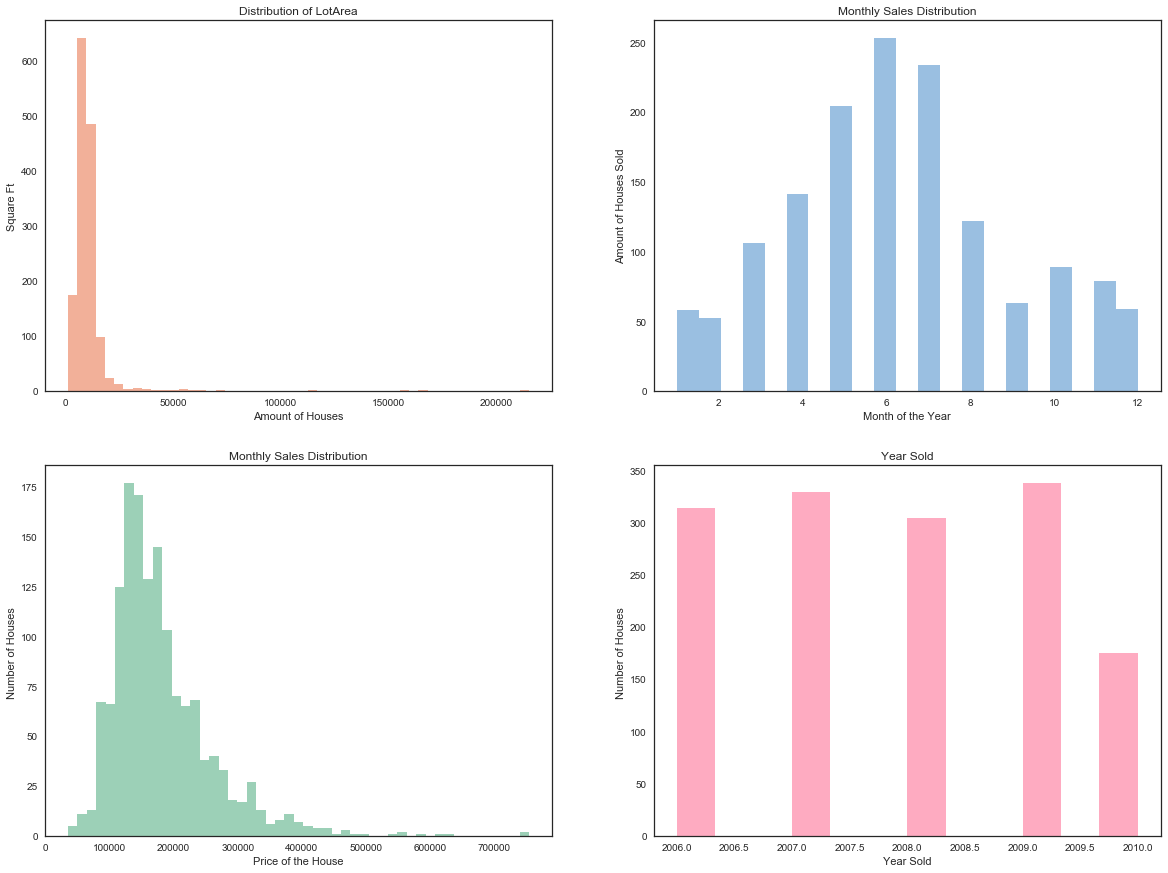

In [10]:
sns.set_style('white')

f, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,15))

# Lot Area: In Square Feet
sns.distplot(train['LotArea'], kde=False, color="#DF3A01", ax=axes[0,0]).set_title("Distribution of LotArea")
axes[0,0].set_ylabel("Square Ft")
axes[0,0].set_xlabel("Amount of Houses")

# MoSold: Year of the Month sold
sns.distplot(train['MoSold'], kde=False, color="#045FB4", ax=axes[0,1]).set_title("Monthly Sales Distribution")
axes[0,1].set_ylabel("Amount of Houses Sold")
axes[0,1].set_xlabel("Month of the Year")

# House Value
sns.distplot(train['SalePrice'], kde=False, color="#088A4B", ax=axes[1,0]).set_title("Monthly Sales Distribution")
axes[1,0].set_ylabel("Number of Houses ")
axes[1,0].set_xlabel("Price of the House")

# YrSold: Year the house was sold.
sns.distplot(train['YrSold'], kde=False, color="#FE2E64", ax=axes[1,1]).set_title("Year Sold")
axes[1,1].set_ylabel("Number of Houses ")
axes[1,1].set_xlabel("Year Sold")

plt.show()

**RIGHT SKEWED DISTRIBUTION OF SALEPRICE**

---

A right skew or positive skew means the mean of the data at most of the times is on the right of the median. This can be converted in a normal distribution by using LOG TRANSFORMATION.

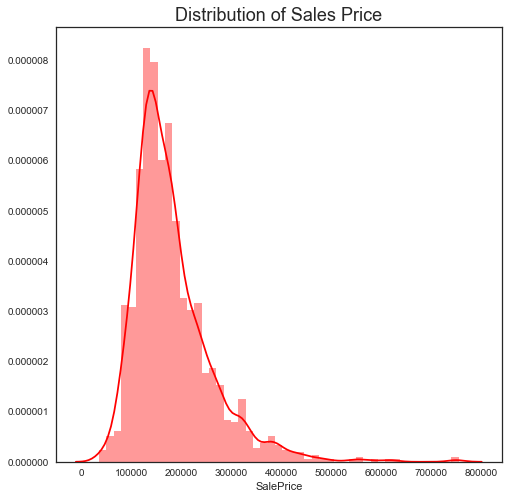

In [11]:
plt.figure(figsize=(8,8))
sns.distplot(train['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()

**LEVEL OF SUPPLY AND DEMAND**

---
Visualizing how the housing market performed during those years 

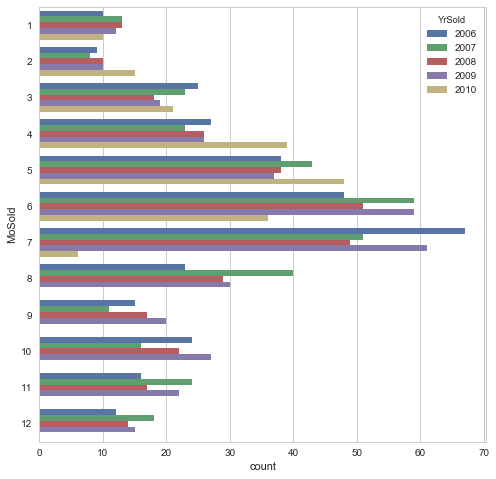

In [12]:
# Houses sold per month each year
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))
sns.countplot(y="MoSold", hue="YrSold", data=train)
plt.show()

In [13]:
#Houses sold per year
plt.figure(figsize=(8,8))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

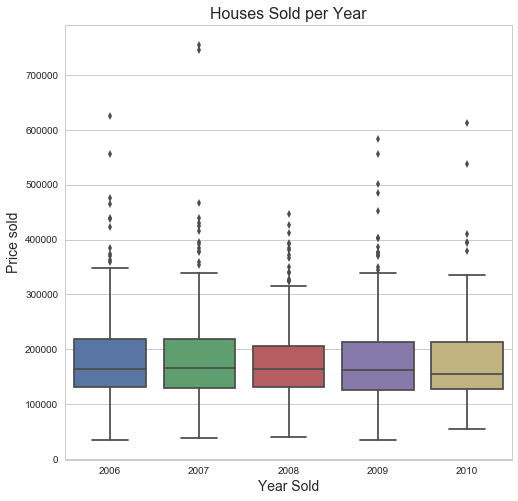

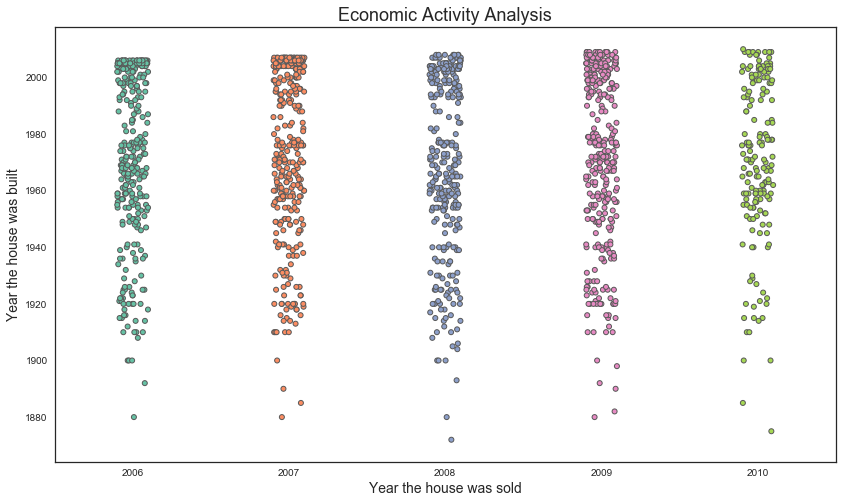

In [14]:
#Year built versus year sold
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='YrSold', y='YearBuilt', data=train, jitter=True, palette="Set2", linewidth=1)
plt.title('Economic Activity Analysis', fontsize=18)
plt.xlabel('Year the house was sold', fontsize=14)
plt.ylabel('Year the house was built', rotation=90, fontsize=14)
plt.show()

**SURROUNDING FEATURES**

---

An in-depth analysis of how the outside surrounding affect the price

In [15]:
outsidesurr_df.describe()

SalePrice  LotFrontage        LotArea       MoSold       YrSold
count    1460.000000  1201.000000    1460.000000  1460.000000  1460.000000
mean   180921.195890    70.049958   10516.828082     6.321918  2007.815753
std     79442.502883    24.284752    9981.264932     2.703626     1.328095
min     34900.000000    21.000000    1300.000000     1.000000  2006.000000
25%    129975.000000    59.000000    7553.500000     5.000000  2007.000000
50%    163000.000000    69.000000    9478.500000     6.000000  2008.000000
75%    214000.000000    80.000000   11601.500000     8.000000  2009.000000
max    755000.000000   313.000000  215245.000000    12.000000  2010.000000

In [16]:
outsidesurr_df.columns

Index(['SalePrice', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'Condition1', 'Condition2', 'PavedDrive', 'Street', 'Alley',
       'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType',
       'LotShape', 'SaleCondition'],
      dtype='object')

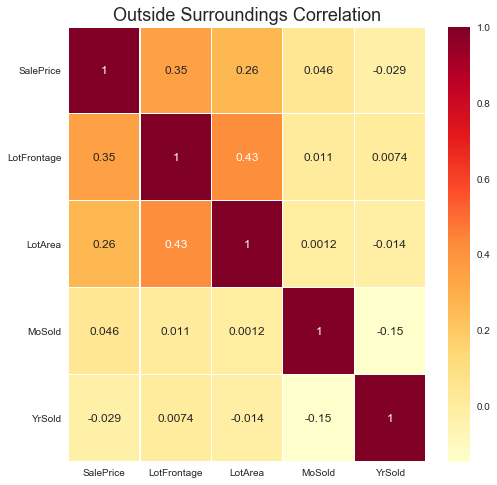

In [17]:
#Correlation matrix of the outside surroundings with the sale price
plt.style.use('seaborn-white')
corr = outsidesurr_df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title("Outside Surroundings Correlation", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**TYPE OF ZONING**

---

Effect of the different zones on the sales and the revenue earned

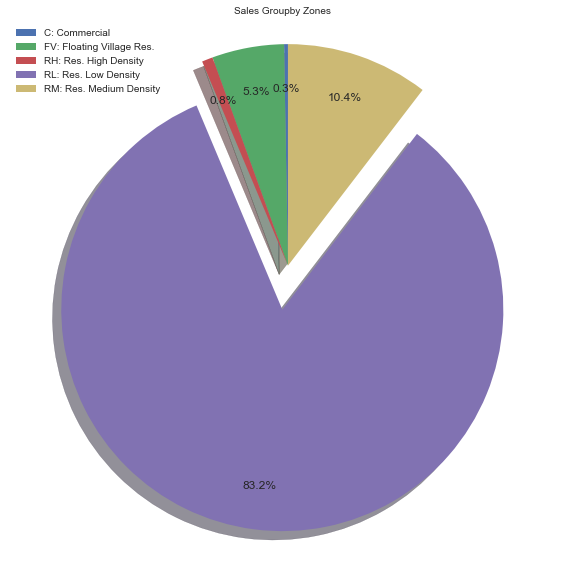

In [18]:
#Zone wise sales
plt.style.use('seaborn-white')
zoning_value = train.groupby(by=['MSZoning'], as_index=False)['SalePrice'].sum()
zoning = zoning_value['MSZoning'].values.tolist()

labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']
total_sales = zoning_value['SalePrice'].values.tolist()
explode = (0, 0, 0, 0.1, 0)

fig, ax1 = plt.subplots(figsize=(8,8))
texts = ax1.pie(total_sales, explode=explode, autopct='%.1f%%', shadow=True, startangle=90, pctdistance=0.8,
       radius=0.5)

ax1.axis('equal')
plt.title('Sales Groupby Zones', fontsize=10)
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

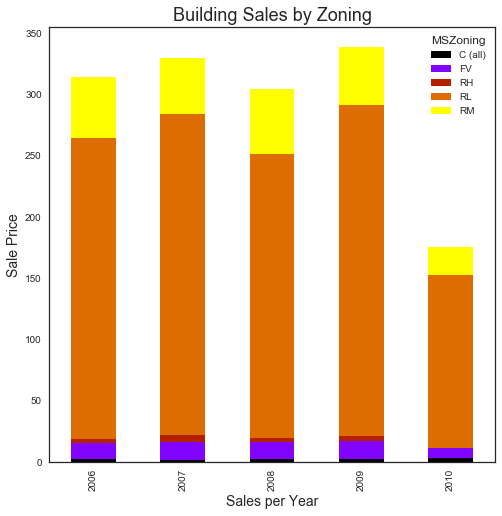

In [19]:
#Zone wise sale price each year
plt.style.use('seaborn-white')
SalesbyZone = train.groupby(['YrSold','MSZoning']).SalePrice.count()
SalesbyZone.unstack().plot(kind='bar',stacked=True, colormap= 'gnuplot',  
                           grid=False,  figsize=(8,8))
plt.title('Building Sales by Zoning', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Sales per Year', fontsize=14)
plt.show()

**NEIGHBORHOODS**

---

Sales in each neighborhood and which neighborhood is expensive

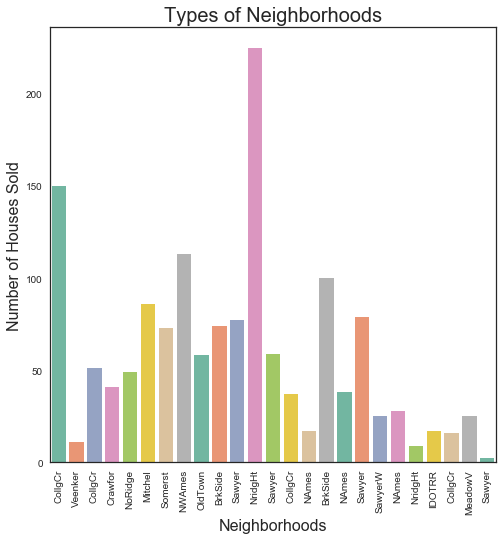

In [20]:
#Number of houses sold in each neighborhood
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Neighborhood", data=train, palette="Set2")
ax.set_title("Types of Neighborhoods", fontsize=20)
ax.set_xlabel("Neighborhoods", fontsize=16)
ax.set_ylabel("Number of Houses Sold", fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] ,rotation=90)
plt.show()

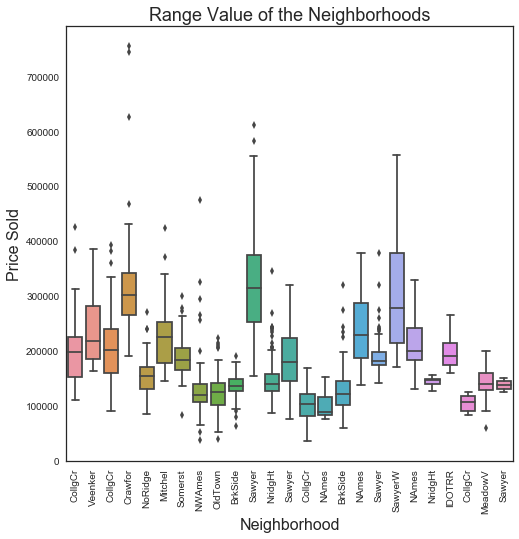

In [21]:
#Expense of each neighborhood
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train)
ax.set_title("Range Value of the Neighborhoods", fontsize=18)
ax.set_ylabel('Price Sold', fontsize=16)
ax.set_xlabel('Neighborhood', fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] , rotation=90)
plt.show()

**INFLUENCE OF SPACE**

---
How does the space affect the sale price

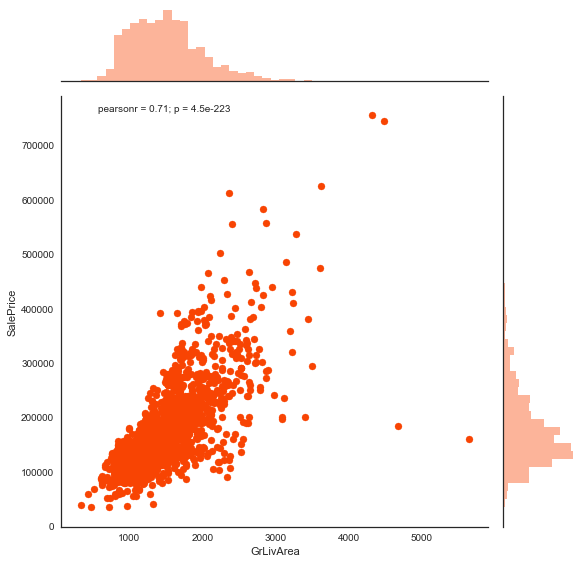

In [22]:
#Effect of living area
sns.jointplot(x='GrLivArea',y='SalePrice',data=train,
              cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

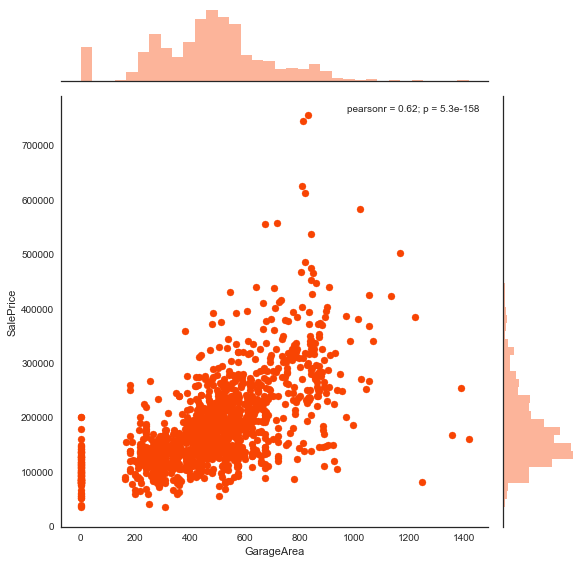

In [23]:
#Effect of Garage area
sns.jointplot(x='GarageArea',y='SalePrice',data=train,
              cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

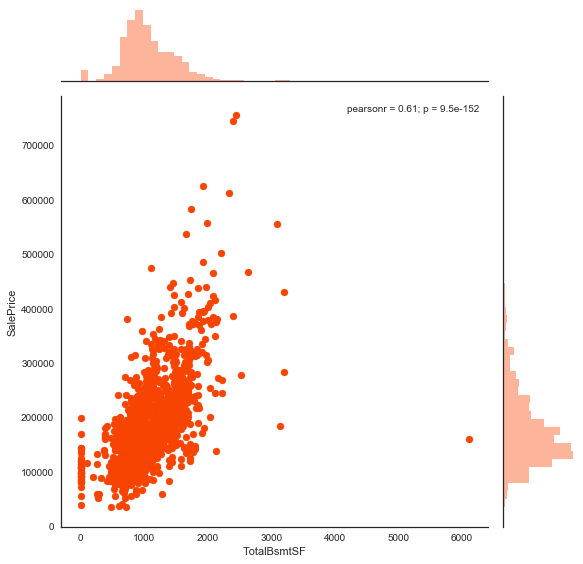

In [24]:
#Effect of basement area
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=train,
              cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

In [25]:
#Effect of Lot area and Lot frontage
plt.figure(figsize=(10,4))
plt.subplot(121)
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=train)
ax.set_title("Lot Frontage vs Sale Price", fontsize=12)

plt.subplot(122)
ax1 = sns.regplot(x="LotArea", y="SalePrice", data=train, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=12)


**BUILDING CHARACTERISTICS**

---



In [26]:
building_df.head()

SalePrice  MSSubClass BldgType HouseStyle  YearBuilt  YearRemodAdd  \
Id                                                                       
1      208500          60     1Fam     2Story       2003          2003   
2      181500          20     1Fam     1Story       1976          1976   
3      223500          60     1Fam     2Story       2001          2002   
4      140000          70     1Fam     2Story       1915          1970   
5      250000          60     1Fam     2Story       2000          2000   

   RoofStyle RoofMatl Exterior1st Exterior2nd      ...       Functional  \
Id                                                 ...                    
1      Gable  CompShg     VinylSd     VinylSd      ...              Typ   
2      Gable  CompShg     MetalSd     MetalSd      ...              Typ   
3      Gable  CompShg     VinylSd     VinylSd      ...              Typ   
4      Gable  CompShg     Wd Sdng     Wd Shng      ...              Typ   
5      Gable  CompShg     VinylSd     VinylSd      ...              Typ   

    GarageType GarageYrBlt GarageFinish GarageCars  GarageArea MoSold  YrSold  \
Id                                                                              
1       Attchd      2003.0          RFn          2         548      2    2008   
2       Attchd      1976.0          RFn          2         460      5    2007   
3       Attchd      2001.0          RFn          2         608      9    2008   
4       Detchd      1998.0          Unf          3         642      2    2006   
5       Attchd      2000.0          RFn          3         836     12    2008   

    SaleType  SaleCondition  
Id                           
1         WD         Normal  
2         WD         Normal  
3         WD         Normal  
4         WD        Abnorml  
5         WD         Normal  

[5 rows x 23 columns]

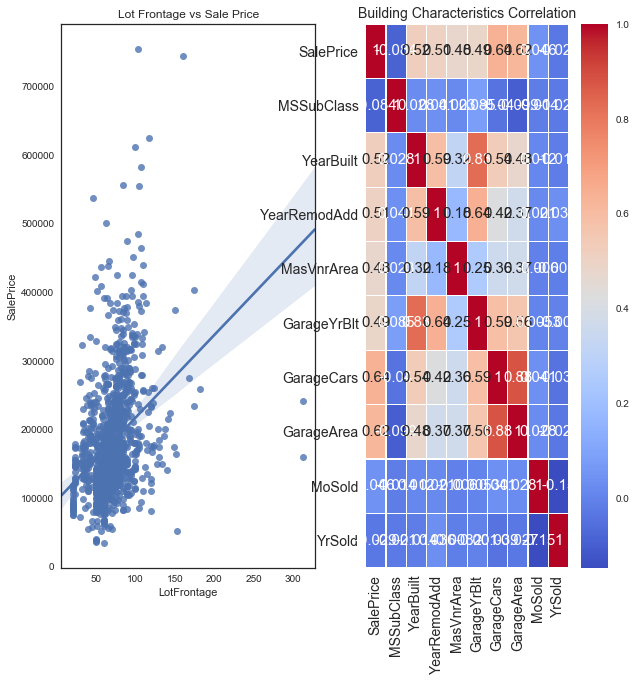

In [27]:
# Correlation map of building characteristics
corr = building_df.corr()
g = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':15})
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Building Characteristics Correlation", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [28]:
# Dividing the data into different price ranges
train['Price_Range'] = np.nan
lst = [train]
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'
    
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities     ...      PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub     ...         NaN   NaN         NaN       0      2   
1         Lvl    AllPub     ...         NaN   NaN         NaN       0      5   
2         Lvl    AllPub     ...         NaN   NaN         NaN       0      9   
3         Lvl    AllPub     ...         NaN   NaN         NaN       0      2   
4         Lvl    AllPub     ...         NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  Price_Range  
0   2008       WD         Normal     208500       Medium  
1   2007       WD         Normal     181500       Medium  
2   2008       WD         Normal     223500       Medium  
3   2006       WD        Abnorml     140000          Low  
4   2008       WD         Normal     250000       Medium  

[5 rows x 82 columns]

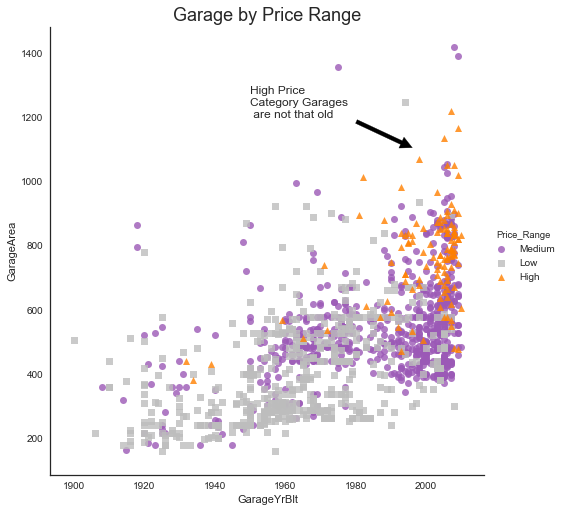

In [29]:
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=train, hue='Price_Range', fit_reg=False, size=7, palette=palette,
          markers=["o", "s", "^"])
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

**MISCELLANEOUS AND UTILITIES**

---



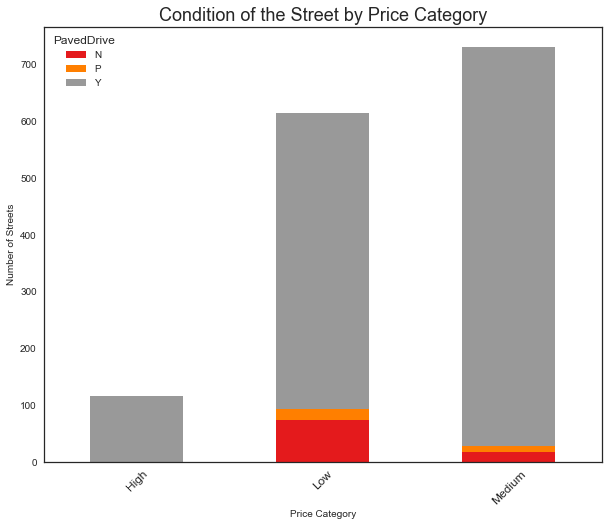

In [30]:
plt.style.use('seaborn-white')
types_foundations = train.groupby(['Price_Range', 'PavedDrive']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='Set1', figsize=(10,8), grid=False)
plt.ylabel('Number of Streets', fontsize=10)
plt.xlabel('Price Category', fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.title('Condition of the Street by Price Category', fontsize=18)
plt.show()

**FEATURE ENGINEERING**
---

In this section, the missing data and the categorical features are remodelled for the requirement of the neural network

**COMBINING TEST AND TRAIN DATA**

---



In [31]:
target=train["SalePrice"]
test1=test
data=train
data=data.drop(["Id","SalePrice"],axis=1)
test1=test1.drop(["Id"],axis=1)
data=pd.concat([data,test1])

**DEALING WITH MISSING DATA **

---

In [32]:
#Checking the missing data 
totalMissing=data.isnull().sum().sort_values(ascending=False)
percentMissing=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([totalMissing,percentMissing],axis=1,keys=["total","percentage"])

missingData.head(10)


total  percentage
PoolQC         2909    0.996574
MiscFeature    2814    0.964029
Alley          2721    0.932169
Fence          2348    0.804385
Price_Range    1459    0.499829
FireplaceQu    1420    0.486468
LotFrontage     486    0.166495
GarageQual      159    0.054471
GarageYrBlt     159    0.054471
GarageFinish    159    0.054471

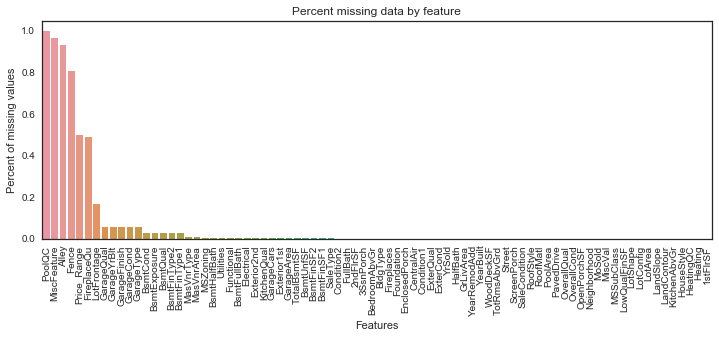

In [33]:
#Visualizing the missing data
f, ax = plt.subplots(figsize=(12,4))
plt.xticks(rotation='90')
sns.barplot(x=missingData.index, y=missingData["percentage"])
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by feature')
plt.show()

In [34]:
#For the following columns, the missing data indicates that the feature isn't available
#Hence categorical features are replaced by "None" and the numerical data are replaced by 0
for col in ("PoolQC","MiscFeature","Alley","Fence","FireplaceQu","MasVnrType","MasVnrArea"):
    data[col] = data[col].fillna('None')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] =data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)


#For the following features, the missing data is replaced by the most occuring feature element  
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data["Functional"] =data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] =data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


#All records of utilities are "AllPub", except for one "NoSeWa" and 2 NA 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling.
#Price range was included for statistical visualization, it can be ignored for futher processes 
data = data.drop(['Utilities'], axis=1)
data = data.drop(['Price_Range'], axis=1)

In [35]:
#Rechecking for any missing data
totalMissing=data.isnull().sum().sort_values(ascending=False)
percentMissing=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([totalMissing,percentMissing],axis=1,keys=["total","percentage"])
missingData.head(5)

total  percentage
YrSold           0         0.0
Foundation       0         0.0
ExterCond        0         0.0
ExterQual        0         0.0
Exterior1st      0         0.0

**SKEWED DISTRIBUTION MADE INTO NORMAL DISTRIBUTION**

---

[For GrLivArea and 1stFlrSF]

In [36]:
def plots(pd):
    sns.distplot(pd,fit=norm)
    plt.figure()
    prob=stats.probplot(pd,plot=plt)
    plt.show()  
    

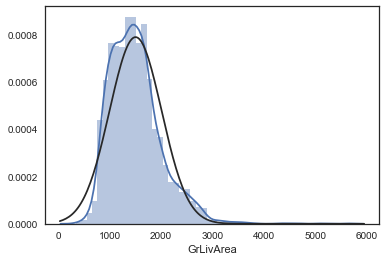

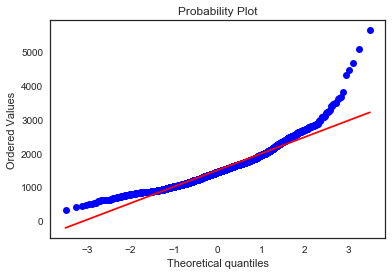

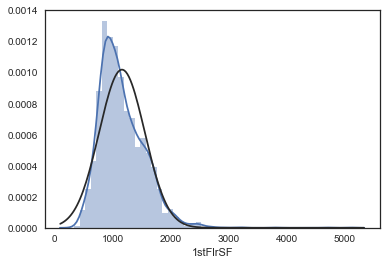

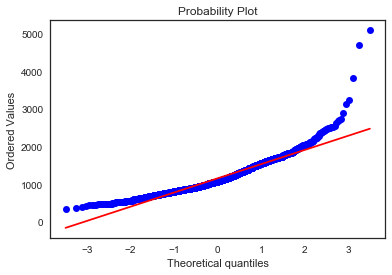

In [37]:
#Actual condition
plots(data["GrLivArea"])
plots(data["1stFlrSF"])

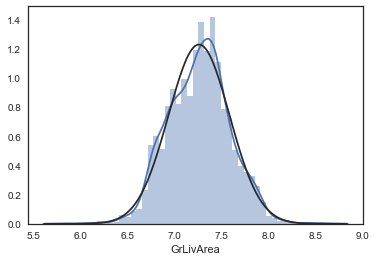

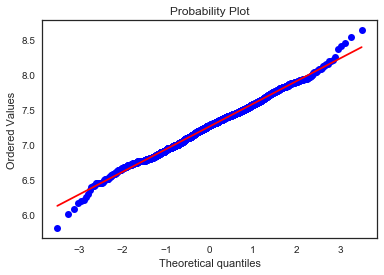

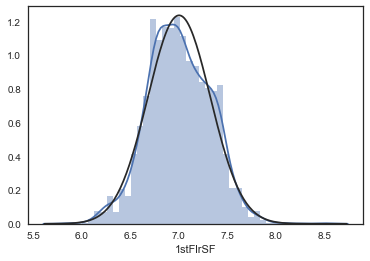

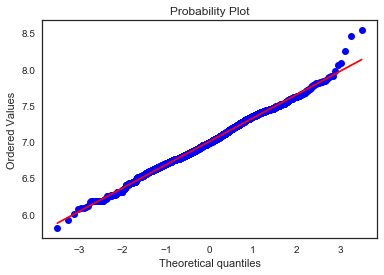

In [38]:
#Converted to normal distribution
data["GrLivArea"]=np.log(data["GrLivArea"])
plots(data["GrLivArea"])
data["1stFlrSF"]=np.log(data["1stFlrSF"])
plots(data["1stFlrSF"])


**CONVERT CATEGORICAL DATA TO NUMERICAL DATA**

---

In [39]:
from sklearn.preprocessing import LabelEncoder
cols=data.columns
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

**NEURAL NETWORK MODEL**
---



**IMPORTING REQUIRED LIBRARIES**

---



In [40]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout,BatchNormalization
from keras.optimizers import SGD,Adagrad
from keras.metrics import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm



Using TensorFlow backend.


**TOUCH UPS BEFORE MODEL DESIGN**

---



In [41]:
#Converting the dataframe into numpy array for keras
trainSet=data[0:len(train)]
testSet=data[len(train):len(data)]
x=np.array(trainSet)
y=np.array(target)
testSet1=np.array(testSet)

#Defining error function
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


**DESIGNING A MODEL**

A good way to start designing a neural network is to design a large network and prune the nodes with very low weights. In this model, one hidden layer is used along with the input and output layer. Almost everything is same in both the models except one major difference. The number of dropout varies.

***MODEL 1***

---



In [42]:
# With 1 layer of dropout
i=1200
j=0.90
model=Sequential()
model.add(Dense(i,input_dim=78,activation="relu"))
model.add(Dense(i,activation='relu'))
model.add(Dropout(j))

model.add( Dense(1,activation="relu"))
model.compile(loss="mse",optimizer="adam",metrics=[coeff_determination])
model.fit(x,y,batch_size=90,validation_split=0.2,epochs=500,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 - 1s - loss: 36804416575.1233 - coeff_determination: -5.2511e+00 - val_loss: 33629610713.4247 - val_coeff_determination: -4.4846e+00
Epoch 2/500
 - 1s - loss: 24630451547.1781 - coeff_determination: -3.3771e+00 - val_loss: 13220010615.2329 - val_coeff_determination: -1.1046e+00
Epoch 3/500
 - 1s - loss: 5615271769.8630 - coeff_determination: 0.0247 - val_loss: 4708915252.6027 - val_coeff_determination: 0.2393
Epoch 4/500
 - 1s - loss: 4076533092.8219 - coeff_determination: 0.3186 - val_loss: 2876646661.2603 - val_coeff_determination: 0.5755
Epoch 5/500
 - 1s - loss: 3074368522.5205 - coeff_determination: 0.4841 - val_loss: 2781707192.9863 - val_coeff_determination: 0.5905
Epoch 6/500
 - 1s - loss: 2612645670.3562 - coeff_determination: 0.5612 - val_loss: 2705516643.0685 - val_coeff_determination: 0.5931
Epoch 7/500
 - 1s - loss: 2679690594.1918 - coeff_determination: 0.5325 - val_loss: 2554122287.3425 - val_coeff_determination

Epoch 62/500
 - 1s - loss: 1930575122.8493 - coeff_determination: 0.6833 - val_loss: 1960727292.4932 - val_coeff_determination: 0.7165
Epoch 63/500
 - 1s - loss: 1900740200.9863 - coeff_determination: 0.6877 - val_loss: 2055854656.0000 - val_coeff_determination: 0.7051
Epoch 64/500
 - 1s - loss: 1859720384.0000 - coeff_determination: 0.6858 - val_loss: 1980017650.8493 - val_coeff_determination: 0.7069
Epoch 65/500
 - 1s - loss: 1992347524.0548 - coeff_determination: 0.6736 - val_loss: 1922803841.3151 - val_coeff_determination: 0.7182
Epoch 66/500
 - 1s - loss: 1834927562.5205 - coeff_determination: 0.6904 - val_loss: 2017804359.4521 - val_coeff_determination: 0.7103
Epoch 67/500
 - 1s - loss: 2014244273.0959 - coeff_determination: 0.6576 - val_loss: 1927233024.0000 - val_coeff_determination: 0.7199
Epoch 68/500
 - 1s - loss: 1847251786.9589 - coeff_determination: 0.6798 - val_loss: 1933616793.8630 - val_coeff_determination: 0.7128
Epoch 69/500
 - 1s - loss: 1696320422.1370 - coeff_dete

Epoch 123/500
 - 1s - loss: 1798414537.5342 - coeff_determination: 0.7137 - val_loss: 1828235928.5479 - val_coeff_determination: 0.7321
Epoch 124/500
 - 1s - loss: 1517186372.7123 - coeff_determination: 0.7548 - val_loss: 1735260995.0685 - val_coeff_determination: 0.7434
Epoch 125/500
 - 1s - loss: 1719438335.1233 - coeff_determination: 0.7152 - val_loss: 1830221742.0274 - val_coeff_determination: 0.7309
Epoch 126/500
 - 1s - loss: 1658069856.5479 - coeff_determination: 0.7215 - val_loss: 1719508230.5753 - val_coeff_determination: 0.7402
Epoch 127/500
 - 1s - loss: 1624886948.2740 - coeff_determination: 0.7378 - val_loss: 1750397168.6575 - val_coeff_determination: 0.7333
Epoch 128/500
 - 1s - loss: 1676905256.8767 - coeff_determination: 0.7349 - val_loss: 1757034663.4521 - val_coeff_determination: 0.7332
Epoch 129/500
 - 1s - loss: 1542379513.4247 - coeff_determination: 0.7460 - val_loss: 1832027125.9178 - val_coeff_determination: 0.7153
Epoch 130/500
 - 1s - loss: 1634664376.1096 - co

Epoch 184/500
 - 1s - loss: 1390198433.3151 - coeff_determination: 0.7717 - val_loss: 1550759836.2740 - val_coeff_determination: 0.7656
Epoch 185/500
 - 1s - loss: 1536808437.4795 - coeff_determination: 0.7490 - val_loss: 1594298944.6575 - val_coeff_determination: 0.7604
Epoch 186/500
 - 1s - loss: 1342104601.7534 - coeff_determination: 0.7789 - val_loss: 1552397299.7260 - val_coeff_determination: 0.7638
Epoch 187/500
 - 1s - loss: 1347944426.5205 - coeff_determination: 0.7735 - val_loss: 1531861955.9452 - val_coeff_determination: 0.7679
Epoch 188/500
 - 1s - loss: 1386930742.5753 - coeff_determination: 0.7692 - val_loss: 1579757704.9863 - val_coeff_determination: 0.7635
Epoch 189/500
 - 1s - loss: 1326403815.1233 - coeff_determination: 0.7686 - val_loss: 1548161773.8082 - val_coeff_determination: 0.7623
Epoch 190/500
 - 1s - loss: 1474928320.4384 - coeff_determination: 0.7574 - val_loss: 1549480657.7534 - val_coeff_determination: 0.7613
Epoch 191/500
 - 1s - loss: 1216666639.4521 - co

Epoch 245/500
 - 1s - loss: 1259397402.8493 - coeff_determination: 0.7915 - val_loss: 1464713145.4247 - val_coeff_determination: 0.7740
Epoch 246/500
 - 1s - loss: 1309115444.6027 - coeff_determination: 0.7809 - val_loss: 1485250557.1507 - val_coeff_determination: 0.7691
Epoch 247/500
 - 1s - loss: 1167602784.4384 - coeff_determination: 0.8023 - val_loss: 1499552063.5616 - val_coeff_determination: 0.7737
Epoch 248/500
 - 1s - loss: 1231134386.7397 - coeff_determination: 0.7939 - val_loss: 1462109247.1233 - val_coeff_determination: 0.7779
Epoch 249/500
 - 1s - loss: 1337050639.4521 - coeff_determination: 0.7790 - val_loss: 1496986092.2740 - val_coeff_determination: 0.7640
Epoch 250/500
 - 1s - loss: 1216314414.0274 - coeff_determination: 0.7959 - val_loss: 1484533981.8082 - val_coeff_determination: 0.7747
Epoch 251/500
 - 1s - loss: 1219043977.7534 - coeff_determination: 0.7995 - val_loss: 1448842134.7945 - val_coeff_determination: 0.7797
Epoch 252/500
 - 1s - loss: 1216394502.0274 - co

Epoch 306/500
 - 1s - loss: 1310615661.8082 - coeff_determination: 0.7756 - val_loss: 1697159048.1096 - val_coeff_determination: 0.7435
Epoch 307/500
 - 1s - loss: 1322702396.9315 - coeff_determination: 0.7667 - val_loss: 1496712568.5479 - val_coeff_determination: 0.7735
Epoch 308/500
 - 1s - loss: 1198377116.0548 - coeff_determination: 0.8013 - val_loss: 1472956757.0411 - val_coeff_determination: 0.7736
Epoch 309/500
 - 1s - loss: 1237137679.0137 - coeff_determination: 0.7883 - val_loss: 1579981265.9726 - val_coeff_determination: 0.7652
Epoch 310/500
 - 1s - loss: 1225003448.6575 - coeff_determination: 0.7888 - val_loss: 1411724248.7671 - val_coeff_determination: 0.7820
Epoch 311/500
 - 1s - loss: 1181037801.0959 - coeff_determination: 0.8054 - val_loss: 1427837763.5068 - val_coeff_determination: 0.7720
Epoch 312/500
 - 1s - loss: 1192062895.7808 - coeff_determination: 0.7991 - val_loss: 1416081758.6849 - val_coeff_determination: 0.7818
Epoch 313/500
 - 1s - loss: 1235740555.6164 - co

Epoch 367/500
 - 1s - loss: 1218984590.4658 - coeff_determination: 0.7916 - val_loss: 1439139442.6301 - val_coeff_determination: 0.7772
Epoch 368/500
 - 1s - loss: 1054537416.5479 - coeff_determination: 0.8188 - val_loss: 1480170771.0685 - val_coeff_determination: 0.7635
Epoch 369/500
 - 1s - loss: 1299227515.8356 - coeff_determination: 0.7871 - val_loss: 1424219461.0411 - val_coeff_determination: 0.7713
Epoch 370/500
 - 1s - loss: 1124675497.6438 - coeff_determination: 0.8115 - val_loss: 1414487082.0822 - val_coeff_determination: 0.7774
Epoch 371/500
 - 1s - loss: 1187622740.4932 - coeff_determination: 0.8045 - val_loss: 1409594188.0548 - val_coeff_determination: 0.7806
Epoch 372/500
 - 1s - loss: 1096684913.9726 - coeff_determination: 0.8079 - val_loss: 1421186510.9041 - val_coeff_determination: 0.7832
Epoch 373/500
 - 1s - loss: 1063135900.1644 - coeff_determination: 0.8198 - val_loss: 1464868213.2603 - val_coeff_determination: 0.7754
Epoch 374/500
 - 1s - loss: 1230241763.0685 - co

Epoch 428/500
 - 1s - loss: 1198381873.9726 - coeff_determination: 0.8027 - val_loss: 1348617995.1781 - val_coeff_determination: 0.7859
Epoch 429/500
 - 1s - loss: 1156645114.4110 - coeff_determination: 0.7967 - val_loss: 1361020377.6438 - val_coeff_determination: 0.7883
Epoch 430/500
 - 1s - loss: 1032025982.1370 - coeff_determination: 0.8300 - val_loss: 1351011678.2466 - val_coeff_determination: 0.7897
Epoch 431/500
 - 1s - loss: 987900108.7123 - coeff_determination: 0.8318 - val_loss: 1427075048.9863 - val_coeff_determination: 0.7800
Epoch 432/500
 - 1s - loss: 1074840255.2329 - coeff_determination: 0.8199 - val_loss: 1359462586.5205 - val_coeff_determination: 0.7860
Epoch 433/500
 - 1s - loss: 1285699630.7397 - coeff_determination: 0.7880 - val_loss: 1351809444.1644 - val_coeff_determination: 0.7885
Epoch 434/500
 - 1s - loss: 1133799520.7671 - coeff_determination: 0.8131 - val_loss: 1378013576.3288 - val_coeff_determination: 0.7902
Epoch 435/500
 - 1s - loss: 1092190684.2740 - coe

Epoch 489/500
 - 1s - loss: 1012846879.0137 - coeff_determination: 0.8308 - val_loss: 1393014945.5342 - val_coeff_determination: 0.7833
Epoch 490/500
 - 1s - loss: 1106630077.6986 - coeff_determination: 0.8208 - val_loss: 1465117466.7397 - val_coeff_determination: 0.7768
Epoch 491/500
 - 1s - loss: 1058749880.8767 - coeff_determination: 0.8263 - val_loss: 1327424039.0137 - val_coeff_determination: 0.7916
Epoch 492/500
 - 1s - loss: 1089408423.7808 - coeff_determination: 0.8115 - val_loss: 1538822054.7945 - val_coeff_determination: 0.7625
Epoch 493/500
 - 1s - loss: 1113689961.9726 - coeff_determination: 0.8164 - val_loss: 1410736014.6849 - val_coeff_determination: 0.7862
Epoch 494/500
 - 1s - loss: 1063033834.9589 - coeff_determination: 0.8189 - val_loss: 1341803876.6027 - val_coeff_determination: 0.7848
Epoch 495/500
 - 1s - loss: 1154361011.1781 - coeff_determination: 0.8028 - val_loss: 1354890709.2603 - val_coeff_determination: 0.7878
Epoch 496/500
 - 1s - loss: 1229105653.1507 - co

**PREDICTION FOR TEST SET**

---



In [43]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("House-price.csv",index=False)

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.14416.



***MODEL 2***

---



In [44]:
# With 5 dropouts
i=1200
j=0.40
model=Sequential()
model.add(Dense(i,input_dim=78,activation="relu"))
model.add(Dense(i,activation='relu'))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add( Dense(1,activation="relu"))
model.compile(loss="mse",optimizer="adam",metrics=[coeff_determination])
model.fit(x,y,batch_size=90,validation_split=0.2,epochs=500,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 - 1s - loss: 36717877006.0274 - coeff_determination: -5.3267e+00 - val_loss: 33466053169.0959 - val_coeff_determination: -4.4575e+00
Epoch 2/500
 - 1s - loss: 24786245123.5068 - coeff_determination: -3.2371e+00 - val_loss: 13252202418.8493 - val_coeff_determination: -1.1093e+00
Epoch 3/500
 - 1s - loss: 6017825253.6986 - coeff_determination: -2.8710e-02 - val_loss: 4449296566.3562 - val_coeff_determination: 0.2850
Epoch 4/500
 - 1s - loss: 3952962403.0685 - coeff_determination: 0.3332 - val_loss: 2829818346.9589 - val_coeff_determination: 0.5818
Epoch 5/500
 - 1s - loss: 3223761132.7123 - coeff_determination: 0.4783 - val_loss: 2764091709.3699 - val_coeff_determination: 0.5930
Epoch 6/500
 - 1s - loss: 3111615575.6712 - coeff_determination: 0.4756 - val_loss: 2641244457.2055 - val_coeff_determination: 0.6080
Epoch 7/500
 - 1s - loss: 2734460399.7808 - coeff_determination: 0.5426 - val_loss: 2553338313.6438 - val_coeff_determin

Epoch 62/500
 - 1s - loss: 2256049498.9589 - coeff_determination: 0.6301 - val_loss: 1969822747.6164 - val_coeff_determination: 0.7147
Epoch 63/500
 - 1s - loss: 2088052745.4247 - coeff_determination: 0.6555 - val_loss: 2135861483.8356 - val_coeff_determination: 0.6938
Epoch 64/500
 - 1s - loss: 2196623350.7945 - coeff_determination: 0.6461 - val_loss: 1971318040.5479 - val_coeff_determination: 0.7163
Epoch 65/500
 - 1s - loss: 2078626849.7534 - coeff_determination: 0.6504 - val_loss: 1944160319.5616 - val_coeff_determination: 0.7174
Epoch 66/500
 - 1s - loss: 1988379180.7123 - coeff_determination: 0.6629 - val_loss: 1957886862.4658 - val_coeff_determination: 0.7181
Epoch 67/500
 - 1s - loss: 2110376590.6849 - coeff_determination: 0.6530 - val_loss: 1933468349.3699 - val_coeff_determination: 0.7186
Epoch 68/500
 - 1s - loss: 2144867117.1507 - coeff_determination: 0.6475 - val_loss: 1941647075.0685 - val_coeff_determination: 0.7192
Epoch 69/500
 - 1s - loss: 2134338955.8356 - coeff_dete

Epoch 123/500
 - 1s - loss: 1972361883.8356 - coeff_determination: 0.6803 - val_loss: 1738953068.7123 - val_coeff_determination: 0.7436
Epoch 124/500
 - 1s - loss: 1683648460.1644 - coeff_determination: 0.7267 - val_loss: 1754949122.6301 - val_coeff_determination: 0.7432
Epoch 125/500
 - 1s - loss: 1798320002.8493 - coeff_determination: 0.6960 - val_loss: 1825057094.1370 - val_coeff_determination: 0.7324
Epoch 126/500
 - 1s - loss: 1813980283.6164 - coeff_determination: 0.7051 - val_loss: 1745073816.9863 - val_coeff_determination: 0.7413
Epoch 127/500
 - 1s - loss: 1804220697.4247 - coeff_determination: 0.7026 - val_loss: 1781774467.0685 - val_coeff_determination: 0.7303
Epoch 128/500
 - 1s - loss: 1736659787.8356 - coeff_determination: 0.7192 - val_loss: 1818133237.0411 - val_coeff_determination: 0.7236
Epoch 129/500
 - 1s - loss: 1763890653.3699 - coeff_determination: 0.7165 - val_loss: 1722356732.4932 - val_coeff_determination: 0.7450
Epoch 130/500
 - 1s - loss: 1850964797.1507 - co

Epoch 184/500
 - 1s - loss: 1554446350.0274 - coeff_determination: 0.7426 - val_loss: 1771010510.0274 - val_coeff_determination: 0.7363
Epoch 185/500
 - 1s - loss: 1742730767.7808 - coeff_determination: 0.7036 - val_loss: 1580738738.4110 - val_coeff_determination: 0.7601
Epoch 186/500
 - 1s - loss: 1821440934.1370 - coeff_determination: 0.6944 - val_loss: 1644879800.5479 - val_coeff_determination: 0.7550
Epoch 187/500
 - 1s - loss: 1607353458.7397 - coeff_determination: 0.7387 - val_loss: 1565280718.4658 - val_coeff_determination: 0.7639
Epoch 188/500
 - 1s - loss: 1554635041.9726 - coeff_determination: 0.7430 - val_loss: 1564651257.4247 - val_coeff_determination: 0.7634
Epoch 189/500
 - 1s - loss: 1615538239.6712 - coeff_determination: 0.7354 - val_loss: 1561487849.6438 - val_coeff_determination: 0.7634
Epoch 190/500
 - 1s - loss: 1581569490.4110 - coeff_determination: 0.7348 - val_loss: 1572071147.6164 - val_coeff_determination: 0.7638
Epoch 191/500
 - 1s - loss: 1599219139.0685 - co

Epoch 245/500
 - 1s - loss: 1393878564.0548 - coeff_determination: 0.7723 - val_loss: 1504752356.1644 - val_coeff_determination: 0.7737
Epoch 246/500
 - 1s - loss: 1422540481.0959 - coeff_determination: 0.7621 - val_loss: 1468746042.0822 - val_coeff_determination: 0.7743
Epoch 247/500
 - 1s - loss: 1596683842.5205 - coeff_determination: 0.7369 - val_loss: 1644009914.5205 - val_coeff_determination: 0.7563
Epoch 248/500
 - 1s - loss: 1464478435.2877 - coeff_determination: 0.7550 - val_loss: 1578192641.5342 - val_coeff_determination: 0.7659
Epoch 249/500
 - 1s - loss: 1307064330.8493 - coeff_determination: 0.7768 - val_loss: 1484797103.5616 - val_coeff_determination: 0.7733
Epoch 250/500
 - 1s - loss: 1438319059.2877 - coeff_determination: 0.7634 - val_loss: 1460943066.0822 - val_coeff_determination: 0.7750
Epoch 251/500
 - 1s - loss: 1631135990.6849 - coeff_determination: 0.7348 - val_loss: 1540696622.9041 - val_coeff_determination: 0.7578
Epoch 252/500
 - 1s - loss: 1461918529.7534 - co

Epoch 306/500
 - 1s - loss: 1265331599.4521 - coeff_determination: 0.7940 - val_loss: 1452212899.9452 - val_coeff_determination: 0.7792
Epoch 307/500
 - 1s - loss: 1362895306.0822 - coeff_determination: 0.7717 - val_loss: 1439721725.5890 - val_coeff_determination: 0.7790
Epoch 308/500
 - 1s - loss: 1394295220.9315 - coeff_determination: 0.7632 - val_loss: 1454071463.6712 - val_coeff_determination: 0.7696
Epoch 309/500
 - 1s - loss: 1465635649.3151 - coeff_determination: 0.7581 - val_loss: 1420070778.7397 - val_coeff_determination: 0.7766
Epoch 310/500
 - 1s - loss: 1480235998.4658 - coeff_determination: 0.7584 - val_loss: 1516942968.3288 - val_coeff_determination: 0.7614
Epoch 311/500
 - 1s - loss: 1321245804.0548 - coeff_determination: 0.7843 - val_loss: 1419854937.4247 - val_coeff_determination: 0.7818
Epoch 312/500
 - 1s - loss: 1345935934.1370 - coeff_determination: 0.7758 - val_loss: 1427554117.6986 - val_coeff_determination: 0.7840
Epoch 313/500
 - 1s - loss: 1397100586.0822 - co

Epoch 367/500
 - 1s - loss: 1599392625.7534 - coeff_determination: 0.7365 - val_loss: 1495413279.1233 - val_coeff_determination: 0.7656
Epoch 368/500
 - 1s - loss: 1376357095.0137 - coeff_determination: 0.7716 - val_loss: 1410874967.6712 - val_coeff_determination: 0.7838
Epoch 369/500
 - 1s - loss: 1339619741.6986 - coeff_determination: 0.7749 - val_loss: 1546092517.2603 - val_coeff_determination: 0.7661
Epoch 370/500
 - 1s - loss: 1377253221.2603 - coeff_determination: 0.7669 - val_loss: 1535280403.9452 - val_coeff_determination: 0.7695
Epoch 371/500
 - 1s - loss: 1402204431.8904 - coeff_determination: 0.7711 - val_loss: 1528544586.5205 - val_coeff_determination: 0.7711
Epoch 372/500
 - 1s - loss: 1409378032.4384 - coeff_determination: 0.7705 - val_loss: 1444708444.0548 - val_coeff_determination: 0.7791
Epoch 373/500
 - 1s - loss: 1379649384.2192 - coeff_determination: 0.7691 - val_loss: 1480488866.6301 - val_coeff_determination: 0.7784
Epoch 374/500
 - 1s - loss: 1404799442.6301 - co

Epoch 428/500
 - 1s - loss: 1379827866.4110 - coeff_determination: 0.7607 - val_loss: 1421103064.1096 - val_coeff_determination: 0.7833
Epoch 429/500
 - 1s - loss: 1381809461.3699 - coeff_determination: 0.7529 - val_loss: 1344219341.1507 - val_coeff_determination: 0.7951
Epoch 430/500
 - 1s - loss: 1421283914.4110 - coeff_determination: 0.7669 - val_loss: 1391341169.9726 - val_coeff_determination: 0.7867
Epoch 431/500
 - 1s - loss: 1239417195.8356 - coeff_determination: 0.7965 - val_loss: 1368952017.5342 - val_coeff_determination: 0.7902
Epoch 432/500
 - 1s - loss: 1324298721.8630 - coeff_determination: 0.7817 - val_loss: 1452504107.1781 - val_coeff_determination: 0.7775
Epoch 433/500
 - 1s - loss: 1393561566.0274 - coeff_determination: 0.7592 - val_loss: 1395079186.1918 - val_coeff_determination: 0.7871
Epoch 434/500
 - 1s - loss: 1272454790.4658 - coeff_determination: 0.7809 - val_loss: 1421247656.7671 - val_coeff_determination: 0.7823
Epoch 435/500
 - 1s - loss: 1304370486.7945 - co

Epoch 489/500
 - 1s - loss: 1242952680.7671 - coeff_determination: 0.7938 - val_loss: 1546707315.2877 - val_coeff_determination: 0.7695
Epoch 490/500
 - 1s - loss: 1304514058.5205 - coeff_determination: 0.7817 - val_loss: 1364752331.8356 - val_coeff_determination: 0.7901
Epoch 491/500
 - 1s - loss: 1427179424.4384 - coeff_determination: 0.7627 - val_loss: 1329312951.2329 - val_coeff_determination: 0.7926
Epoch 492/500
 - 1s - loss: 1211455569.6438 - coeff_determination: 0.7900 - val_loss: 1391040224.4384 - val_coeff_determination: 0.7764
Epoch 493/500
 - 1s - loss: 1342397828.9315 - coeff_determination: 0.7682 - val_loss: 1337563395.5068 - val_coeff_determination: 0.7894
Epoch 494/500
 - 1s - loss: 1252869609.4247 - coeff_determination: 0.7886 - val_loss: 1368540613.0411 - val_coeff_determination: 0.7791
Epoch 495/500
 - 1s - loss: 1151162991.0137 - coeff_determination: 0.8002 - val_loss: 1312267583.7808 - val_coeff_determination: 0.7984
Epoch 496/500
 - 1s - loss: 1271077468.8219 - co

**PREDICTION FOR TEST SET**

---



In [45]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("House-price.csv",index=False)

**KAGGLE SCORE**

---

The kaggle score obtained for this model is  0.14122 

**TUNING THE MODEL**
---
Using GRIDSEARCH, each parameter of the model is tuned


**MODEL FUNCTION**

---



In [46]:
def create_model(optimizer,activation,dropout):
    model=Sequential()
    i=500
    model.add(Dense(i,input_dim=78,activation=activation))
    model.add(Dense(i,activation=activation))
    model.add(Dropout(dropout))
    model.add( Dense(1,activation='linear'))
    model.compile(loss="mse",optimizer=optimizer,metrics=["accuracy"])
    return model

**TUNING OPTIMIZER**

---



In [47]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model1 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'relu']
dropout=[0.90]
optimizer= ['SGD', 'RMSprop', 'Adagrad', 'Adam']
batch_size = [70]
epochs = [200]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model1,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/200
973/973 [==============================] - 0s 476us/step - loss: nan - acc: 0.0000e+00
Epoch 2/200
973/973 [==============================] - 0s 111us/step - loss: nan - acc: 0.0000e+00
Epoch 3/200
973/973 [==============================] - 0s 120us/step - loss: nan - acc: 0.0000e+00
Epoch 4/200
973/973 [==============================] - 0s 115us/step - loss: nan - acc: 0.0000e+00
Epoch 5/200
973/973 [==============================] - 0s 117us/step - loss: nan - acc: 0.0000e+00
Epoch 6/200
973/973 [==============================] - 0s 112us/step - loss: nan - acc: 0.0000e+00
Epoch 7/200
973/973 [==============================] - 0s 113us/step - loss: nan - acc: 0.0000e+00
Epoch 8/200
973/973 [==============================] - 0s 115us/step - loss: nan - acc: 0.0000e+00
Epoch 9/200
973/973 [==============================] - 0s 111us/step - loss: nan - acc: 0.0000e+00
Epoch 10/200
973/973 [==============================] - 0s 121us/step - loss: nan - acc: 0.0000e+00
Epoch 11/

973/973 [==============================] - 0s 121us/step - loss: nan - acc: 0.0000e+00
Epoch 84/200
973/973 [==============================] - 0s 116us/step - loss: nan - acc: 0.0000e+00
Epoch 85/200
973/973 [==============================] - 0s 112us/step - loss: nan - acc: 0.0000e+00
Epoch 86/200
973/973 [==============================] - 0s 119us/step - loss: nan - acc: 0.0000e+00
Epoch 87/200
973/973 [==============================] - 0s 117us/step - loss: nan - acc: 0.0000e+00
Epoch 88/200
973/973 [==============================] - 0s 113us/step - loss: nan - acc: 0.0000e+00
Epoch 89/200
973/973 [==============================] - 0s 120us/step - loss: nan - acc: 0.0000e+00
Epoch 90/200
973/973 [==============================] - 0s 115us/step - loss: nan - acc: 0.0000e+00
Epoch 91/200
973/973 [==============================] - 0s 120us/step - loss: nan - acc: 0.0000e+00
Epoch 92/200
973/973 [==============================] - 0s 113us/step - loss: nan - acc: 0.0000e+00
Epoch 93/200


973/973 [==============================] - 0s 113us/step - loss: nan - acc: 0.0000e+00
Epoch 45/200
973/973 [==============================] - 0s 115us/step - loss: nan - acc: 0.0000e+00
Epoch 46/200
973/973 [==============================] - 0s 114us/step - loss: nan - acc: 0.0000e+00
Epoch 47/200
973/973 [==============================] - 0s 112us/step - loss: nan - acc: 0.0000e+00
Epoch 48/200
973/973 [==============================] - 0s 117us/step - loss: nan - acc: 0.0000e+00
Epoch 49/200
973/973 [==============================] - 0s 115us/step - loss: nan - acc: 0.0000e+00
Epoch 50/200
973/973 [==============================] - 0s 114us/step - loss: nan - acc: 0.0000e+00
Epoch 51/200
973/973 [==============================] - 0s 116us/step - loss: nan - acc: 0.0000e+00
Epoch 52/200
973/973 [==============================] - 0s 117us/step - loss: nan - acc: 0.0000e+00
Epoch 53/200
973/973 [==============================] - 0s 112us/step - loss: nan - acc: 0.0000e+00
Epoch 54/200


974/974 [==============================] - 0s 125us/step - loss: nan - acc: 0.0000e+00
Epoch 6/200
974/974 [==============================] - 0s 124us/step - loss: nan - acc: 0.0000e+00
Epoch 7/200
974/974 [==============================] - 0s 120us/step - loss: nan - acc: 0.0000e+00
Epoch 8/200
974/974 [==============================] - 0s 124us/step - loss: nan - acc: 0.0000e+00
Epoch 9/200
974/974 [==============================] - 0s 125us/step - loss: nan - acc: 0.0000e+00
Epoch 10/200
974/974 [==============================] - 0s 119us/step - loss: nan - acc: 0.0000e+00
Epoch 11/200
974/974 [==============================] - 0s 124us/step - loss: nan - acc: 0.0000e+00
Epoch 12/200
974/974 [==============================] - 0s 119us/step - loss: nan - acc: 0.0000e+00
Epoch 13/200
974/974 [==============================] - 0s 119us/step - loss: nan - acc: 0.0000e+00
Epoch 14/200
974/974 [==============================] - 0s 127us/step - loss: nan - acc: 0.0000e+00
Epoch 15/200
974/

974/974 [==============================] - 0s 125us/step - loss: nan - acc: 0.0000e+00
Epoch 168/200
974/974 [==============================] - 0s 127us/step - loss: nan - acc: 0.0000e+00
Epoch 169/200
974/974 [==============================] - 0s 127us/step - loss: nan - acc: 0.0000e+00
Epoch 170/200
974/974 [==============================] - 0s 126us/step - loss: nan - acc: 0.0000e+00
Epoch 171/200
974/974 [==============================] - 0s 125us/step - loss: nan - acc: 0.0000e+00
Epoch 172/200
974/974 [==============================] - 0s 119us/step - loss: nan - acc: 0.0000e+00
Epoch 173/200
974/974 [==============================] - 0s 126us/step - loss: nan - acc: 0.0000e+00
Epoch 174/200
974/974 [==============================] - 0s 118us/step - loss: nan - acc: 0.0000e+00
Epoch 175/200
974/974 [==============================] - 0s 119us/step - loss: nan - acc: 0.0000e+00
Epoch 176/200
974/974 [==============================] - 0s 125us/step - loss: nan - acc: 0.0000e+00
Epoc

973/973 [==============================] - 0s 145us/step - loss: 4361.1558 - acc: 0.0123
Epoch 126/200
973/973 [==============================] - 0s 141us/step - loss: 4645.0954 - acc: 0.0082
Epoch 127/200
973/973 [==============================] - 0s 147us/step - loss: 4408.4785 - acc: 0.0062
Epoch 128/200
973/973 [==============================] - 0s 144us/step - loss: 4041.1923 - acc: 0.0103
Epoch 129/200
973/973 [==============================] - 0s 145us/step - loss: 5248.1237 - acc: 0.0031
Epoch 130/200
973/973 [==============================] - 0s 150us/step - loss: 4229.4044 - acc: 0.0113
Epoch 131/200
973/973 [==============================] - 0s 146us/step - loss: 4738.8425 - acc: 0.0051
Epoch 132/200
973/973 [==============================] - 0s 142us/step - loss: 4535.5796 - acc: 0.0051
Epoch 133/200
973/973 [==============================] - 0s 146us/step - loss: 4736.2183 - acc: 0.0082
Epoch 134/200
973/973 [==============================] - 0s 146us/step - loss: 4154.491

973/973 [==============================] - 0s 143us/step - loss: 5093.9676 - acc: 0.0041
Epoch 84/200
973/973 [==============================] - 0s 153us/step - loss: 5096.3580 - acc: 0.0144
Epoch 85/200
973/973 [==============================] - 0s 145us/step - loss: 4610.6244 - acc: 0.0092
Epoch 86/200
973/973 [==============================] - 0s 147us/step - loss: 5338.7025 - acc: 0.0051
Epoch 87/200
973/973 [==============================] - 0s 148us/step - loss: 4890.7244 - acc: 0.0092
Epoch 88/200
973/973 [==============================] - 0s 146us/step - loss: 4546.1317 - acc: 0.0062
Epoch 89/200
973/973 [==============================] - 0s 147us/step - loss: 4198.5169 - acc: 0.0092
Epoch 90/200
973/973 [==============================] - 0s 144us/step - loss: 4710.0030 - acc: 0.0082
Epoch 91/200
973/973 [==============================] - 0s 147us/step - loss: 4366.0328 - acc: 0.0072
Epoch 92/200
973/973 [==============================] - 0s 149us/step - loss: 5011.7819 - acc: 

974/974 [==============================] - 0s 140us/step - loss: 6440.2275 - acc: 0.0092
Epoch 41/200
974/974 [==============================] - 0s 143us/step - loss: 6703.2532 - acc: 0.0072
Epoch 42/200
974/974 [==============================] - 0s 145us/step - loss: 5816.5390 - acc: 0.0092
Epoch 43/200
974/974 [==============================] - 0s 145us/step - loss: 7053.0004 - acc: 0.0082
Epoch 44/200
974/974 [==============================] - 0s 143us/step - loss: 5874.6496 - acc: 0.0072
Epoch 45/200
974/974 [==============================] - 0s 146us/step - loss: 6273.3124 - acc: 0.0062
Epoch 46/200
974/974 [==============================] - 0s 142us/step - loss: 6299.2407 - acc: 0.0082
Epoch 47/200
974/974 [==============================] - 0s 142us/step - loss: 6271.3389 - acc: 0.0051
Epoch 48/200
974/974 [==============================] - 0s 144us/step - loss: 6371.6830 - acc: 0.0113
Epoch 49/200
974/974 [==============================] - 0s 143us/step - loss: 6129.4522 - acc: 

974/974 [==============================] - 0s 139us/step - loss: 3957.7301 - acc: 0.0062
Epoch 198/200
974/974 [==============================] - 0s 144us/step - loss: 4225.6400 - acc: 0.0051
Epoch 199/200
974/974 [==============================] - 0s 142us/step - loss: 3354.0184 - acc: 0.0051
Epoch 200/200
974/974 [==============================] - 0s 42us/step
Epoch 1/200
973/973 [==============================] - 1s 518us/step - loss: 305845.9361 - acc: 0.0041
Epoch 2/200
973/973 [==============================] - 0s 137us/step - loss: 17785.6405 - acc: 0.0041
Epoch 3/200
973/973 [==============================] - 0s 137us/step - loss: 14281.9760 - acc: 0.0041
Epoch 4/200
973/973 [==============================] - 0s 138us/step - loss: 12069.0801 - acc: 0.0062
Epoch 5/200
973/973 [==============================] - 0s 140us/step - loss: 11412.9280 - acc: 0.0082
Epoch 6/200
973/973 [==============================] - 0s 140us/step - loss: 9648.5363 - acc: 0.0041
Epoch 7/200
973/973 [==

973/973 [==============================] - 0s 139us/step - loss: 6130.8364 - acc: 0.0134
Epoch 156/200
973/973 [==============================] - 0s 141us/step - loss: 5880.6373 - acc: 0.0062
Epoch 157/200
973/973 [==============================] - 0s 147us/step - loss: 5885.6327 - acc: 0.0041
Epoch 158/200
973/973 [==============================] - 0s 141us/step - loss: 6220.8332 - acc: 0.0134
Epoch 159/200
973/973 [==============================] - 0s 139us/step - loss: 6110.2989 - acc: 0.0051
Epoch 160/200
973/973 [==============================] - 0s 138us/step - loss: 6113.0014 - acc: 0.0082
Epoch 161/200
973/973 [==============================] - 0s 138us/step - loss: 5623.1736 - acc: 0.0072
Epoch 162/200
973/973 [==============================] - 0s 141us/step - loss: 5828.5354 - acc: 0.0051
Epoch 163/200
973/973 [==============================] - 0s 140us/step - loss: 5755.7333 - acc: 0.0154
Epoch 164/200
973/973 [==============================] - 0s 140us/step - loss: 6138.074

973/973 [==============================] - 0s 130us/step - loss: 6027.0215 - acc: 0.0051
Epoch 113/200
973/973 [==============================] - 0s 139us/step - loss: 5876.4050 - acc: 0.0041
Epoch 114/200
973/973 [==============================] - 0s 133us/step - loss: 5904.8336 - acc: 0.0103
Epoch 115/200
973/973 [==============================] - 0s 137us/step - loss: 5826.8635 - acc: 0.0010
Epoch 116/200
973/973 [==============================] - 0s 137us/step - loss: 5406.2466 - acc: 0.0103
Epoch 117/200
973/973 [==============================] - 0s 134us/step - loss: 5859.0023 - acc: 0.0082
Epoch 118/200
973/973 [==============================] - 0s 134us/step - loss: 5713.8180 - acc: 0.0041
Epoch 119/200
973/973 [==============================] - 0s 134us/step - loss: 5440.1720 - acc: 0.0062
Epoch 120/200
973/973 [==============================] - 0s 141us/step - loss: 5364.8330 - acc: 0.0113
Epoch 121/200
973/973 [==============================] - 0s 147us/step - loss: 5711.010

974/974 [==============================] - 0s 136us/step - loss: 6539.8551 - acc: 0.0092
Epoch 70/200
974/974 [==============================] - 0s 134us/step - loss: 6805.8180 - acc: 0.0051
Epoch 71/200
974/974 [==============================] - 0s 135us/step - loss: 6625.1717 - acc: 0.0082
Epoch 72/200
974/974 [==============================] - 0s 129us/step - loss: 6140.6431 - acc: 0.0051
Epoch 73/200
974/974 [==============================] - 0s 130us/step - loss: 6419.7126 - acc: 0.0072
Epoch 74/200
974/974 [==============================] - 0s 134us/step - loss: 6330.8789 - acc: 0.0062
Epoch 75/200
974/974 [==============================] - 0s 135us/step - loss: 5767.5636 - acc: 0.0021
Epoch 76/200
974/974 [==============================] - 0s 135us/step - loss: 6271.7325 - acc: 0.0092
Epoch 77/200
974/974 [==============================] - 0s 132us/step - loss: 6763.4605 - acc: 0.0062
Epoch 78/200
974/974 [==============================] - 0s 134us/step - loss: 5867.5776 - acc: 

Epoch 149/200
974/974 [==============================] - 0s 133us/step - loss: 5845.3028 - acc: 0.0082
Epoch 150/200
974/974 [==============================] - 0s 132us/step - loss: 5664.5342 - acc: 0.0082
Epoch 151/200
974/974 [==============================] - 0s 130us/step - loss: 5527.7979 - acc: 0.0062
Epoch 152/200
974/974 [==============================] - 0s 133us/step - loss: 5393.8303 - acc: 0.0072
Epoch 153/200
974/974 [==============================] - 0s 140us/step - loss: 5853.8316 - acc: 0.0082
Epoch 154/200
974/974 [==============================] - 0s 132us/step - loss: 5814.0709 - acc: 0.0123
Epoch 155/200
974/974 [==============================] - 0s 132us/step - loss: 5279.5269 - acc: 0.0051
Epoch 156/200
974/974 [==============================] - 0s 134us/step - loss: 5448.0105 - acc: 0.0072
Epoch 157/200
974/974 [==============================] - 0s 129us/step - loss: 5959.6061 - acc: 0.0092
Epoch 158/200
974/974 [==============================] - 0s 132us/step - 

Epoch 106/200
973/973 [==============================] - 0s 165us/step - loss: 5426.8686 - acc: 0.0031
Epoch 107/200
973/973 [==============================] - 0s 165us/step - loss: 5204.0928 - acc: 0.0103
Epoch 108/200
973/973 [==============================] - 0s 168us/step - loss: 4922.5477 - acc: 0.0062
Epoch 109/200
973/973 [==============================] - 0s 169us/step - loss: 4917.7788 - acc: 0.0103
Epoch 110/200
973/973 [==============================] - 0s 170us/step - loss: 5908.4649 - acc: 0.0082
Epoch 111/200
973/973 [==============================] - 0s 169us/step - loss: 5043.5526 - acc: 0.0072
Epoch 112/200
973/973 [==============================] - 0s 171us/step - loss: 5730.4010 - acc: 0.0082
Epoch 113/200
973/973 [==============================] - 0s 173us/step - loss: 5571.8983 - acc: 0.0062
Epoch 114/200
973/973 [==============================] - 0s 168us/step - loss: 6105.2707 - acc: 0.0092
Epoch 115/200
973/973 [==============================] - 0s 173us/step - 

973/973 [==============================] - 0s 165us/step - loss: 5725.8203 - acc: 0.0062
Epoch 64/200
973/973 [==============================] - 0s 164us/step - loss: 5707.0352 - acc: 0.0103
Epoch 65/200
973/973 [==============================] - 0s 165us/step - loss: 6200.4267 - acc: 0.0031
Epoch 66/200
973/973 [==============================] - 0s 164us/step - loss: 5815.6284 - acc: 0.0051
Epoch 67/200
973/973 [==============================] - 0s 163us/step - loss: 5539.2813 - acc: 0.0021
Epoch 68/200
973/973 [==============================] - 0s 161us/step - loss: 6192.1442 - acc: 0.0041
Epoch 69/200
973/973 [==============================] - 0s 167us/step - loss: 5838.2118 - acc: 0.0051
Epoch 70/200
973/973 [==============================] - 0s 164us/step - loss: 5334.8926 - acc: 0.0062
Epoch 71/200
973/973 [==============================] - 0s 156us/step - loss: 5484.3684 - acc: 0.0082
Epoch 72/200
973/973 [==============================] - 0s 162us/step - loss: 5362.4585 - acc: 

Epoch 143/200
973/973 [==============================] - 0s 171us/step - loss: 4866.3637 - acc: 0.0051
Epoch 144/200
973/973 [==============================] - 0s 173us/step - loss: 4097.9717 - acc: 0.0092
Epoch 145/200
973/973 [==============================] - 0s 171us/step - loss: 4451.2646 - acc: 0.0092
Epoch 146/200
973/973 [==============================] - 0s 166us/step - loss: 4009.6910 - acc: 0.0062
Epoch 147/200
973/973 [==============================] - 0s 173us/step - loss: 4246.3476 - acc: 0.0092
Epoch 148/200
973/973 [==============================] - 0s 168us/step - loss: 4111.3284 - acc: 0.0092
Epoch 149/200
973/973 [==============================] - 0s 156us/step - loss: 4308.0934 - acc: 0.0092
Epoch 150/200
973/973 [==============================] - 0s 165us/step - loss: 4430.6282 - acc: 0.0041
Epoch 151/200
973/973 [==============================] - 0s 165us/step - loss: 4198.8113 - acc: 0.0062
Epoch 152/200
973/973 [==============================] - 0s 157us/step - 

974/974 [==============================] - 0s 160us/step - loss: 4833.4147 - acc: 0.0082
Epoch 102/200
974/974 [==============================] - 0s 165us/step - loss: 5099.5579 - acc: 0.0041
Epoch 103/200
974/974 [==============================] - 0s 154us/step - loss: 5262.6111 - acc: 0.0092
Epoch 104/200
974/974 [==============================] - 0s 172us/step - loss: 5606.5964 - acc: 0.0092
Epoch 105/200
974/974 [==============================] - 0s 158us/step - loss: 5790.6323 - acc: 0.0072
Epoch 106/200
974/974 [==============================] - 0s 153us/step - loss: 6009.2114 - acc: 0.0021
Epoch 107/200
974/974 [==============================] - 0s 151us/step - loss: 5204.4130 - acc: 0.0092
Epoch 108/200
974/974 [==============================] - 0s 151us/step - loss: 5493.8620 - acc: 0.0051
Epoch 109/200
974/974 [==============================] - 0s 152us/step - loss: 6004.3874 - acc: 0.0031
Epoch 110/200
974/974 [==============================] - 0s 151us/step - loss: 5243.814

1460/1460 [==============================] - 0s 161us/step - loss: 9292.5618 - acc: 0.0055
Epoch 58/200
1460/1460 [==============================] - 0s 161us/step - loss: 10068.9205 - acc: 0.0068
Epoch 59/200
1460/1460 [==============================] - 0s 164us/step - loss: 8761.2881 - acc: 0.0089
Epoch 60/200
1460/1460 [==============================] - 0s 161us/step - loss: 8650.6223 - acc: 0.0068
Epoch 61/200
1460/1460 [==============================] - 0s 161us/step - loss: 9731.1000 - acc: 0.0082
Epoch 62/200
1460/1460 [==============================] - 0s 160us/step - loss: 8889.4353 - acc: 0.0041
Epoch 63/200
1460/1460 [==============================] - 0s 159us/step - loss: 8968.5100 - acc: 0.0027
Epoch 64/200
1460/1460 [==============================] - 0s 160us/step - loss: 9476.6947 - acc: 0.0041
Epoch 65/200
1460/1460 [==============================] - 0s 161us/step - loss: 8278.2106 - acc: 0.0082
Epoch 66/200
1460/1460 [==============================] - 0s 161us/step - lo

**BEST OPTIMIZER**

---


In [48]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.008904 using {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.000000 (0.000000) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'SGD'}
0.007534 (0.000972) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'RMSprop'}
0.004795 (0.003872) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adagrad'}
0.008904 (0.005889) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}


In this particular grid search, the only varying hyperparameter is the OPTIMIZER. The best optimizer obtained for this model is "Adam"

**TUNING ACTIVATION**

---



In [49]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model2 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout=[0.90]
optimizer= ["Adam"]
batch_size = [70]
epochs = [200]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model2,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/200
973/973 [==============================] - 1s 796us/step - loss: 73410.9789 - acc: 0.0010
Epoch 2/200
973/973 [==============================] - 0s 211us/step - loss: 73397.7158 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 212us/step - loss: 73384.2520 - acc: 0.0010
Epoch 4/200
973/973 [==============================] - 0s 210us/step - loss: 73370.6502 - acc: 0.0010
Epoch 5/200
973/973 [==============================] - 0s 214us/step - loss: 73357.5309 - acc: 0.0010
Epoch 6/200
973/973 [==============================] - 0s 204us/step - loss: 73344.2737 - acc: 0.0010
Epoch 7/200
973/973 [==============================] - 0s 208us/step - loss: 73330.3690 - acc: 0.0010
Epoch 8/200
973/973 [==============================] - 0s 204us/step - loss: 73317.3951 - acc: 0.0010
Epoch 9/200
973/973 [==============================] - 0s 210us/step - loss: 73304.1829 - acc: 0.0010
Epoch 10/200
973/973 [==============================] - 0s 216us/step - loss: 7329

Epoch 158/200
973/973 [==============================] - 0s 208us/step - loss: 71130.3710 - acc: 0.0021
Epoch 159/200
973/973 [==============================] - 0s 208us/step - loss: 71152.9505 - acc: 0.0021
Epoch 160/200
973/973 [==============================] - 0s 206us/step - loss: 71133.1377 - acc: 0.0010
Epoch 161/200
973/973 [==============================] - 0s 212us/step - loss: 71111.7414 - acc: 0.0010
Epoch 162/200
973/973 [==============================] - 0s 211us/step - loss: 71133.5648 - acc: 0.0000e+00
Epoch 163/200
973/973 [==============================] - 0s 208us/step - loss: 71075.8500 - acc: 0.0000e+00
Epoch 164/200
973/973 [==============================] - 0s 210us/step - loss: 71062.6122 - acc: 0.0010
Epoch 165/200
973/973 [==============================] - 0s 207us/step - loss: 71046.1501 - acc: 0.0000e+00
Epoch 166/200
973/973 [==============================] - 0s 209us/step - loss: 71016.2872 - acc: 0.0021
Epoch 167/200
973/973 [=============================

973/973 [==============================] - 0s 212us/step - loss: 68958.9362 - acc: 0.0010
Epoch 115/200
973/973 [==============================] - 0s 211us/step - loss: 68912.9899 - acc: 0.0010
Epoch 116/200
973/973 [==============================] - 0s 212us/step - loss: 68897.9242 - acc: 0.0021
Epoch 117/200
973/973 [==============================] - 0s 213us/step - loss: 68914.2969 - acc: 0.0000e+00
Epoch 118/200
973/973 [==============================] - 0s 217us/step - loss: 68849.3374 - acc: 0.0010
Epoch 119/200
973/973 [==============================] - 0s 211us/step - loss: 68876.7678 - acc: 0.0021
Epoch 120/200
973/973 [==============================] - 0s 213us/step - loss: 68825.6364 - acc: 0.0010
Epoch 121/200
973/973 [==============================] - 0s 213us/step - loss: 68817.6500 - acc: 0.0010
Epoch 122/200
973/973 [==============================] - 0s 209us/step - loss: 68809.7970 - acc: 0.0010
Epoch 123/200
973/973 [==============================] - 0s 208us/step - l

973/973 [==============================] - 0s 224us/step - loss: 67744.3639 - acc: 0.0000e+00 0s - loss: 67286.1355 - acc: 0.0000e+0
Epoch 193/200
973/973 [==============================] - 0s 220us/step - loss: 67772.7913 - acc: 0.0010
Epoch 194/200
973/973 [==============================] - 0s 214us/step - loss: 67664.9076 - acc: 0.0000e+00
Epoch 195/200
973/973 [==============================] - 0s 221us/step - loss: 67661.1307 - acc: 0.0021
Epoch 196/200
973/973 [==============================] - 0s 221us/step - loss: 67699.7987 - acc: 0.0000e+00
Epoch 197/200
973/973 [==============================] - 0s 222us/step - loss: 67664.1901 - acc: 0.0021
Epoch 198/200
973/973 [==============================] - 0s 213us/step - loss: 67585.9128 - acc: 0.0010
Epoch 199/200
973/973 [==============================] - 0s 218us/step - loss: 67605.1120 - acc: 0.0010
Epoch 200/200
973/973 [==============================] - 0s 77us/step
Epoch 1/200
974/974 [==============================] - 1s 834

974/974 [==============================] - 0s 217us/step - loss: 72678.3637 - acc: 0.0000e+00
Epoch 147/200
974/974 [==============================] - 0s 214us/step - loss: 72708.5392 - acc: 0.0000e+00
Epoch 148/200
974/974 [==============================] - 0s 215us/step - loss: 72646.5641 - acc: 0.0010
Epoch 149/200
974/974 [==============================] - 0s 219us/step - loss: 72657.8974 - acc: 0.0000e+00
Epoch 150/200
974/974 [==============================] - 0s 212us/step - loss: 72649.0138 - acc: 0.0010
Epoch 151/200
974/974 [==============================] - 0s 215us/step - loss: 72631.1956 - acc: 0.0010
Epoch 152/200
974/974 [==============================] - 0s 218us/step - loss: 72604.5461 - acc: 0.0010
Epoch 153/200
974/974 [==============================] - 0s 210us/step - loss: 72617.1571 - acc: 0.0010
Epoch 154/200
974/974 [==============================] - 0s 217us/step - loss: 72574.4594 - acc: 0.0000e+00
Epoch 155/200
974/974 [==============================] - 0s 21

973/973 [==============================] - 0s 179us/step - loss: 5201.0946 - acc: 0.0113
Epoch 104/200
973/973 [==============================] - 0s 183us/step - loss: 5740.1342 - acc: 0.0072
Epoch 105/200
973/973 [==============================] - 0s 179us/step - loss: 4914.3406 - acc: 0.0062
Epoch 106/200
973/973 [==============================] - 0s 185us/step - loss: 5302.0794 - acc: 0.0041
Epoch 107/200
973/973 [==============================] - 0s 184us/step - loss: 5534.5845 - acc: 0.0092
Epoch 108/200
973/973 [==============================] - 0s 180us/step - loss: 5148.1316 - acc: 0.0041
Epoch 109/200
973/973 [==============================] - 0s 187us/step - loss: 5229.4265 - acc: 0.0051
Epoch 110/200
973/973 [==============================] - 0s 177us/step - loss: 4815.1630 - acc: 0.0072
Epoch 111/200
973/973 [==============================] - 0s 181us/step - loss: 5102.9585 - acc: 0.0072
Epoch 112/200
973/973 [==============================] - 0s 184us/step - loss: 5251.433

973/973 [==============================] - 0s 170us/step - loss: 5715.7882 - acc: 0.0062
Epoch 62/200
973/973 [==============================] - 0s 180us/step - loss: 5283.7033 - acc: 0.0051
Epoch 63/200
973/973 [==============================] - 0s 178us/step - loss: 5658.9987 - acc: 0.0072
Epoch 64/200
973/973 [==============================] - 0s 174us/step - loss: 5714.1863 - acc: 0.0092
Epoch 65/200
973/973 [==============================] - 0s 174us/step - loss: 5978.7342 - acc: 0.0062
Epoch 66/200
973/973 [==============================] - 0s 177us/step - loss: 5659.4928 - acc: 0.0031
Epoch 67/200
973/973 [==============================] - 0s 179us/step - loss: 5294.8393 - acc: 0.0092
Epoch 68/200
973/973 [==============================] - 0s 176us/step - loss: 5530.9187 - acc: 0.0082
Epoch 69/200
973/973 [==============================] - 0s 172us/step - loss: 6127.9517 - acc: 0.0092
Epoch 70/200
973/973 [==============================] - 0s 176us/step - loss: 5380.7559 - acc: 

973/973 [==============================] - 0s 176us/step - loss: 4504.2966 - acc: 0.0072
Epoch 142/200
973/973 [==============================] - 0s 187us/step - loss: 4253.0144 - acc: 0.0103
Epoch 143/200
973/973 [==============================] - 0s 185us/step - loss: 4440.9302 - acc: 0.0051
Epoch 144/200
973/973 [==============================] - 0s 182us/step - loss: 4325.9729 - acc: 0.0092
Epoch 145/200
973/973 [==============================] - 0s 181us/step - loss: 4416.7706 - acc: 0.0062
Epoch 146/200
973/973 [==============================] - 0s 176us/step - loss: 4465.2157 - acc: 0.0082
Epoch 147/200
973/973 [==============================] - 0s 175us/step - loss: 4511.9288 - acc: 0.0051
Epoch 148/200
973/973 [==============================] - 0s 181us/step - loss: 4397.6115 - acc: 0.0051
Epoch 149/200
973/973 [==============================] - 0s 175us/step - loss: 4531.8666 - acc: 0.0103
Epoch 150/200
973/973 [==============================] - 0s 183us/step - loss: 4352.881

974/974 [==============================] - 0s 178us/step - loss: 4746.2677 - acc: 0.0133
Epoch 100/200
974/974 [==============================] - 0s 187us/step - loss: 4508.4298 - acc: 0.0082
Epoch 101/200
974/974 [==============================] - 0s 181us/step - loss: 4587.4000 - acc: 0.0082
Epoch 102/200
974/974 [==============================] - 0s 182us/step - loss: 5035.2818 - acc: 0.0113
Epoch 103/200
974/974 [==============================] - 0s 185us/step - loss: 5005.0209 - acc: 0.0082
Epoch 104/200
974/974 [==============================] - 0s 189us/step - loss: 4800.6448 - acc: 0.0051
Epoch 105/200
974/974 [==============================] - 0s 181us/step - loss: 4675.3080 - acc: 0.0092TA: 0s - loss: 4558.9384 - acc: 0.01
Epoch 106/200
974/974 [==============================] - 0s 182us/step - loss: 5383.6478 - acc: 0.0082
Epoch 107/200
974/974 [==============================] - 0s 186us/step - loss: 4743.4550 - acc: 0.0051
Epoch 108/200
974/974 [============================

973/973 [==============================] - 0s 167us/step - loss: 11291.5138 - acc: 0.0072
Epoch 57/200
973/973 [==============================] - 0s 179us/step - loss: 11287.8640 - acc: 0.0051
Epoch 58/200
973/973 [==============================] - 0s 174us/step - loss: 10712.7583 - acc: 0.0031
Epoch 59/200
973/973 [==============================] - 0s 175us/step - loss: 10810.0950 - acc: 0.0072
Epoch 60/200
973/973 [==============================] - 0s 172us/step - loss: 9895.3087 - acc: 0.0103
Epoch 61/200
973/973 [==============================] - 0s 172us/step - loss: 9952.7461 - acc: 0.0082
Epoch 62/200
973/973 [==============================] - 0s 171us/step - loss: 9629.6170 - acc: 0.0041
Epoch 63/200
973/973 [==============================] - 0s 168us/step - loss: 9941.1060 - acc: 0.0041
Epoch 64/200
973/973 [==============================] - 0s 176us/step - loss: 9813.8335 - acc: 0.0041
Epoch 65/200
973/973 [==============================] - 0s 180us/step - loss: 9367.4144 - a

973/973 [==============================] - 0s 174us/step - loss: 5796.9610 - acc: 0.0103
Epoch 137/200
973/973 [==============================] - 0s 171us/step - loss: 5531.4769 - acc: 0.0062
Epoch 138/200
973/973 [==============================] - 0s 176us/step - loss: 6101.3636 - acc: 0.0051
Epoch 139/200
973/973 [==============================] - 0s 176us/step - loss: 5547.5030 - acc: 0.0021
Epoch 140/200
973/973 [==============================] - 0s 181us/step - loss: 5540.6023 - acc: 0.0041
Epoch 141/200
973/973 [==============================] - 0s 175us/step - loss: 5461.6710 - acc: 0.0051
Epoch 142/200
973/973 [==============================] - 0s 180us/step - loss: 5509.5045 - acc: 0.0062
Epoch 143/200
973/973 [==============================] - 0s 172us/step - loss: 5626.4998 - acc: 0.0072
Epoch 144/200
973/973 [==============================] - 0s 170us/step - loss: 5360.9049 - acc: 0.0010
Epoch 145/200
973/973 [==============================] - 0s 174us/step - loss: 5554.638

973/973 [==============================] - 0s 175us/step - loss: 5915.8317 - acc: 0.0041
Epoch 95/200
973/973 [==============================] - 0s 169us/step - loss: 5864.5828 - acc: 0.0051
Epoch 96/200
973/973 [==============================] - 0s 175us/step - loss: 5764.2087 - acc: 0.0062
Epoch 97/200
973/973 [==============================] - 0s 177us/step - loss: 5863.1805 - acc: 0.0062
Epoch 98/200
973/973 [==============================] - 0s 176us/step - loss: 5610.7834 - acc: 0.0062
Epoch 99/200
973/973 [==============================] - 0s 174us/step - loss: 5502.8848 - acc: 0.0041
Epoch 100/200
973/973 [==============================] - 0s 175us/step - loss: 5773.2182 - acc: 0.0041
Epoch 101/200
973/973 [==============================] - 0s 178us/step - loss: 5703.4878 - acc: 0.0092
Epoch 102/200
973/973 [==============================] - 0s 176us/step - loss: 5685.2716 - acc: 0.0031
Epoch 103/200
973/973 [==============================] - 0s 169us/step - loss: 5986.2815 - a

974/974 [==============================] - 0s 175us/step - loss: 12117.4901 - acc: 0.0051
Epoch 52/200
974/974 [==============================] - 0s 171us/step - loss: 11923.5480 - acc: 0.0092
Epoch 53/200
974/974 [==============================] - 0s 175us/step - loss: 11436.8933 - acc: 0.0041
Epoch 54/200
974/974 [==============================] - 0s 175us/step - loss: 11407.8786 - acc: 0.0082
Epoch 55/200
974/974 [==============================] - 0s 173us/step - loss: 11023.8641 - acc: 0.0072
Epoch 56/200
974/974 [==============================] - 0s 183us/step - loss: 11073.6031 - acc: 0.0010
Epoch 57/200
974/974 [==============================] - 0s 173us/step - loss: 10859.3304 - acc: 0.0041
Epoch 58/200
974/974 [==============================] - 0s 176us/step - loss: 10492.8873 - acc: 0.0031
Epoch 59/200
974/974 [==============================] - 0s 174us/step - loss: 10387.8560 - acc: 0.0010
Epoch 60/200
974/974 [==============================] - 0s 175us/step - loss: 10020.78

974/974 [==============================] - 0s 173us/step - loss: 5424.7197 - acc: 0.0051
Epoch 132/200
974/974 [==============================] - 0s 181us/step - loss: 5547.6587 - acc: 0.0051
Epoch 133/200
974/974 [==============================] - 0s 179us/step - loss: 5353.8243 - acc: 0.0062
Epoch 134/200
974/974 [==============================] - 0s 180us/step - loss: 5550.0179 - acc: 0.0072
Epoch 135/200
974/974 [==============================] - 0s 179us/step - loss: 5486.6138 - acc: 0.0041
Epoch 136/200
974/974 [==============================] - 0s 178us/step - loss: 5799.3079 - acc: 0.0092
Epoch 137/200
974/974 [==============================] - 0s 189us/step - loss: 5384.9359 - acc: 0.0062
Epoch 138/200
974/974 [==============================] - 0s 176us/step - loss: 6065.7985 - acc: 0.0041
Epoch 139/200
974/974 [==============================] - 0s 185us/step - loss: 5372.4060 - acc: 0.0041
Epoch 140/200
974/974 [==============================] - 0s 182us/step - loss: 5631.089

973/973 [==============================] - 0s 166us/step - loss: 5967.5964 - acc: 0.0072
Epoch 90/200
973/973 [==============================] - 0s 169us/step - loss: 5975.7674 - acc: 0.0072
Epoch 91/200
973/973 [==============================] - 0s 165us/step - loss: 5707.3549 - acc: 0.0113
Epoch 92/200
973/973 [==============================] - 0s 166us/step - loss: 5995.7830 - acc: 0.0113
Epoch 93/200
973/973 [==============================] - 0s 164us/step - loss: 5989.3921 - acc: 0.0082
Epoch 94/200
973/973 [==============================] - 0s 169us/step - loss: 5835.4235 - acc: 0.0041
Epoch 95/200
973/973 [==============================] - 0s 174us/step - loss: 5723.2604 - acc: 0.0113
Epoch 96/200
973/973 [==============================] - 0s 167us/step - loss: 5390.7290 - acc: 0.0072
Epoch 97/200
973/973 [==============================] - 0s 170us/step - loss: 5380.4793 - acc: 0.0031
Epoch 98/200
973/973 [==============================] - 0s 164us/step - loss: 5939.1699 - acc: 

973/973 [==============================] - 0s 209us/step - loss: 6728.5985 - acc: 0.00620s - loss: 6612.7596 - acc: 
Epoch 48/200
973/973 [==============================] - 0s 207us/step - loss: 7078.8790 - acc: 0.0062
Epoch 49/200
973/973 [==============================] - 0s 201us/step - loss: 7006.9689 - acc: 0.0041
Epoch 50/200
973/973 [==============================] - 0s 228us/step - loss: 6971.5621 - acc: 0.0041
Epoch 51/200
973/973 [==============================] - 0s 197us/step - loss: 7195.4422 - acc: 0.0051
Epoch 52/200
973/973 [==============================] - 0s 205us/step - loss: 5937.0337 - acc: 0.0051
Epoch 53/200
973/973 [==============================] - 0s 197us/step - loss: 6246.8022 - acc: 0.0051
Epoch 54/200
973/973 [==============================] - 0s 206us/step - loss: 6410.9695 - acc: 0.0041
Epoch 55/200
973/973 [==============================] - 0s 207us/step - loss: 6701.7601 - acc: 0.0072
Epoch 56/200
973/973 [==============================] - 0s 210us/st

Epoch 125/200
973/973 [==============================] - 0s 199us/step - loss: 4386.9633 - acc: 0.0082
Epoch 126/200
973/973 [==============================] - 0s 194us/step - loss: 4516.9120 - acc: 0.0103
Epoch 127/200
973/973 [==============================] - 0s 203us/step - loss: 4625.6123 - acc: 0.0031
Epoch 128/200
973/973 [==============================] - 0s 198us/step - loss: 4939.0331 - acc: 0.0092
Epoch 129/200
973/973 [==============================] - 0s 200us/step - loss: 5192.2778 - acc: 0.0041
Epoch 130/200
973/973 [==============================] - 0s 203us/step - loss: 5004.6076 - acc: 0.0072
Epoch 131/200
973/973 [==============================] - 0s 197us/step - loss: 4991.4083 - acc: 0.0051
Epoch 132/200
973/973 [==============================] - 0s 199us/step - loss: 4872.2809 - acc: 0.0062
Epoch 133/200
973/973 [==============================] - 0s 201us/step - loss: 4515.4440 - acc: 0.0072
Epoch 134/200
973/973 [==============================] - 0s 195us/step - 

974/974 [==============================] - 0s 199us/step - loss: 6691.5145 - acc: 0.0041
Epoch 82/200
974/974 [==============================] - 0s 194us/step - loss: 6254.5603 - acc: 0.0021
Epoch 83/200
974/974 [==============================] - 0s 205us/step - loss: 5994.9347 - acc: 0.0051: 0s - loss: 5873.6273 - acc: 0.00
Epoch 84/200
974/974 [==============================] - 0s 209us/step - loss: 5944.1433 - acc: 0.0051
Epoch 85/200
974/974 [==============================] - 0s 201us/step - loss: 6289.1971 - acc: 0.0092
Epoch 86/200
974/974 [==============================] - 0s 200us/step - loss: 6374.5709 - acc: 0.0062
Epoch 87/200
974/974 [==============================] - 0s 199us/step - loss: 5827.2569 - acc: 0.0051
Epoch 88/200
974/974 [==============================] - 0s 205us/step - loss: 5615.1958 - acc: 0.0103
Epoch 89/200
974/974 [==============================] - 0s 200us/step - loss: 6064.4282 - acc: 0.0072
Epoch 90/200
974/974 [==============================] - 0s 20

973/973 [==============================] - 0s 201us/step - loss: 18134.9499 - acc: 0.0041
Epoch 35/200
973/973 [==============================] - 0s 201us/step - loss: 17376.0210 - acc: 0.0082
Epoch 36/200
973/973 [==============================] - 0s 196us/step - loss: 17276.7999 - acc: 0.0051
Epoch 37/200
973/973 [==============================] - 0s 206us/step - loss: 16448.3359 - acc: 0.0062
Epoch 38/200
973/973 [==============================] - 0s 203us/step - loss: 16460.4067 - acc: 0.0031
Epoch 39/200
973/973 [==============================] - 0s 202us/step - loss: 15924.7454 - acc: 0.0051
Epoch 40/200
973/973 [==============================] - 0s 208us/step - loss: 15045.0280 - acc: 0.0041
Epoch 41/200
973/973 [==============================] - 0s 191us/step - loss: 14805.4620 - acc: 0.0062
Epoch 42/200
973/973 [==============================] - 0s 208us/step - loss: 14575.9193 - acc: 0.0041
Epoch 43/200
973/973 [==============================] - 0s 210us/step - loss: 14094.02

973/973 [==============================] - 0s 203us/step - loss: 6560.8828 - acc: 0.0062
Epoch 113/200
973/973 [==============================] - 0s 194us/step - loss: 6630.9801 - acc: 0.0051
Epoch 114/200
973/973 [==============================] - 0s 201us/step - loss: 6312.1020 - acc: 0.0051
Epoch 115/200
973/973 [==============================] - 0s 212us/step - loss: 6518.0413 - acc: 0.0082
Epoch 116/200
973/973 [==============================] - 0s 209us/step - loss: 6353.1138 - acc: 0.0062
Epoch 117/200
973/973 [==============================] - 0s 205us/step - loss: 6469.3145 - acc: 0.0062
Epoch 118/200
973/973 [==============================] - 0s 200us/step - loss: 6124.6053 - acc: 0.0051
Epoch 119/200
973/973 [==============================] - 0s 202us/step - loss: 6122.1614 - acc: 0.0062
Epoch 120/200
973/973 [==============================] - 0s 194us/step - loss: 5935.5420 - acc: 0.0021
Epoch 121/200
973/973 [==============================] - ETA: 0s - loss: 6161.8165 - ac

973/973 [==============================] - 0s 178us/step - loss: 8471.4751 - acc: 0.0010
Epoch 67/200
973/973 [==============================] - 0s 187us/step - loss: 8308.1031 - acc: 0.0062
Epoch 68/200
973/973 [==============================] - 0s 178us/step - loss: 7734.5527 - acc: 0.0103
Epoch 69/200
973/973 [==============================] - 0s 178us/step - loss: 7817.3672 - acc: 0.0031
Epoch 70/200
973/973 [==============================] - 0s 179us/step - loss: 7947.5630 - acc: 0.0031
Epoch 71/200
973/973 [==============================] - 0s 182us/step - loss: 7919.7240 - acc: 0.0072
Epoch 72/200
973/973 [==============================] - 0s 184us/step - loss: 7623.6055 - acc: 0.0062
Epoch 73/200
973/973 [==============================] - 0s 177us/step - loss: 7248.2209 - acc: 0.0072
Epoch 74/200
973/973 [==============================] - 0s 179us/step - loss: 7348.9706 - acc: 0.0092
Epoch 75/200
973/973 [==============================] - 0s 182us/step - loss: 7591.5270 - acc: 

Epoch 146/200
973/973 [==============================] - 0s 175us/step - loss: 5651.5493 - acc: 0.0062
Epoch 147/200
973/973 [==============================] - 0s 177us/step - loss: 6071.8007 - acc: 0.0072
Epoch 148/200
973/973 [==============================] - 0s 178us/step - loss: 5690.8388 - acc: 0.0082
Epoch 149/200
973/973 [==============================] - 0s 182us/step - loss: 5508.1107 - acc: 0.0041
Epoch 150/200
973/973 [==============================] - 0s 182us/step - loss: 5474.0862 - acc: 0.0092
Epoch 151/200
973/973 [==============================] - 0s 181us/step - loss: 5758.1419 - acc: 0.0041
Epoch 152/200
973/973 [==============================] - 0s 177us/step - loss: 5717.4386 - acc: 0.0082
Epoch 153/200
973/973 [==============================] - 0s 178us/step - loss: 5455.6749 - acc: 0.0031
Epoch 154/200
973/973 [==============================] - 0s 180us/step - loss: 5427.8066 - acc: 0.0072
Epoch 155/200
973/973 [==============================] - 0s 190us/step - 

974/974 [==============================] - 0s 168us/step - loss: 6528.6325 - acc: 0.0031
Epoch 105/200
974/974 [==============================] - 0s 175us/step - loss: 6795.0150 - acc: 0.0031
Epoch 106/200
974/974 [==============================] - 0s 180us/step - loss: 6740.8127 - acc: 0.0021
Epoch 107/200
974/974 [==============================] - 0s 171us/step - loss: 6724.9278 - acc: 0.0072
Epoch 108/200
974/974 [==============================] - 0s 178us/step - loss: 6697.5576 - acc: 0.0051
Epoch 109/200
974/974 [==============================] - 0s 176us/step - loss: 6329.0952 - acc: 0.0113
Epoch 110/200
974/974 [==============================] - 0s 188us/step - loss: 6808.4833 - acc: 0.0051
Epoch 111/200
974/974 [==============================] - 0s 190us/step - loss: 6459.1493 - acc: 0.0021
Epoch 112/200
974/974 [==============================] - 0s 191us/step - loss: 6621.1224 - acc: 0.0041
Epoch 113/200
974/974 [==============================] - 0s 191us/step - loss: 6593.469

973/973 [==============================] - 0s 199us/step - loss: 20006.4580 - acc: 0.0031
Epoch 60/200
973/973 [==============================] - 0s 200us/step - loss: 19913.3994 - acc: 0.0041
Epoch 61/200
973/973 [==============================] - 0s 204us/step - loss: 19074.6858 - acc: 0.0062
Epoch 62/200
973/973 [==============================] - 0s 213us/step - loss: 19171.4885 - acc: 0.0031
Epoch 63/200
973/973 [==============================] - 0s 208us/step - loss: 18687.7422 - acc: 0.0051
Epoch 64/200
973/973 [==============================] - 0s 211us/step - loss: 18402.9793 - acc: 0.0021
Epoch 65/200
973/973 [==============================] - 0s 209us/step - loss: 18000.2024 - acc: 0.0051
Epoch 66/200
973/973 [==============================] - 0s 208us/step - loss: 17864.6976 - acc: 0.0082
Epoch 67/200
973/973 [==============================] - 0s 206us/step - loss: 17580.8356 - acc: 0.0041
Epoch 68/200
973/973 [==============================] - 0s 215us/step - loss: 16832.07

973/973 [==============================] - 0s 208us/step - loss: 45383.2924 - acc: 0.0031
Epoch 15/200
973/973 [==============================] - 0s 210us/step - loss: 44298.1536 - acc: 0.0010
Epoch 16/200
973/973 [==============================] - 0s 207us/step - loss: 42859.9367 - acc: 0.0041
Epoch 17/200
973/973 [==============================] - 0s 209us/step - loss: 41781.2939 - acc: 0.0041
Epoch 18/200
973/973 [==============================] - 0s 207us/step - loss: 40803.5024 - acc: 0.0021
Epoch 19/200
973/973 [==============================] - 0s 212us/step - loss: 39791.0729 - acc: 0.0021
Epoch 20/200
973/973 [==============================] - 0s 209us/step - loss: 38965.4783 - acc: 0.0021
Epoch 21/200
973/973 [==============================] - 0s 209us/step - loss: 38248.0713 - acc: 0.0000e+00
Epoch 22/200
973/973 [==============================] - 0s 207us/step - loss: 37069.4531 - acc: 0.0021
Epoch 23/200
973/973 [==============================] - 0s 209us/step - loss: 3629

973/973 [==============================] - 0s 207us/step - loss: 4046.6067 - acc: 0.0072
Epoch 172/200
973/973 [==============================] - 0s 210us/step - loss: 4486.3053 - acc: 0.0082
Epoch 173/200
973/973 [==============================] - 0s 212us/step - loss: 4442.2134 - acc: 0.0092
Epoch 174/200
973/973 [==============================] - 0s 209us/step - loss: 4417.1345 - acc: 0.0072
Epoch 175/200
973/973 [==============================] - 0s 209us/step - loss: 4575.5675 - acc: 0.0041
Epoch 176/200
973/973 [==============================] - 0s 212us/step - loss: 4628.6783 - acc: 0.0103
Epoch 177/200
973/973 [==============================] - 0s 208us/step - loss: 3910.1515 - acc: 0.0092
Epoch 178/200
973/973 [==============================] - 0s 210us/step - loss: 4372.5362 - acc: 0.0082
Epoch 179/200
973/973 [==============================] - 0s 210us/step - loss: 4344.6763 - acc: 0.0082
Epoch 180/200
973/973 [==============================] - 0s 208us/step - loss: 4532.577

974/974 [==============================] - 0s 205us/step - loss: 7820.4070 - acc: 0.0123
Epoch 127/200
974/974 [==============================] - 0s 197us/step - loss: 7687.1420 - acc: 0.0113
Epoch 128/200
974/974 [==============================] - 0s 201us/step - loss: 7292.7185 - acc: 0.0062
Epoch 129/200
974/974 [==============================] - 0s 201us/step - loss: 7911.2846 - acc: 0.0072
Epoch 130/200
974/974 [==============================] - 0s 204us/step - loss: 7854.6058 - acc: 0.0072
Epoch 131/200
974/974 [==============================] - 0s 200us/step - loss: 7712.2049 - acc: 0.0092
Epoch 132/200
974/974 [==============================] - 0s 196us/step - loss: 7542.4747 - acc: 0.0062
Epoch 133/200
974/974 [==============================] - 0s 198us/step - loss: 7077.4872 - acc: 0.0041
Epoch 134/200
974/974 [==============================] - 0s 206us/step - loss: 7469.1640 - acc: 0.0051
Epoch 135/200
974/974 [==============================] - 0s 198us/step - loss: 7088.275

Epoch 81/200
973/973 [==============================] - 0s 213us/step - loss: 20958.2640 - acc: 0.0010
Epoch 82/200
973/973 [==============================] - 0s 208us/step - loss: 20452.8797 - acc: 0.0021
Epoch 83/200
973/973 [==============================] - 0s 210us/step - loss: 20438.7539 - acc: 0.0021
Epoch 84/200
973/973 [==============================] - 0s 207us/step - loss: 20672.2480 - acc: 0.0021
Epoch 85/200
973/973 [==============================] - 0s 217us/step - loss: 20896.6635 - acc: 0.0000e+00
Epoch 86/200
973/973 [==============================] - 0s 208us/step - loss: 20678.7453 - acc: 0.0021
Epoch 87/200
973/973 [==============================] - 0s 205us/step - loss: 21140.4649 - acc: 0.0000e+00
Epoch 88/200
973/973 [==============================] - 0s 206us/step - loss: 20842.9811 - acc: 0.0021
Epoch 89/200
973/973 [==============================] - 0s 213us/step - loss: 20274.8252 - acc: 0.0021
Epoch 90/200
973/973 [==============================] - 0s 206us/

973/973 [==============================] - 0s 200us/step - loss: 31108.8738 - acc: 0.0000e+00
Epoch 37/200
973/973 [==============================] - 0s 190us/step - loss: 31024.0234 - acc: 0.0031
Epoch 38/200
973/973 [==============================] - 0s 183us/step - loss: 30472.1375 - acc: 0.0021
Epoch 39/200
973/973 [==============================] - 0s 196us/step - loss: 30009.4190 - acc: 0.0021
Epoch 40/200
973/973 [==============================] - 0s 194us/step - loss: 29703.8208 - acc: 0.0021
Epoch 41/200
973/973 [==============================] - 0s 197us/step - loss: 29168.7543 - acc: 0.0041
Epoch 42/200
973/973 [==============================] - 0s 199us/step - loss: 29233.4333 - acc: 0.0010
Epoch 43/200
973/973 [==============================] - 0s 199us/step - loss: 28506.6937 - acc: 0.0021
Epoch 44/200
973/973 [==============================] - 0s 205us/step - loss: 27995.2454 - acc: 0.0031
Epoch 45/200
973/973 [==============================] - 0s 203us/step - loss: 2784

973/973 [==============================] - 0s 197us/step - loss: 18913.4704 - acc: 0.0041
Epoch 115/200
973/973 [==============================] - 0s 191us/step - loss: 19703.4937 - acc: 0.0031
Epoch 116/200
973/973 [==============================] - 0s 199us/step - loss: 19541.0540 - acc: 0.0021
Epoch 117/200
973/973 [==============================] - 0s 193us/step - loss: 19148.7323 - acc: 0.0021
Epoch 118/200
973/973 [==============================] - 0s 198us/step - loss: 20123.3898 - acc: 0.0031
Epoch 119/200
973/973 [==============================] - 0s 197us/step - loss: 19558.1230 - acc: 0.0021
Epoch 120/200
973/973 [==============================] - 0s 195us/step - loss: 19513.1386 - acc: 0.0010
Epoch 121/200
973/973 [==============================] - 0s 206us/step - loss: 19850.6981 - acc: 0.0000e+00
Epoch 122/200
973/973 [==============================] - 0s 199us/step - loss: 19209.2542 - acc: 0.0010
Epoch 123/200
973/973 [==============================] - 0s 206us/step - l

974/974 [==============================] - 0s 207us/step - loss: 22720.4964 - acc: 0.0021
Epoch 69/200
974/974 [==============================] - 0s 201us/step - loss: 22791.3807 - acc: 0.0010
Epoch 70/200
974/974 [==============================] - 0s 207us/step - loss: 22601.0102 - acc: 0.0041
Epoch 71/200
974/974 [==============================] - 0s 200us/step - loss: 22478.5818 - acc: 0.0021
Epoch 72/200
974/974 [==============================] - 0s 206us/step - loss: 22208.9870 - acc: 0.0051
Epoch 73/200
974/974 [==============================] - 0s 200us/step - loss: 21513.0097 - acc: 0.0041
Epoch 74/200
974/974 [==============================] - 0s 205us/step - loss: 21871.7917 - acc: 0.0021
Epoch 75/200
974/974 [==============================] - 0s 207us/step - loss: 22283.0359 - acc: 0.0041
Epoch 76/200
974/974 [==============================] - 0s 205us/step - loss: 21467.5206 - acc: 0.0010
Epoch 77/200
974/974 [==============================] - 0s 201us/step - loss: 21494.25

973/973 [==============================] - 0s 191us/step - loss: 9992.9684 - acc: 0.0000e+00
Epoch 21/200
973/973 [==============================] - 0s 191us/step - loss: 9643.8779 - acc: 0.0031
Epoch 22/200
973/973 [==============================] - 0s 197us/step - loss: 9531.4604 - acc: 0.0021
Epoch 23/200
973/973 [==============================] - 0s 193us/step - loss: 8658.8465 - acc: 0.0031
Epoch 24/200
973/973 [==============================] - 0s 195us/step - loss: 9729.9908 - acc: 0.0041
Epoch 25/200
973/973 [==============================] - 0s 195us/step - loss: 8777.9808 - acc: 0.0082
Epoch 26/200
973/973 [==============================] - 0s 195us/step - loss: 8380.5783 - acc: 0.0082
Epoch 27/200
973/973 [==============================] - 0s 199us/step - loss: 7851.6847 - acc: 0.0041
Epoch 28/200
973/973 [==============================] - 0s 192us/step - loss: 8591.8356 - acc: 0.0072
Epoch 29/200
973/973 [==============================] - 0s 199us/step - loss: 9213.8176 - a

973/973 [==============================] - 0s 190us/step - loss: 4752.0421 - acc: 0.0082
Epoch 180/200
973/973 [==============================] - 0s 198us/step - loss: 4852.2740 - acc: 0.0041
Epoch 181/200
973/973 [==============================] - 0s 185us/step - loss: 4584.8634 - acc: 0.0062
Epoch 182/200
973/973 [==============================] - 0s 195us/step - loss: 4467.2573 - acc: 0.0041
Epoch 183/200
973/973 [==============================] - 0s 197us/step - loss: 4867.5418 - acc: 0.0072
Epoch 184/200
973/973 [==============================] - 0s 196us/step - loss: 4662.7719 - acc: 0.0082
Epoch 185/200
973/973 [==============================] - 0s 195us/step - loss: 4464.5995 - acc: 0.0031
Epoch 186/200
973/973 [==============================] - 0s 196us/step - loss: 4324.4785 - acc: 0.0113
Epoch 187/200
973/973 [==============================] - 0s 196us/step - loss: 4661.3148 - acc: 0.0051
Epoch 188/200
973/973 [==============================] - 0s 198us/step - loss: 4942.540

973/973 [==============================] - 0s 176us/step - loss: 4636.2594 - acc: 0.0062
Epoch 59/200
973/973 [==============================] - 0s 175us/step - loss: 5126.7897 - acc: 0.0072
Epoch 60/200
973/973 [==============================] - 0s 174us/step - loss: 5055.1379 - acc: 0.0051
Epoch 61/200
973/973 [==============================] - 0s 176us/step - loss: 5343.0254 - acc: 0.0041
Epoch 62/200
973/973 [==============================] - 0s 174us/step - loss: 5253.0641 - acc: 0.0062
Epoch 63/200
973/973 [==============================] - 0s 178us/step - loss: 4807.9258 - acc: 0.0062
Epoch 64/200
973/973 [==============================] - 0s 173us/step - loss: 5055.5611 - acc: 0.0062
Epoch 65/200
973/973 [==============================] - 0s 181us/step - loss: 4972.9107 - acc: 0.0041
Epoch 66/200
973/973 [==============================] - 0s 179us/step - loss: 4738.8146 - acc: 0.0051
Epoch 67/200
973/973 [==============================] - 0s 174us/step - loss: 4771.0925 - acc: 

973/973 [==============================] - 0s 176us/step - loss: 3732.0539 - acc: 0.0051
Epoch 139/200
973/973 [==============================] - 0s 176us/step - loss: 4255.3886 - acc: 0.0092
Epoch 140/200
973/973 [==============================] - 0s 174us/step - loss: 4270.7592 - acc: 0.0062
Epoch 141/200
973/973 [==============================] - 0s 176us/step - loss: 4346.5404 - acc: 0.0113
Epoch 142/200
973/973 [==============================] - 0s 176us/step - loss: 4401.6963 - acc: 0.0123
Epoch 143/200
973/973 [==============================] - 0s 176us/step - loss: 4367.6089 - acc: 0.0072
Epoch 144/200
973/973 [==============================] - 0s 174us/step - loss: 4308.6531 - acc: 0.0072
Epoch 145/200
973/973 [==============================] - 0s 181us/step - loss: 4428.7939 - acc: 0.0082
Epoch 146/200
973/973 [==============================] - 0s 176us/step - loss: 4254.2450 - acc: 0.0041
Epoch 147/200
973/973 [==============================] - 0s 172us/step - loss: 3984.711

974/974 [==============================] - 0s 197us/step - loss: 4689.2331 - acc: 0.0062
Epoch 96/200
974/974 [==============================] - 0s 196us/step - loss: 4610.1597 - acc: 0.0062
Epoch 97/200
974/974 [==============================] - 0s 197us/step - loss: 4632.0594 - acc: 0.0051
Epoch 98/200
974/974 [==============================] - 0s 197us/step - loss: 4264.3092 - acc: 0.0082
Epoch 99/200
974/974 [==============================] - 0s 201us/step - loss: 4944.5655 - acc: 0.0103
Epoch 100/200
974/974 [==============================] - 0s 196us/step - loss: 4306.2523 - acc: 0.0051
Epoch 101/200
974/974 [==============================] - 0s 196us/step - loss: 4547.1426 - acc: 0.0062
Epoch 102/200
974/974 [==============================] - 0s 204us/step - loss: 4832.1586 - acc: 0.0051
Epoch 103/200
974/974 [==============================] - 0s 195us/step - loss: 4695.3127 - acc: 0.0041
Epoch 104/200
974/974 [==============================] - 0s 198us/step - loss: 4354.0469 - 

1460/1460 [==============================] - 0s 201us/step - loss: 9029.4667 - acc: 0.0082
Epoch 52/200
1460/1460 [==============================] - 0s 198us/step - loss: 8312.6529 - acc: 0.0021
Epoch 53/200
1460/1460 [==============================] - 0s 200us/step - loss: 8462.1338 - acc: 0.0048
Epoch 54/200
1460/1460 [==============================] - 0s 206us/step - loss: 8101.8787 - acc: 0.0062
Epoch 55/200
1460/1460 [==============================] - 0s 202us/step - loss: 8809.8562 - acc: 0.0062
Epoch 56/200
1460/1460 [==============================] - 0s 196us/step - loss: 9371.2350 - acc: 0.0082
Epoch 57/200
1460/1460 [==============================] - 0s 201us/step - loss: 8884.4655 - acc: 0.0034
Epoch 58/200
1460/1460 [==============================] - 0s 202us/step - loss: 8959.3489 - acc: 0.0110
Epoch 59/200
1460/1460 [==============================] - 0s 201us/step - loss: 8605.7051 - acc: 0.0062
Epoch 60/200
1460/1460 [==============================] - 0s 198us/step - los

**BEST ACTIVATION**

---

In [50]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.010959 using {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.001370 (0.001939) with: {'activation': 'softmax', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.006849 (0.002561) with: {'activation': 'softplus', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.008219 (0.001685) with: {'activation': 'softsign', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.010959 (0.003494) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.007534 (0.003878) with: {'activation': 'tanh', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.004795 (0.002568) with: {'activation': 'sigmoid', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.004110 (0.003359) with: {'activation': 'hard_sigmoid', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.007534 (0.002568) with: {'act

In this particular grid search, the only varying hyperparameter is the ACTIVATION FUNCTION. The best activation function obtained for this model is "relu"

**TUNING EPOCH**

---



In [51]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model3 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'relu']
dropout=[0.90]
optimizer=['Adam']
batch_size = [70]
epochs = [e for e in range(100,500,100)]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model3,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/100
973/973 [==============================] - 1s 1ms/step - loss: 49901.0361 - acc: 0.0010
Epoch 2/100
973/973 [==============================] - 0s 197us/step - loss: 18959.2732 - acc: 0.0021
Epoch 3/100
973/973 [==============================] - 0s 199us/step - loss: 14139.6704 - acc: 0.0010
Epoch 4/100
973/973 [==============================] - 0s 201us/step - loss: 13175.1395 - acc: 0.0051
Epoch 5/100
973/973 [==============================] - 0s 200us/step - loss: 13182.0470 - acc: 0.0062
Epoch 6/100
973/973 [==============================] - 0s 204us/step - loss: 12076.2015 - acc: 0.0031
Epoch 7/100
973/973 [==============================] - 0s 204us/step - loss: 10444.5323 - acc: 0.0041
Epoch 8/100
973/973 [==============================] - 0s 201us/step - loss: 11264.5048 - acc: 0.0041
Epoch 9/100
973/973 [==============================] - 0s 199us/step - loss: 10936.3326 - acc: 0.0041
Epoch 10/100
973/973 [==============================] - 0s 206us/step - loss: 9995.8

973/973 [==============================] - 0s 199us/step - loss: 5979.9071 - acc: 0.0072
Epoch 81/100
973/973 [==============================] - 0s 201us/step - loss: 5812.7357 - acc: 0.0082
Epoch 82/100
973/973 [==============================] - 0s 206us/step - loss: 5428.9444 - acc: 0.01030s - loss: 5692.6915 - acc: 
Epoch 83/100
973/973 [==============================] - 0s 198us/step - loss: 5906.1727 - acc: 0.0092
Epoch 84/100
973/973 [==============================] - 0s 200us/step - loss: 5309.6572 - acc: 0.0092
Epoch 85/100
973/973 [==============================] - 0s 201us/step - loss: 6166.2137 - acc: 0.01030s - loss: 5703.5133 - acc: 0.
Epoch 86/100
973/973 [==============================] - 0s 199us/step - loss: 6097.1942 - acc: 0.0072
Epoch 87/100
973/973 [==============================] - 0s 199us/step - loss: 5694.2740 - acc: 0.0113
Epoch 88/100
973/973 [==============================] - 0s 202us/step - loss: 5983.4067 - acc: 0.0062
Epoch 89/100
973/973 [===============

974/974 [==============================] - 0s 200us/step - loss: 8386.9365 - acc: 0.0103
Epoch 36/100
974/974 [==============================] - 0s 200us/step - loss: 8075.7223 - acc: 0.0113
Epoch 37/100
974/974 [==============================] - 0s 202us/step - loss: 7537.5977 - acc: 0.0041
Epoch 38/100
974/974 [==============================] - 0s 202us/step - loss: 7974.3185 - acc: 0.0041
Epoch 39/100
974/974 [==============================] - 0s 207us/step - loss: 8055.8157 - acc: 0.0062
Epoch 40/100
974/974 [==============================] - 0s 203us/step - loss: 8374.2037 - acc: 0.0062
Epoch 41/100
974/974 [==============================] - 0s 202us/step - loss: 7405.2687 - acc: 0.0041
Epoch 42/100
974/974 [==============================] - 0s 201us/step - loss: 7907.6489 - acc: 0.0092
Epoch 43/100
974/974 [==============================] - 0s 201us/step - loss: 7443.3283 - acc: 0.0021
Epoch 44/100
974/974 [==============================] - 0s 206us/step - loss: 7266.6177 - acc: 

973/973 [==============================] - 0s 214us/step - loss: 5770.2683 - acc: 0.0082
Epoch 93/200
973/973 [==============================] - 0s 212us/step - loss: 5946.2019 - acc: 0.0062
Epoch 94/200
973/973 [==============================] - 0s 212us/step - loss: 5142.0473 - acc: 0.0041
Epoch 95/200
973/973 [==============================] - 0s 212us/step - loss: 5021.4243 - acc: 0.0082
Epoch 96/200
973/973 [==============================] - 0s 212us/step - loss: 5107.3276 - acc: 0.0062
Epoch 97/200
973/973 [==============================] - 0s 210us/step - loss: 5439.6622 - acc: 0.0051
Epoch 98/200
973/973 [==============================] - 0s 213us/step - loss: 4966.6511 - acc: 0.0072
Epoch 99/200
973/973 [==============================] - 0s 210us/step - loss: 4977.0827 - acc: 0.0082
Epoch 100/200
973/973 [==============================] - 0s 207us/step - loss: 5312.2791 - acc: 0.0062
Epoch 101/200
973/973 [==============================] - 0s 215us/step - loss: 5362.1017 - acc

973/973 [==============================] - 0s 211us/step - loss: 6726.5189 - acc: 0.0051
Epoch 49/200
973/973 [==============================] - 0s 213us/step - loss: 7191.4236 - acc: 0.0051
Epoch 50/200
973/973 [==============================] - 0s 208us/step - loss: 6510.8530 - acc: 0.0051
Epoch 51/200
973/973 [==============================] - 0s 208us/step - loss: 6535.7830 - acc: 0.0072
Epoch 52/200
973/973 [==============================] - ETA: 0s - loss: 6838.4063 - acc: 0.00 - 0s 206us/step - loss: 7213.6489 - acc: 0.0051
Epoch 53/200
973/973 [==============================] - 0s 211us/step - loss: 6641.6918 - acc: 0.0092
Epoch 54/200
973/973 [==============================] - 0s 213us/step - loss: 6054.9480 - acc: 0.0082
Epoch 55/200
973/973 [==============================] - 0s 209us/step - loss: 6361.6734 - acc: 0.0082
Epoch 56/200
973/973 [==============================] - 0s 210us/step - loss: 6006.2297 - acc: 0.0062
Epoch 57/200
973/973 [==============================] -

974/974 [==============================] - 0s 213us/step - loss: 10645.0544 - acc: 0.0041
Epoch 6/200
974/974 [==============================] - 0s 211us/step - loss: 9970.5453 - acc: 0.0041
Epoch 7/200
974/974 [==============================] - 0s 209us/step - loss: 9667.1890 - acc: 0.0051
Epoch 8/200
974/974 [==============================] - 0s 209us/step - loss: 8903.7134 - acc: 0.0041
Epoch 9/200
974/974 [==============================] - 0s 213us/step - loss: 10069.9235 - acc: 0.0062
Epoch 10/200
974/974 [==============================] - 0s 210us/step - loss: 10033.6602 - acc: 0.0041
Epoch 11/200
974/974 [==============================] - 0s 203us/step - loss: 9305.8146 - acc: 0.0051
Epoch 12/200
974/974 [==============================] - 0s 212us/step - loss: 9490.7814 - acc: 0.0051
Epoch 13/200
974/974 [==============================] - 0s 211us/step - loss: 9171.5777 - acc: 0.0062
Epoch 14/200
974/974 [==============================] - 0s 215us/step - loss: 9882.8377 - acc: 0

974/974 [==============================] - 0s 198us/step - loss: 4019.7480 - acc: 0.0123
Epoch 164/200
974/974 [==============================] - 0s 200us/step - loss: 4038.4989 - acc: 0.0123
Epoch 165/200
974/974 [==============================] - 0s 208us/step - loss: 4385.7457 - acc: 0.0082
Epoch 166/200
974/974 [==============================] - 0s 206us/step - loss: 4078.3633 - acc: 0.0092
Epoch 167/200
974/974 [==============================] - 0s 202us/step - loss: 3875.0880 - acc: 0.0082
Epoch 168/200
974/974 [==============================] - 0s 207us/step - loss: 4704.2397 - acc: 0.0154
Epoch 169/200
974/974 [==============================] - 0s 206us/step - loss: 4119.9006 - acc: 0.0103
Epoch 170/200
974/974 [==============================] - 0s 209us/step - loss: 3854.3997 - acc: 0.0041
Epoch 171/200
974/974 [==============================] - 0s 204us/step - loss: 4105.0034 - acc: 0.0092
Epoch 172/200
974/974 [==============================] - 0s 209us/step - loss: 4637.179

973/973 [==============================] - 0s 208us/step - loss: 4757.1607 - acc: 0.0092
Epoch 121/300
973/973 [==============================] - ETA: 0s - loss: 4884.4199 - acc: 0.01 - 0s 207us/step - loss: 4910.4040 - acc: 0.0134
Epoch 122/300
973/973 [==============================] - 0s 208us/step - loss: 4540.7943 - acc: 0.0113
Epoch 123/300
973/973 [==============================] - 0s 211us/step - loss: 4876.5095 - acc: 0.0062
Epoch 124/300
973/973 [==============================] - 0s 210us/step - loss: 4442.0029 - acc: 0.0144
Epoch 125/300
973/973 [==============================] - 0s 206us/step - loss: 5253.4120 - acc: 0.0041
Epoch 126/300
973/973 [==============================] - 0s 211us/step - loss: 4513.7527 - acc: 0.0041
Epoch 127/300
973/973 [==============================] - 0s 208us/step - loss: 4619.7693 - acc: 0.0041
Epoch 128/300
973/973 [==============================] - 0s 209us/step - loss: 4713.0078 - acc: 0.0051
Epoch 129/300
973/973 [========================

973/973 [==============================] - 0s 206us/step - loss: 3649.3631 - acc: 0.0144
Epoch 278/300
973/973 [==============================] - 0s 215us/step - loss: 3766.9955 - acc: 0.0092
Epoch 279/300
973/973 [==============================] - 0s 213us/step - loss: 3603.5462 - acc: 0.0103
Epoch 280/300
973/973 [==============================] - 0s 214us/step - loss: 4314.2279 - acc: 0.0123
Epoch 281/300
973/973 [==============================] - 0s 214us/step - loss: 3949.0561 - acc: 0.0062
Epoch 282/300
973/973 [==============================] - 0s 210us/step - loss: 3757.4734 - acc: 0.0092
Epoch 283/300
973/973 [==============================] - 0s 209us/step - loss: 3771.2545 - acc: 0.0113
Epoch 284/300
973/973 [==============================] - 0s 211us/step - loss: 3834.2769 - acc: 0.0062
Epoch 285/300
973/973 [==============================] - 0s 208us/step - loss: 3446.7897 - acc: 0.0113
Epoch 286/300
973/973 [==============================] - 0s 210us/step - loss: 3615.785

973/973 [==============================] - 0s 220us/step - loss: 4724.8921 - acc: 0.0051
Epoch 135/300
973/973 [==============================] - 0s 221us/step - loss: 4443.1858 - acc: 0.0072
Epoch 136/300
973/973 [==============================] - 0s 224us/step - loss: 4399.6006 - acc: 0.0031
Epoch 137/300
973/973 [==============================] - 0s 223us/step - loss: 4462.5261 - acc: 0.0062
Epoch 138/300
973/973 [==============================] - 0s 225us/step - loss: 3972.8553 - acc: 0.00720s - loss: 3905.8968 - acc: 0.00
Epoch 139/300
973/973 [==============================] - 0s 216us/step - loss: 4414.8225 - acc: 0.0062
Epoch 140/300
973/973 [==============================] - 0s 206us/step - loss: 4565.9407 - acc: 0.0123
Epoch 141/300
973/973 [==============================] - 0s 204us/step - loss: 4393.2292 - acc: 0.0092
Epoch 142/300
973/973 [==============================] - 0s 207us/step - loss: 4341.4137 - acc: 0.0082
Epoch 143/300
973/973 [==============================] 

Epoch 291/300
973/973 [==============================] - 0s 207us/step - loss: 3418.3451 - acc: 0.0103
Epoch 292/300
973/973 [==============================] - 0s 209us/step - loss: 3729.8069 - acc: 0.0123
Epoch 293/300
973/973 [==============================] - 0s 199us/step - loss: 2896.9011 - acc: 0.0062
Epoch 294/300
973/973 [==============================] - 0s 201us/step - loss: 3215.8593 - acc: 0.0103
Epoch 295/300
973/973 [==============================] - 0s 200us/step - loss: 3428.5152 - acc: 0.0051
Epoch 296/300
973/973 [==============================] - 0s 204us/step - loss: 3146.9862 - acc: 0.0092
Epoch 297/300
973/973 [==============================] - 0s 203us/step - loss: 3155.3144 - acc: 0.0164
Epoch 298/300
973/973 [==============================] - 0s 203us/step - loss: 3233.3734 - acc: 0.0134
Epoch 299/300
973/973 [==============================] - 0s 210us/step - loss: 3396.4959 - acc: 0.0082
Epoch 300/300
973/973 [==============================] - 0s 59us/step
Epo

974/974 [==============================] - 0s 205us/step - loss: 5792.1161 - acc: 0.0103
Epoch 71/300
974/974 [==============================] - 0s 206us/step - loss: 6273.4048 - acc: 0.0041
Epoch 72/300
974/974 [==============================] - 0s 210us/step - loss: 6080.2795 - acc: 0.0000e+00
Epoch 73/300
974/974 [==============================] - 0s 211us/step - loss: 5585.1594 - acc: 0.0113
Epoch 74/300
974/974 [==============================] - 0s 211us/step - loss: 5412.5381 - acc: 0.0082
Epoch 75/300
974/974 [==============================] - 0s 212us/step - loss: 5999.3524 - acc: 0.0072
Epoch 76/300
974/974 [==============================] - 0s 204us/step - loss: 5407.0937 - acc: 0.0144
Epoch 77/300
974/974 [==============================] - 0s 206us/step - loss: 6057.3751 - acc: 0.0082
Epoch 78/300
974/974 [==============================] - 0s 209us/step - loss: 6531.9393 - acc: 0.0113
Epoch 79/300
974/974 [==============================] - 0s 218us/step - loss: 5992.3843 - a

974/974 [==============================] - 0s 210us/step - loss: 4019.7951 - acc: 0.01030s - loss: 4033.5677 - acc: 0.
Epoch 227/300
974/974 [==============================] - 0s 217us/step - loss: 3798.0434 - acc: 0.0082
Epoch 228/300
974/974 [==============================] - 0s 212us/step - loss: 4330.9687 - acc: 0.0092
Epoch 229/300
974/974 [==============================] - 0s 207us/step - loss: 4054.1609 - acc: 0.0051
Epoch 230/300
974/974 [==============================] - 0s 208us/step - loss: 3977.2609 - acc: 0.0062
Epoch 231/300
974/974 [==============================] - 0s 216us/step - loss: 4487.9648 - acc: 0.0082
Epoch 232/300
974/974 [==============================] - 0s 214us/step - loss: 4028.6269 - acc: 0.0123
Epoch 233/300
974/974 [==============================] - 0s 208us/step - loss: 3599.6812 - acc: 0.0103
Epoch 234/300
974/974 [==============================] - 0s 219us/step - loss: 3873.7981 - acc: 0.0113
Epoch 235/300
974/974 [==============================] - 

973/973 [==============================] - 0s 209us/step - loss: 5996.7635 - acc: 0.0041
Epoch 84/400
973/973 [==============================] - 0s 207us/step - loss: 6515.1640 - acc: 0.0041
Epoch 85/400
973/973 [==============================] - 0s 216us/step - loss: 6216.0829 - acc: 0.0134
Epoch 86/400
973/973 [==============================] - 0s 213us/step - loss: 5824.5184 - acc: 0.0092
Epoch 87/400
973/973 [==============================] - 0s 215us/step - loss: 6174.8283 - acc: 0.0072
Epoch 88/400
973/973 [==============================] - 0s 211us/step - loss: 5851.0737 - acc: 0.0092
Epoch 89/400
973/973 [==============================] - 0s 209us/step - loss: 5618.9316 - acc: 0.0031
Epoch 90/400
973/973 [==============================] - 0s 206us/step - loss: 5866.3055 - acc: 0.0072
Epoch 91/400
973/973 [==============================] - 0s 212us/step - loss: 5681.5845 - acc: 0.0062
Epoch 92/400
973/973 [==============================] - 0s 211us/step - loss: 5775.2175 - acc: 

973/973 [==============================] - 0s 204us/step - loss: 4326.9234 - acc: 0.0103
Epoch 239/400
973/973 [==============================] - 0s 203us/step - loss: 3891.4483 - acc: 0.0072
Epoch 240/400
973/973 [==============================] - 0s 207us/step - loss: 4380.8752 - acc: 0.0123
Epoch 241/400
973/973 [==============================] - 0s 207us/step - loss: 4164.3461 - acc: 0.0072
Epoch 242/400
973/973 [==============================] - 0s 210us/step - loss: 4118.9675 - acc: 0.0072
Epoch 243/400
973/973 [==============================] - 0s 211us/step - loss: 4451.1373 - acc: 0.0082
Epoch 244/400
973/973 [==============================] - 0s 206us/step - loss: 3656.8556 - acc: 0.0041
Epoch 245/400
973/973 [==============================] - 0s 205us/step - loss: 4033.3321 - acc: 0.0021
Epoch 246/400
973/973 [==============================] - 0s 207us/step - loss: 4448.1447 - acc: 0.0082
Epoch 247/400
973/973 [==============================] - 0s 205us/step - loss: 4376.757

Epoch 395/400
973/973 [==============================] - 0s 207us/step - loss: 3760.9714 - acc: 0.0072
Epoch 396/400
973/973 [==============================] - 0s 210us/step - loss: 3740.8975 - acc: 0.0113
Epoch 397/400
973/973 [==============================] - 0s 208us/step - loss: 3396.0734 - acc: 0.0082
Epoch 398/400
973/973 [==============================] - 0s 204us/step - loss: 3408.0500 - acc: 0.0113
Epoch 399/400
973/973 [==============================] - 0s 207us/step - loss: 3615.0189 - acc: 0.0092
Epoch 400/400
973/973 [==============================] - 0s 57us/step
Epoch 1/400
973/973 [==============================] - 2s 2ms/step - loss: 43765.1466 - acc: 0.0010
Epoch 2/400
973/973 [==============================] - 0s 221us/step - loss: 15962.8449 - acc: 0.0031
Epoch 3/400
973/973 [==============================] - 0s 209us/step - loss: 13049.4972 - acc: 0.0010
Epoch 4/400
973/973 [==============================] - 0s 207us/step - loss: 12318.7859 - acc: 0.0041
Epoch 5/4

973/973 [==============================] - 0s 207us/step - loss: 4444.4279 - acc: 0.0103
Epoch 154/400
973/973 [==============================] - 0s 209us/step - loss: 4629.4424 - acc: 0.0092
Epoch 155/400
973/973 [==============================] - 0s 206us/step - loss: 5208.1416 - acc: 0.0092
Epoch 156/400
973/973 [==============================] - 0s 206us/step - loss: 4983.2922 - acc: 0.0103
Epoch 157/400
973/973 [==============================] - 0s 212us/step - loss: 5195.2839 - acc: 0.0072
Epoch 158/400
973/973 [==============================] - 0s 207us/step - loss: 5225.6350 - acc: 0.0041
Epoch 159/400
973/973 [==============================] - 0s 206us/step - loss: 4347.1279 - acc: 0.0072
Epoch 160/400
973/973 [==============================] - 0s 214us/step - loss: 4565.7305 - acc: 0.0072
Epoch 161/400
973/973 [==============================] - 0s 205us/step - loss: 5248.2299 - acc: 0.0062
Epoch 162/400
973/973 [==============================] - 0s 210us/step - loss: 4742.683

973/973 [==============================] - 0s 210us/step - loss: 3947.0313 - acc: 0.0092
Epoch 311/400
973/973 [==============================] - 0s 215us/step - loss: 3817.1097 - acc: 0.0123
Epoch 312/400
973/973 [==============================] - 0s 204us/step - loss: 4135.4034 - acc: 0.0103
Epoch 313/400
973/973 [==============================] - 0s 206us/step - loss: 3459.5784 - acc: 0.0082
Epoch 314/400
973/973 [==============================] - 0s 209us/step - loss: 3771.7231 - acc: 0.0072
Epoch 315/400
973/973 [==============================] - 0s 207us/step - loss: 3975.4891 - acc: 0.0103
Epoch 316/400
973/973 [==============================] - 0s 208us/step - loss: 4066.3859 - acc: 0.0062
Epoch 317/400
973/973 [==============================] - 0s 209us/step - loss: 3695.8381 - acc: 0.0041
Epoch 318/400
973/973 [==============================] - 0s 205us/step - loss: 4044.9612 - acc: 0.0103
Epoch 319/400
973/973 [==============================] - 0s 204us/step - loss: 4034.924

973/973 [==============================] - 0s 213us/step - loss: 3259.1822 - acc: 0.0092
Epoch 389/400
973/973 [==============================] - 0s 215us/step - loss: 3427.6221 - acc: 0.0113
Epoch 390/400
973/973 [==============================] - 0s 242us/step - loss: 3399.3912 - acc: 0.0103
Epoch 391/400
973/973 [==============================] - 0s 238us/step - loss: 3279.2087 - acc: 0.0103
Epoch 392/400
973/973 [==============================] - 0s 209us/step - loss: 3595.3065 - acc: 0.0072
Epoch 393/400
973/973 [==============================] - 0s 211us/step - loss: 3505.6785 - acc: 0.0144
Epoch 394/400
973/973 [==============================] - 0s 216us/step - loss: 3634.4818 - acc: 0.0113
Epoch 395/400
973/973 [==============================] - 0s 215us/step - loss: 3572.2809 - acc: 0.0092
Epoch 396/400
973/973 [==============================] - 0s 215us/step - loss: 3413.0664 - acc: 0.0123
Epoch 397/400
973/973 [==============================] - 0s 216us/step - loss: 3390.866

974/974 [==============================] - 0s 217us/step - loss: 4819.7591 - acc: 0.0041
Epoch 146/400
974/974 [==============================] - 0s 217us/step - loss: 4586.6700 - acc: 0.0051
Epoch 147/400
974/974 [==============================] - 0s 214us/step - loss: 4732.1185 - acc: 0.0133
Epoch 148/400
974/974 [==============================] - 0s 213us/step - loss: 4820.6803 - acc: 0.0072
Epoch 149/400
974/974 [==============================] - 0s 215us/step - loss: 4607.2083 - acc: 0.0062
Epoch 150/400
974/974 [==============================] - 0s 216us/step - loss: 4784.4419 - acc: 0.0092
Epoch 151/400
974/974 [==============================] - 0s 216us/step - loss: 4521.5157 - acc: 0.0062
Epoch 152/400
974/974 [==============================] - 0s 216us/step - loss: 5045.0829 - acc: 0.0062
Epoch 153/400
974/974 [==============================] - 0s 218us/step - loss: 4185.8963 - acc: 0.0103
Epoch 154/400
974/974 [==============================] - 0s 216us/step - loss: 4526.429

974/974 [==============================] - 0s 212us/step - loss: 3772.9507 - acc: 0.0072
Epoch 225/400
974/974 [==============================] - 0s 216us/step - loss: 4007.1805 - acc: 0.0092
Epoch 226/400
974/974 [==============================] - 0s 219us/step - loss: 4285.4560 - acc: 0.0103
Epoch 227/400
974/974 [==============================] - 0s 222us/step - loss: 4576.0862 - acc: 0.0072
Epoch 228/400
974/974 [==============================] - 0s 223us/step - loss: 4189.7516 - acc: 0.0103
Epoch 229/400
974/974 [==============================] - 0s 230us/step - loss: 4312.6642 - acc: 0.0082
Epoch 230/400
974/974 [==============================] - 0s 230us/step - loss: 4081.6588 - acc: 0.0062
Epoch 231/400
974/974 [==============================] - 0s 228us/step - loss: 4060.2935 - acc: 0.0072
Epoch 232/400
974/974 [==============================] - 0s 227us/step - loss: 3991.0018 - acc: 0.0082
Epoch 233/400
974/974 [==============================] - 0s 220us/step - loss: 4150.042

974/974 [==============================] - 0s 220us/step - loss: 3805.8476 - acc: 0.0082
Epoch 304/400
974/974 [==============================] - 0s 216us/step - loss: 3469.1408 - acc: 0.0072
Epoch 305/400
974/974 [==============================] - 0s 215us/step - loss: 3642.0883 - acc: 0.0072
Epoch 306/400
974/974 [==============================] - 0s 214us/step - loss: 3728.4194 - acc: 0.0103
Epoch 307/400
974/974 [==============================] - 0s 216us/step - loss: 4035.5094 - acc: 0.0082
Epoch 308/400
974/974 [==============================] - 0s 221us/step - loss: 3998.8627 - acc: 0.0092
Epoch 309/400
974/974 [==============================] - 0s 212us/step - loss: 3602.0763 - acc: 0.0051
Epoch 310/400
974/974 [==============================] - 0s 218us/step - loss: 3901.6402 - acc: 0.0103
Epoch 311/400
974/974 [==============================] - 0s 218us/step - loss: 3600.4575 - acc: 0.0072
Epoch 312/400
974/974 [==============================] - 0s 216us/step - loss: 3611.540

1460/1460 [==============================] - 0s 220us/step - loss: 9199.6963 - acc: 0.0048
Epoch 60/100
1460/1460 [==============================] - 0s 220us/step - loss: 8948.1823 - acc: 0.0062
Epoch 61/100
1460/1460 [==============================] - 0s 220us/step - loss: 8018.8937 - acc: 0.0055
Epoch 62/100
1460/1460 [==============================] - 0s 222us/step - loss: 8547.1227 - acc: 0.0034
Epoch 63/100
1460/1460 [==============================] - 0s 217us/step - loss: 8648.4019 - acc: 0.0062
Epoch 64/100
1460/1460 [==============================] - 0s 218us/step - loss: 8630.3968 - acc: 0.0062
Epoch 65/100
1460/1460 [==============================] - 0s 219us/step - loss: 8953.4068 - acc: 0.0068
Epoch 66/100
1460/1460 [==============================] - 0s 218us/step - loss: 8466.4959 - acc: 0.0041
Epoch 67/100
1460/1460 [==============================] - 0s 223us/step - loss: 9048.9962 - acc: 0.0048
Epoch 68/100
1460/1460 [==============================] - 0s 219us/step - los

**BEST EPOCH**

---


In [52]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.012329 using {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 100, 'optimizer': 'Adam'}
0.012329 (0.002899) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 100, 'optimizer': 'Adam'}
0.010959 (0.003483) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.007534 (0.003501) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.011644 (0.005138) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}


In this particular grid search, the only varying hyperparameter is the EPOCH. The best epoch value obtained for this model is "300"

**TUNING BATCH SIZE**

---



In [53]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model4 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'relu']
dropout=[0.90]
optimizer=['Adam']
batch_size = [b for b in range(10,110,10)]
epochs = [300]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model4,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/300
973/973 [==============================] - 3s 3ms/step - loss: 33211.1622 - acc: 0.0041
Epoch 2/300
973/973 [==============================] - 1s 1ms/step - loss: 16420.5340 - acc: 0.0021
Epoch 3/300
973/973 [==============================] - 1s 1ms/step - loss: 15510.2695 - acc: 0.0021
Epoch 4/300
973/973 [==============================] - 1s 1ms/step - loss: 13726.6404 - acc: 0.0051
Epoch 5/300
973/973 [==============================] - 1s 1ms/step - loss: 13854.7953 - acc: 0.0021
Epoch 6/300
973/973 [==============================] - 1s 1ms/step - loss: 13269.0605 - acc: 0.0031
Epoch 7/300
973/973 [==============================] - 1s 1ms/step - loss: 12557.2176 - acc: 0.0041
Epoch 8/300
973/973 [==============================] - 1s 1ms/step - loss: 11820.2031 - acc: 0.0062
Epoch 9/300
973/973 [==============================] - 1s 1ms/step - loss: 11146.0996 - acc: 0.0021
Epoch 10/300
973/973 [==============================] - 1s 1ms/step - loss: 9268.1530 - acc: 0.0051


973/973 [==============================] - 1s 1ms/step - loss: 3800.0891 - acc: 0.0031
Epoch 163/300
973/973 [==============================] - 1s 1ms/step - loss: 3513.1622 - acc: 0.0113
Epoch 164/300
973/973 [==============================] - 1s 1ms/step - loss: 3799.7136 - acc: 0.0123
Epoch 165/300
973/973 [==============================] - 1s 1ms/step - loss: 4245.4147 - acc: 0.0092: 0s - l
Epoch 166/300
973/973 [==============================] - 1s 1ms/step - loss: 3612.6083 - acc: 0.0123
Epoch 167/300
973/973 [==============================] - 1s 1ms/step - loss: 4091.1853 - acc: 0.0082
Epoch 168/300
973/973 [==============================] - 1s 1ms/step - loss: 3813.6604 - acc: 0.0021
Epoch 169/300
973/973 [==============================] - 1s 1ms/step - loss: 3866.4932 - acc: 0.0134
Epoch 170/300
973/973 [==============================] - 1s 1ms/step - loss: 3673.8583 - acc: 0.0092
Epoch 171/300
973/973 [==============================] - 1s 1ms/step - loss: 3559.4801 - acc: 0.0

973/973 [==============================] - 1s 1ms/step - loss: 6775.0560 - acc: 0.0041
Epoch 23/300
973/973 [==============================] - 1s 1ms/step - loss: 6884.4841 - acc: 0.0062
Epoch 24/300
973/973 [==============================] - 1s 1ms/step - loss: 6474.1446 - acc: 0.0103
Epoch 25/300
973/973 [==============================] - 1s 1ms/step - loss: 6603.9051 - acc: 0.0031
Epoch 26/300
973/973 [==============================] - 1s 1ms/step - loss: 6959.2080 - acc: 0.0021
Epoch 27/300
973/973 [==============================] - 1s 1ms/step - loss: 6960.8959 - acc: 0.0021
Epoch 28/300
973/973 [==============================] - 1s 1ms/step - loss: 6410.0381 - acc: 0.0062
Epoch 29/300
973/973 [==============================] - 1s 1ms/step - loss: 6369.5243 - acc: 0.0041
Epoch 30/300
973/973 [==============================] - 1s 1ms/step - loss: 5983.5618 - acc: 0.0031
Epoch 31/300
973/973 [==============================] - 1s 1ms/step - loss: 6577.6867 - acc: 0.0021
Epoch 32/300


973/973 [==============================] - 1s 1ms/step - loss: 3727.6363 - acc: 0.0113
Epoch 185/300
973/973 [==============================] - 1s 1ms/step - loss: 3510.4653 - acc: 0.0103
Epoch 186/300
973/973 [==============================] - 1s 1ms/step - loss: 3089.0238 - acc: 0.0103
Epoch 187/300
973/973 [==============================] - 1s 1ms/step - loss: 3686.9019 - acc: 0.0092
Epoch 188/300
973/973 [==============================] - 1s 1ms/step - loss: 3353.6856 - acc: 0.0103
Epoch 189/300
973/973 [==============================] - 1s 1ms/step - loss: 3314.7596 - acc: 0.0072
Epoch 190/300
973/973 [==============================] - 1s 1ms/step - loss: 3516.1023 - acc: 0.0082
Epoch 191/300
973/973 [==============================] - 1s 1ms/step - loss: 3210.1177 - acc: 0.0134
Epoch 192/300
973/973 [==============================] - 1s 1ms/step - loss: 3128.8353 - acc: 0.0103
Epoch 193/300
973/973 [==============================] - 1s 1ms/step - loss: 3233.7108 - acc: 0.0175
Epoc

974/974 [==============================] - 1s 1ms/step - loss: 5634.8720 - acc: 0.0051
Epoch 45/300
974/974 [==============================] - 1s 1ms/step - loss: 4946.5881 - acc: 0.0072
Epoch 46/300
974/974 [==============================] - 1s 1ms/step - loss: 5846.2591 - acc: 0.0062
Epoch 47/300
974/974 [==============================] - 1s 1ms/step - loss: 5138.8526 - acc: 0.0082
Epoch 48/300
974/974 [==============================] - 1s 1ms/step - loss: 5315.8776 - acc: 0.0103
Epoch 49/300
974/974 [==============================] - 1s 1ms/step - loss: 4891.9460 - acc: 0.0051
Epoch 50/300
974/974 [==============================] - 1s 1ms/step - loss: 5413.7407 - acc: 0.0103
Epoch 51/300
974/974 [==============================] - 1s 1ms/step - loss: 5373.3593 - acc: 0.0062
Epoch 52/300
974/974 [==============================] - 1s 1ms/step - loss: 5036.3226 - acc: 0.0113
Epoch 53/300
974/974 [==============================] - 1s 1ms/step - loss: 5308.3646 - acc: 0.0133
Epoch 54/300


974/974 [==============================] - 1s 1ms/step - loss: 3357.9576 - acc: 0.0082
Epoch 207/300
974/974 [==============================] - 1s 1ms/step - loss: 3473.6807 - acc: 0.0113
Epoch 208/300
974/974 [==============================] - 1s 1ms/step - loss: 3640.9792 - acc: 0.0123
Epoch 209/300
974/974 [==============================] - 1s 1ms/step - loss: 3458.8625 - acc: 0.0092
Epoch 210/300
974/974 [==============================] - 1s 1ms/step - loss: 2908.3262 - acc: 0.0103
Epoch 211/300
974/974 [==============================] - 1s 1ms/step - loss: 3635.5726 - acc: 0.0072
Epoch 212/300
974/974 [==============================] - 1s 1ms/step - loss: 3383.4219 - acc: 0.0133
Epoch 213/300
974/974 [==============================] - 1s 1ms/step - loss: 3415.7114 - acc: 0.0051
Epoch 214/300
974/974 [==============================] - 1s 1ms/step - loss: 3192.5322 - acc: 0.0092
Epoch 215/300
974/974 [==============================] - 1s 1ms/step - loss: 3404.7150 - acc: 0.0113
Epoc

973/973 [==============================] - 1s 581us/step - loss: 5883.7745 - acc: 0.0051
Epoch 67/300
973/973 [==============================] - 1s 587us/step - loss: 5902.8149 - acc: 0.0051
Epoch 68/300
973/973 [==============================] - 1s 581us/step - loss: 5742.7160 - acc: 0.0051
Epoch 69/300
973/973 [==============================] - 1s 583us/step - loss: 5025.6941 - acc: 0.0072
Epoch 70/300
973/973 [==============================] - 1s 581us/step - loss: 5699.0141 - acc: 0.0082
Epoch 71/300
973/973 [==============================] - 1s 590us/step - loss: 5437.8593 - acc: 0.0072
Epoch 72/300
973/973 [==============================] - 1s 526us/step - loss: 5083.4312 - acc: 0.0072
Epoch 73/300
973/973 [==============================] - 1s 560us/step - loss: 5606.3850 - acc: 0.0072
Epoch 74/300
973/973 [==============================] - 1s 571us/step - loss: 4921.4447 - acc: 0.0062
Epoch 75/300
973/973 [==============================] - 1s 576us/step - loss: 5285.0601 - acc: 

973/973 [==============================] - 1s 604us/step - loss: 4152.2035 - acc: 0.0144
Epoch 225/300
973/973 [==============================] - 1s 624us/step - loss: 3609.8188 - acc: 0.0113
Epoch 226/300
973/973 [==============================] - 1s 627us/step - loss: 3272.5830 - acc: 0.0144
Epoch 227/300
973/973 [==============================] - 1s 621us/step - loss: 3471.1814 - acc: 0.0072
Epoch 228/300
973/973 [==============================] - 1s 627us/step - loss: 3346.6491 - acc: 0.0113
Epoch 229/300
973/973 [==============================] - 1s 642us/step - loss: 3516.0697 - acc: 0.0082
Epoch 230/300
973/973 [==============================] - 1s 638us/step - loss: 3516.5674 - acc: 0.0041
Epoch 231/300
973/973 [==============================] - 1s 640us/step - loss: 3388.4221 - acc: 0.0103
Epoch 232/300
973/973 [==============================] - 1s 607us/step - loss: 3390.7619 - acc: 0.0092
Epoch 233/300
973/973 [==============================] - 1s 598us/step - loss: 3288.546

973/973 [==============================] - 1s 575us/step - loss: 4931.9652 - acc: 0.0072
Epoch 83/300
973/973 [==============================] - 1s 590us/step - loss: 4666.5633 - acc: 0.0062
Epoch 84/300
973/973 [==============================] - 1s 581us/step - loss: 4675.9197 - acc: 0.0041
Epoch 85/300
973/973 [==============================] - 1s 586us/step - loss: 4391.9762 - acc: 0.0103
Epoch 86/300
973/973 [==============================] - 1s 581us/step - loss: 4821.9858 - acc: 0.0041
Epoch 87/300
973/973 [==============================] - 1s 580us/step - loss: 5351.8949 - acc: 0.0082
Epoch 88/300
973/973 [==============================] - 1s 577us/step - loss: 5035.9710 - acc: 0.0051
Epoch 89/300
973/973 [==============================] - 1s 592us/step - loss: 4737.4366 - acc: 0.0072
Epoch 90/300
973/973 [==============================] - 1s 585us/step - loss: 4653.8130 - acc: 0.0031
Epoch 91/300
973/973 [==============================] - 1s 580us/step - loss: 4982.5902 - acc: 

973/973 [==============================] - 1s 580us/step - loss: 3390.6615 - acc: 0.0103
Epoch 241/300
973/973 [==============================] - 1s 584us/step - loss: 3144.2851 - acc: 0.0072
Epoch 242/300
973/973 [==============================] - 1s 583us/step - loss: 3230.3540 - acc: 0.0103
Epoch 243/300
973/973 [==============================] - 1s 584us/step - loss: 3558.7595 - acc: 0.0092
Epoch 244/300
973/973 [==============================] - 1s 587us/step - loss: 3240.2566 - acc: 0.0113
Epoch 245/300
973/973 [==============================] - 1s 596us/step - loss: 3358.7355 - acc: 0.0041
Epoch 246/300
973/973 [==============================] - 1s 586us/step - loss: 3414.7815 - acc: 0.0123
Epoch 247/300
973/973 [==============================] - 1s 573us/step - loss: 3327.5662 - acc: 0.0103
Epoch 248/300
973/973 [==============================] - 1s 584us/step - loss: 3099.4380 - acc: 0.0072
Epoch 249/300
973/973 [==============================] - 1s 591us/step - loss: 3258.306

974/974 [==============================] - 1s 587us/step - loss: 4435.8404 - acc: 0.0082
Epoch 99/300
974/974 [==============================] - 1s 586us/step - loss: 4772.8773 - acc: 0.0103
Epoch 100/300
974/974 [==============================] - 1s 585us/step - loss: 4237.9220 - acc: 0.0092
Epoch 101/300
974/974 [==============================] - 1s 589us/step - loss: 4023.3479 - acc: 0.0072
Epoch 102/300
974/974 [==============================] - 1s 587us/step - loss: 4950.1730 - acc: 0.0092
Epoch 103/300
974/974 [==============================] - 1s 581us/step - loss: 4077.6779 - acc: 0.0113
Epoch 104/300
974/974 [==============================] - 1s 587us/step - loss: 4199.8151 - acc: 0.0092
Epoch 105/300
974/974 [==============================] - 1s 579us/step - loss: 4674.0317 - acc: 0.0092
Epoch 106/300
974/974 [==============================] - 1s 581us/step - loss: 4814.1200 - acc: 0.0031
Epoch 107/300
974/974 [==============================] - 1s 586us/step - loss: 4173.6207

974/974 [==============================] - 1s 589us/step - loss: 3348.0506 - acc: 0.0092
Epoch 257/300
974/974 [==============================] - 1s 582us/step - loss: 3238.6365 - acc: 0.0062
Epoch 258/300
974/974 [==============================] - 1s 576us/step - loss: 3513.9551 - acc: 0.0103
Epoch 259/300
974/974 [==============================] - 1s 593us/step - loss: 3292.5834 - acc: 0.0041
Epoch 260/300
974/974 [==============================] - 1s 583us/step - loss: 3776.3678 - acc: 0.0103
Epoch 261/300
974/974 [==============================] - 1s 581us/step - loss: 3523.0039 - acc: 0.0113
Epoch 262/300
974/974 [==============================] - 1s 580us/step - loss: 3022.2814 - acc: 0.0092
Epoch 263/300
974/974 [==============================] - 1s 584us/step - loss: 3581.6397 - acc: 0.0113
Epoch 264/300
974/974 [==============================] - 1s 579us/step - loss: 3253.9810 - acc: 0.0092
Epoch 265/300
974/974 [==============================] - 1s 583us/step - loss: 3443.076

973/973 [==============================] - 0s 443us/step - loss: 4428.4548 - acc: 0.0072
Epoch 115/300
973/973 [==============================] - 0s 447us/step - loss: 4340.0462 - acc: 0.0092
Epoch 116/300
973/973 [==============================] - 0s 438us/step - loss: 4778.2573 - acc: 0.0082
Epoch 117/300
973/973 [==============================] - 0s 448us/step - loss: 4929.8186 - acc: 0.0103
Epoch 118/300
973/973 [==============================] - 0s 445us/step - loss: 4602.9317 - acc: 0.0082
Epoch 119/300
973/973 [==============================] - 0s 442us/step - loss: 4864.9641 - acc: 0.0031
Epoch 120/300
973/973 [==============================] - 0s 449us/step - loss: 4743.1788 - acc: 0.0072
Epoch 121/300
973/973 [==============================] - 0s 444us/step - loss: 4394.2413 - acc: 0.0062
Epoch 122/300
973/973 [==============================] - 0s 451us/step - loss: 4558.2070 - acc: 0.0123
Epoch 123/300
973/973 [==============================] - 0s 449us/step - loss: 4522.088

973/973 [==============================] - 0s 447us/step - loss: 3621.7529 - acc: 0.0134
Epoch 273/300
973/973 [==============================] - 0s 451us/step - loss: 3755.1365 - acc: 0.0175
Epoch 274/300
973/973 [==============================] - 0s 440us/step - loss: 4230.3757 - acc: 0.0072
Epoch 275/300
973/973 [==============================] - 0s 448us/step - loss: 3528.6430 - acc: 0.0144
Epoch 276/300
973/973 [==============================] - 0s 447us/step - loss: 4010.6059 - acc: 0.0123
Epoch 277/300
973/973 [==============================] - 0s 456us/step - loss: 3978.5925 - acc: 0.0092
Epoch 278/300
973/973 [==============================] - 0s 442us/step - loss: 3475.9473 - acc: 0.0051
Epoch 279/300
973/973 [==============================] - 0s 451us/step - loss: 3439.8859 - acc: 0.0041
Epoch 280/300
973/973 [==============================] - 0s 451us/step - loss: 3514.8682 - acc: 0.0082
Epoch 281/300
973/973 [==============================] - 0s 443us/step - loss: 3686.521

973/973 [==============================] - 0s 437us/step - loss: 6267.8712 - acc: 0.0000e+00
Epoch 52/300
973/973 [==============================] - 0s 437us/step - loss: 6238.1916 - acc: 0.0000e+00
Epoch 53/300
973/973 [==============================] - 0s 454us/step - loss: 5832.1710 - acc: 0.0041
Epoch 54/300
973/973 [==============================] - 0s 436us/step - loss: 5553.9247 - acc: 0.0144
Epoch 55/300
973/973 [==============================] - 0s 440us/step - loss: 5749.6585 - acc: 0.0062
Epoch 56/300
973/973 [==============================] - 0s 440us/step - loss: 5968.6676 - acc: 0.0103
Epoch 57/300
973/973 [==============================] - 0s 435us/step - loss: 5930.5035 - acc: 0.0103
Epoch 58/300
973/973 [==============================] - 0s 449us/step - loss: 5949.7771 - acc: 0.0082
Epoch 59/300
973/973 [==============================] - 0s 438us/step - loss: 5895.8527 - acc: 0.0072
Epoch 60/300
973/973 [==============================] - 0s 436us/step - loss: 5505.8837

973/973 [==============================] - 0s 440us/step - loss: 3931.1760 - acc: 0.0092
Epoch 132/300
973/973 [==============================] - 0s 438us/step - loss: 3844.3287 - acc: 0.0082
Epoch 133/300
973/973 [==============================] - 0s 435us/step - loss: 4516.8285 - acc: 0.0031
Epoch 134/300
973/973 [==============================] - 0s 448us/step - loss: 4225.6074 - acc: 0.0123
Epoch 135/300
973/973 [==============================] - 0s 441us/step - loss: 4346.8848 - acc: 0.0082
Epoch 136/300
973/973 [==============================] - 0s 433us/step - loss: 4289.7949 - acc: 0.0082
Epoch 137/300
973/973 [==============================] - 0s 439us/step - loss: 4312.7482 - acc: 0.0082
Epoch 138/300
973/973 [==============================] - 0s 444us/step - loss: 3910.4592 - acc: 0.0092
Epoch 139/300
973/973 [==============================] - 0s 442us/step - loss: 4225.6381 - acc: 0.0062
Epoch 140/300
973/973 [==============================] - 0s 435us/step - loss: 3758.471

973/973 [==============================] - 0s 412us/step - loss: 3003.2293 - acc: 0.0113
Epoch 290/300
973/973 [==============================] - 0s 427us/step - loss: 2915.1069 - acc: 0.0062
Epoch 291/300
973/973 [==============================] - 0s 421us/step - loss: 3439.8716 - acc: 0.0082
Epoch 292/300
973/973 [==============================] - 0s 417us/step - loss: 3508.8277 - acc: 0.0154
Epoch 293/300
973/973 [==============================] - 0s 415us/step - loss: 3093.9509 - acc: 0.0113
Epoch 294/300
973/973 [==============================] - 0s 414us/step - loss: 3008.5154 - acc: 0.0134
Epoch 295/300
973/973 [==============================] - 0s 417us/step - loss: 3252.3412 - acc: 0.0123
Epoch 296/300
973/973 [==============================] - 0s 425us/step - loss: 3578.0828 - acc: 0.0092
Epoch 297/300
973/973 [==============================] - 0s 425us/step - loss: 3234.2534 - acc: 0.0062
Epoch 298/300
973/973 [==============================] - 0s 430us/step - loss: 3387.847

Epoch 148/300
974/974 [==============================] - 0s 453us/step - loss: 4181.0149 - acc: 0.0123
Epoch 149/300
974/974 [==============================] - 0s 446us/step - loss: 4396.7765 - acc: 0.0103
Epoch 150/300
974/974 [==============================] - 0s 447us/step - loss: 4122.1013 - acc: 0.0123
Epoch 151/300
974/974 [==============================] - 0s 447us/step - loss: 5052.2511 - acc: 0.0092
Epoch 152/300
974/974 [==============================] - 0s 446us/step - loss: 4472.8686 - acc: 0.0082
Epoch 153/300
974/974 [==============================] - 0s 446us/step - loss: 3791.5824 - acc: 0.0051
Epoch 154/300
974/974 [==============================] - 0s 446us/step - loss: 3916.3898 - acc: 0.0092
Epoch 155/300
974/974 [==============================] - 0s 445us/step - loss: 4079.9431 - acc: 0.0092
Epoch 156/300
974/974 [==============================] - 0s 450us/step - loss: 3872.7748 - acc: 0.0062
Epoch 157/300
974/974 [==============================] - 0s 448us/step - 

973/973 [==============================] - 0s 364us/step - loss: 12008.3719 - acc: 0.0031
Epoch 6/300
973/973 [==============================] - 0s 384us/step - loss: 12028.3655 - acc: 0.0021
Epoch 7/300
973/973 [==============================] - 0s 377us/step - loss: 12430.7491 - acc: 0.0041
Epoch 8/300
973/973 [==============================] - 0s 382us/step - loss: 12165.7011 - acc: 0.0092
Epoch 9/300
973/973 [==============================] - 0s 377us/step - loss: 12249.3523 - acc: 0.0041
Epoch 10/300
973/973 [==============================] - 0s 377us/step - loss: 11282.7578 - acc: 0.0041
Epoch 11/300
973/973 [==============================] - 0s 370us/step - loss: 10714.0820 - acc: 0.0092
Epoch 12/300
973/973 [==============================] - 0s 388us/step - loss: 10838.1898 - acc: 0.0062
Epoch 13/300
973/973 [==============================] - 0s 374us/step - loss: 10355.5829 - acc: 0.0010
Epoch 14/300
973/973 [==============================] - 0s 379us/step - loss: 11024.9555 -

973/973 [==============================] - 0s 372us/step - loss: 4686.9025 - acc: 0.0051
Epoch 165/300
973/973 [==============================] - 0s 376us/step - loss: 4972.8465 - acc: 0.0062
Epoch 166/300
973/973 [==============================] - 0s 379us/step - loss: 4248.4702 - acc: 0.0164
Epoch 167/300
973/973 [==============================] - 0s 373us/step - loss: 4448.8173 - acc: 0.0021
Epoch 168/300
973/973 [==============================] - 0s 371us/step - loss: 4511.5740 - acc: 0.0051
Epoch 169/300
973/973 [==============================] - 0s 374us/step - loss: 4607.3695 - acc: 0.0062
Epoch 170/300
973/973 [==============================] - 0s 375us/step - loss: 4717.8745 - acc: 0.0021
Epoch 171/300
973/973 [==============================] - 0s 373us/step - loss: 4757.3898 - acc: 0.0062
Epoch 172/300
973/973 [==============================] - 0s 369us/step - loss: 4304.0439 - acc: 0.0092
Epoch 173/300
973/973 [==============================] - 0s 377us/step - loss: 4271.956

973/973 [==============================] - 0s 376us/step - loss: 8417.8053 - acc: 0.0062
Epoch 22/300
973/973 [==============================] - 0s 391us/step - loss: 9046.0357 - acc: 0.0041
Epoch 23/300
973/973 [==============================] - 0s 386us/step - loss: 8787.7314 - acc: 0.0051
Epoch 24/300
973/973 [==============================] - 0s 378us/step - loss: 7850.9122 - acc: 0.0051
Epoch 25/300
973/973 [==============================] - 0s 384us/step - loss: 8739.0012 - acc: 0.0072
Epoch 26/300
973/973 [==============================] - 0s 381us/step - loss: 8804.6552 - acc: 0.0051
Epoch 27/300
973/973 [==============================] - 0s 371us/step - loss: 8846.1520 - acc: 0.0062
Epoch 28/300
973/973 [==============================] - 0s 393us/step - loss: 8220.6863 - acc: 0.0051
Epoch 29/300
973/973 [==============================] - 0s 389us/step - loss: 8662.0914 - acc: 0.0051TA: 0s - loss: 8917.0754 - acc: 
Epoch 30/300
973/973 [==============================] - 0s 373u

973/973 [==============================] - 0s 378us/step - loss: 5274.4180 - acc: 0.0103
Epoch 102/300
973/973 [==============================] - 0s 385us/step - loss: 4720.2796 - acc: 0.0041
Epoch 103/300
973/973 [==============================] - 0s 387us/step - loss: 4413.9339 - acc: 0.0092
Epoch 104/300
973/973 [==============================] - 0s 380us/step - loss: 4771.3851 - acc: 0.0062
Epoch 105/300
973/973 [==============================] - 0s 385us/step - loss: 4925.4008 - acc: 0.0062
Epoch 106/300
973/973 [==============================] - 0s 380us/step - loss: 4763.3979 - acc: 0.0051
Epoch 107/300
973/973 [==============================] - 0s 381us/step - loss: 5138.5217 - acc: 0.0031
Epoch 108/300
973/973 [==============================] - 0s 379us/step - loss: 4652.4478 - acc: 0.0144
Epoch 109/300
973/973 [==============================] - 0s 382us/step - loss: 5252.5668 - acc: 0.0062
Epoch 110/300
973/973 [==============================] - 0s 383us/step - loss: 5559.773

973/973 [==============================] - 0s 376us/step - loss: 4102.6791 - acc: 0.0103
Epoch 260/300
973/973 [==============================] - 0s 380us/step - loss: 3954.1444 - acc: 0.0113
Epoch 261/300
973/973 [==============================] - 0s 381us/step - loss: 3941.4762 - acc: 0.0103
Epoch 262/300
973/973 [==============================] - 0s 382us/step - loss: 4187.5412 - acc: 0.0072
Epoch 263/300
973/973 [==============================] - 0s 378us/step - loss: 3965.8456 - acc: 0.0113
Epoch 264/300
973/973 [==============================] - 0s 386us/step - loss: 3997.4563 - acc: 0.0041
Epoch 265/300
973/973 [==============================] - 0s 388us/step - loss: 3751.6934 - acc: 0.0031
Epoch 266/300
973/973 [==============================] - 0s 380us/step - loss: 4021.5378 - acc: 0.0082
Epoch 267/300
973/973 [==============================] - 0s 381us/step - loss: 3673.8690 - acc: 0.0092
Epoch 268/300
973/973 [==============================] - 0s 379us/step - loss: 3838.550

974/974 [==============================] - 0s 352us/step - loss: 5244.0005 - acc: 0.0041
Epoch 118/300
974/974 [==============================] - 0s 355us/step - loss: 4409.8398 - acc: 0.0062
Epoch 119/300
974/974 [==============================] - 0s 360us/step - loss: 4900.5288 - acc: 0.0051
Epoch 120/300
974/974 [==============================] - 0s 354us/step - loss: 5004.1877 - acc: 0.0133
Epoch 121/300
974/974 [==============================] - 0s 357us/step - loss: 4783.5331 - acc: 0.0123
Epoch 122/300
974/974 [==============================] - 0s 358us/step - loss: 4460.9223 - acc: 0.0062
Epoch 123/300
974/974 [==============================] - 0s 357us/step - loss: 4702.8154 - acc: 0.0092
Epoch 124/300
974/974 [==============================] - 0s 358us/step - loss: 4507.9907 - acc: 0.0051
Epoch 125/300
974/974 [==============================] - 0s 350us/step - loss: 4689.7257 - acc: 0.0092
Epoch 126/300
974/974 [==============================] - 0s 358us/step - loss: 4807.083

974/974 [==============================] - 0s 391us/step - loss: 3552.4972 - acc: 0.0113
Epoch 276/300
974/974 [==============================] - 0s 368us/step - loss: 3300.0113 - acc: 0.0092
Epoch 277/300
974/974 [==============================] - 0s 358us/step - loss: 3359.8745 - acc: 0.0123
Epoch 278/300
974/974 [==============================] - 0s 348us/step - loss: 3570.9375 - acc: 0.0133
Epoch 279/300
974/974 [==============================] - 0s 354us/step - loss: 3486.5249 - acc: 0.0113
Epoch 280/300
974/974 [==============================] - 0s 365us/step - loss: 3507.8710 - acc: 0.0123
Epoch 281/300
974/974 [==============================] - 0s 360us/step - loss: 3113.7584 - acc: 0.0133
Epoch 282/300
974/974 [==============================] - 0s 359us/step - loss: 3322.1752 - acc: 0.0092
Epoch 283/300
974/974 [==============================] - 0s 370us/step - loss: 3532.5945 - acc: 0.0113
Epoch 284/300
974/974 [==============================] - 0s 389us/step - loss: 3356.673

973/973 [==============================] - 0s 312us/step - loss: 5765.2412 - acc: 0.0062
Epoch 133/300
973/973 [==============================] - 0s 316us/step - loss: 5252.6648 - acc: 0.0062
Epoch 134/300
973/973 [==============================] - 0s 318us/step - loss: 5128.3271 - acc: 0.0010
Epoch 135/300
973/973 [==============================] - 0s 316us/step - loss: 5514.0089 - acc: 0.0041
Epoch 136/300
973/973 [==============================] - 0s 323us/step - loss: 5373.1613 - acc: 0.0051
Epoch 137/300
973/973 [==============================] - 0s 319us/step - loss: 5121.2993 - acc: 0.0062
Epoch 138/300
973/973 [==============================] - 0s 319us/step - loss: 5364.5546 - acc: 0.0062
Epoch 139/300
973/973 [==============================] - 0s 327us/step - loss: 5505.3773 - acc: 0.0041
Epoch 140/300
973/973 [==============================] - 0s 313us/step - loss: 5165.7875 - acc: 0.0072
Epoch 141/300
973/973 [==============================] - 0s 322us/step - loss: 4780.867

973/973 [==============================] - 0s 314us/step - loss: 4009.6204 - acc: 0.0041
Epoch 290/300
973/973 [==============================] - 0s 318us/step - loss: 3893.1874 - acc: 0.0092
Epoch 291/300
973/973 [==============================] - 0s 345us/step - loss: 3952.7668 - acc: 0.0041
Epoch 292/300
973/973 [==============================] - 0s 362us/step - loss: 3833.3994 - acc: 0.0144
Epoch 293/300
973/973 [==============================] - 0s 316us/step - loss: 4055.0613 - acc: 0.0082
Epoch 294/300
973/973 [==============================] - 0s 324us/step - loss: 3987.7760 - acc: 0.0062
Epoch 295/300
973/973 [==============================] - 0s 315us/step - loss: 4551.9071 - acc: 0.0092
Epoch 296/300
973/973 [==============================] - 0s 315us/step - loss: 4452.4703 - acc: 0.0092
Epoch 297/300
973/973 [==============================] - 0s 326us/step - loss: 3848.0351 - acc: 0.0051
Epoch 298/300
973/973 [==============================] - 0s 320us/step - loss: 4141.359

973/973 [==============================] - 0s 313us/step - loss: 4425.7739 - acc: 0.0103
Epoch 147/300
973/973 [==============================] - 0s 319us/step - loss: 4265.9550 - acc: 0.0092
Epoch 148/300
973/973 [==============================] - 0s 322us/step - loss: 3761.1115 - acc: 0.0072
Epoch 149/300
973/973 [==============================] - 0s 313us/step - loss: 3810.8005 - acc: 0.0113
Epoch 150/300
973/973 [==============================] - 0s 318us/step - loss: 4092.2311 - acc: 0.0051: 0s - loss: 4290.7074 - acc: 0.
Epoch 151/300
973/973 [==============================] - 0s 321us/step - loss: 3957.9390 - acc: 0.0082
Epoch 152/300
973/973 [==============================] - 0s 318us/step - loss: 3684.4809 - acc: 0.0062
Epoch 153/300
973/973 [==============================] - 0s 318us/step - loss: 4435.2201 - acc: 0.0103: 0s - loss: 4315.2717 - acc: 0.
Epoch 154/300
973/973 [==============================] - 0s 322us/step - loss: 4445.3182 - acc: 0.0072
Epoch 155/300
973/973 [

974/974 [==============================] - 0s 320us/step - loss: 13632.2040 - acc: 0.0051
Epoch 3/300
974/974 [==============================] - 0s 338us/step - loss: 12487.8447 - acc: 0.0051
Epoch 4/300
974/974 [==============================] - 0s 334us/step - loss: 12071.6452 - acc: 0.0031
Epoch 5/300
974/974 [==============================] - 0s 331us/step - loss: 10240.5908 - acc: 0.0051
Epoch 6/300
974/974 [==============================] - 0s 327us/step - loss: 11009.3115 - acc: 0.0051
Epoch 7/300
974/974 [==============================] - 0s 324us/step - loss: 11151.5099 - acc: 0.0031
Epoch 8/300
974/974 [==============================] - 0s 329us/step - loss: 9891.3193 - acc: 0.0051
Epoch 9/300
974/974 [==============================] - 0s 333us/step - loss: 10566.8058 - acc: 0.0072
Epoch 10/300
974/974 [==============================] - 0s 333us/step - loss: 9884.8893 - acc: 0.0031
Epoch 11/300
974/974 [==============================] - 0s 339us/step - loss: 9532.6433 - acc: 

974/974 [==============================] - 0s 336us/step - loss: 3963.8115 - acc: 0.0133
Epoch 161/300
974/974 [==============================] - 0s 348us/step - loss: 4178.7084 - acc: 0.0103
Epoch 162/300
974/974 [==============================] - 0s 336us/step - loss: 4271.7258 - acc: 0.0092
Epoch 163/300
974/974 [==============================] - 0s 334us/step - loss: 4290.8677 - acc: 0.0113
Epoch 164/300
974/974 [==============================] - 0s 334us/step - loss: 4125.2308 - acc: 0.0051
Epoch 165/300
974/974 [==============================] - 0s 348us/step - loss: 4390.3859 - acc: 0.0031
Epoch 166/300
974/974 [==============================] - 0s 342us/step - loss: 4275.9402 - acc: 0.0082
Epoch 167/300
974/974 [==============================] - 0s 341us/step - loss: 4059.8236 - acc: 0.0123
Epoch 168/300
974/974 [==============================] - 0s 324us/step - loss: 4625.2075 - acc: 0.0062
Epoch 169/300
974/974 [==============================] - 0s 327us/step - loss: 4343.012

973/973 [==============================] - 0s 286us/step - loss: 8986.5603 - acc: 0.0021
Epoch 18/300
973/973 [==============================] - 0s 289us/step - loss: 10187.0070 - acc: 0.0072
Epoch 19/300
973/973 [==============================] - 0s 286us/step - loss: 8510.7900 - acc: 0.0041
Epoch 20/300
973/973 [==============================] - 0s 288us/step - loss: 8852.4489 - acc: 0.0062
Epoch 21/300
973/973 [==============================] - 0s 286us/step - loss: 8198.6708 - acc: 0.0062
Epoch 22/300
973/973 [==============================] - 0s 291us/step - loss: 8415.9771 - acc: 0.0082
Epoch 23/300
973/973 [==============================] - 0s 283us/step - loss: 8209.5027 - acc: 0.0031
Epoch 24/300
973/973 [==============================] - 0s 301us/step - loss: 8712.1299 - acc: 0.0113
Epoch 25/300
973/973 [==============================] - 0s 294us/step - loss: 8550.4608 - acc: 0.0041
Epoch 26/300
973/973 [==============================] - 0s 288us/step - loss: 8293.3291 - acc:

973/973 [==============================] - 0s 280us/step - loss: 4321.9402 - acc: 0.0113
Epoch 177/300
973/973 [==============================] - 0s 290us/step - loss: 4458.9844 - acc: 0.0092
Epoch 178/300
973/973 [==============================] - 0s 288us/step - loss: 4207.5985 - acc: 0.0082
Epoch 179/300
973/973 [==============================] - 0s 294us/step - loss: 4670.7503 - acc: 0.0123
Epoch 180/300
973/973 [==============================] - 0s 283us/step - loss: 4335.2464 - acc: 0.0051
Epoch 181/300
973/973 [==============================] - 0s 299us/step - loss: 4010.4008 - acc: 0.0103
Epoch 182/300
973/973 [==============================] - 0s 286us/step - loss: 3907.2637 - acc: 0.0051
Epoch 183/300
973/973 [==============================] - 0s 286us/step - loss: 4188.2206 - acc: 0.0103
Epoch 184/300
973/973 [==============================] - 0s 284us/step - loss: 4392.5347 - acc: 0.0103
Epoch 185/300
973/973 [==============================] - 0s 290us/step - loss: 4580.198

973/973 [==============================] - 0s 281us/step - loss: 7558.3180 - acc: 0.0000e+00
Epoch 34/300
973/973 [==============================] - 0s 284us/step - loss: 7196.2362 - acc: 0.0031
Epoch 35/300
973/973 [==============================] - 0s 286us/step - loss: 7127.8297 - acc: 0.0072
Epoch 36/300
973/973 [==============================] - 0s 277us/step - loss: 7230.8707 - acc: 0.0051
Epoch 37/300
973/973 [==============================] - 0s 286us/step - loss: 6970.2521 - acc: 0.0062
Epoch 38/300
973/973 [==============================] - 0s 284us/step - loss: 7169.6317 - acc: 0.0041
Epoch 39/300
973/973 [==============================] - 0s 278us/step - loss: 6375.1614 - acc: 0.0103
Epoch 40/300
973/973 [==============================] - 0s 283us/step - loss: 6706.5180 - acc: 0.0113
Epoch 41/300
973/973 [==============================] - 0s 292us/step - loss: 6339.4862 - acc: 0.0092
Epoch 42/300
973/973 [==============================] - 0s 283us/step - loss: 6447.2589 - a

973/973 [==============================] - 0s 281us/step - loss: 3932.0312 - acc: 0.0082
Epoch 191/300
973/973 [==============================] - 0s 284us/step - loss: 3692.8601 - acc: 0.0134
Epoch 192/300
973/973 [==============================] - 0s 277us/step - loss: 3857.6060 - acc: 0.0082
Epoch 193/300
973/973 [==============================] - 0s 284us/step - loss: 4433.6690 - acc: 0.0092
Epoch 194/300
973/973 [==============================] - 0s 276us/step - loss: 4709.2558 - acc: 0.0062
Epoch 195/300
973/973 [==============================] - 0s 314us/step - loss: 3539.3698 - acc: 0.0092
Epoch 196/300
973/973 [==============================] - 0s 294us/step - loss: 4395.7983 - acc: 0.0113
Epoch 197/300
973/973 [==============================] - 0s 279us/step - loss: 4263.9789 - acc: 0.0092
Epoch 198/300
973/973 [==============================] - 0s 278us/step - loss: 4134.7983 - acc: 0.0092
Epoch 199/300
973/973 [==============================] - 0s 282us/step - loss: 4172.330

974/974 [==============================] - 0s 314us/step - loss: 7143.3610 - acc: 0.0113
Epoch 48/300
974/974 [==============================] - 0s 316us/step - loss: 6690.0051 - acc: 0.0072
Epoch 49/300
974/974 [==============================] - 0s 307us/step - loss: 7312.2762 - acc: 0.0041
Epoch 50/300
974/974 [==============================] - 0s 304us/step - loss: 7043.8568 - acc: 0.0041
Epoch 51/300
974/974 [==============================] - 0s 293us/step - loss: 7663.8661 - acc: 0.0072
Epoch 52/300
974/974 [==============================] - 0s 294us/step - loss: 7047.2148 - acc: 0.0113
Epoch 53/300
974/974 [==============================] - 0s 305us/step - loss: 6077.4342 - acc: 0.0072
Epoch 54/300
974/974 [==============================] - 0s 314us/step - loss: 6761.6204 - acc: 0.0062
Epoch 55/300
974/974 [==============================] - 0s 303us/step - loss: 8075.0081 - acc: 0.0031
Epoch 56/300
974/974 [==============================] - 0s 307us/step - loss: 7215.1791 - acc: 

974/974 [==============================] - 0s 293us/step - loss: 3818.7769 - acc: 0.0123
Epoch 206/300
974/974 [==============================] - 0s 308us/step - loss: 4109.5217 - acc: 0.0133
Epoch 207/300
974/974 [==============================] - 0s 300us/step - loss: 4153.6570 - acc: 0.0092
Epoch 208/300
974/974 [==============================] - 0s 302us/step - loss: 4041.5688 - acc: 0.0062
Epoch 209/300
974/974 [==============================] - 0s 300us/step - loss: 4436.8545 - acc: 0.0062
Epoch 210/300
974/974 [==============================] - 0s 296us/step - loss: 4293.7758 - acc: 0.0062
Epoch 211/300
974/974 [==============================] - 0s 292us/step - loss: 3617.1920 - acc: 0.0092
Epoch 212/300
974/974 [==============================] - 0s 293us/step - loss: 3958.4148 - acc: 0.0072
Epoch 213/300
974/974 [==============================] - 0s 301us/step - loss: 4641.3893 - acc: 0.0123
Epoch 214/300
974/974 [==============================] - 0s 294us/step - loss: 3941.128

973/973 [==============================] - 0s 249us/step - loss: 7042.3968 - acc: 0.0092
Epoch 63/300
973/973 [==============================] - 0s 249us/step - loss: 6535.5925 - acc: 0.0103
Epoch 64/300
973/973 [==============================] - 0s 260us/step - loss: 6516.6211 - acc: 0.0062
Epoch 65/300
973/973 [==============================] - 0s 262us/step - loss: 6475.6851 - acc: 0.0051
Epoch 66/300
973/973 [==============================] - 0s 263us/step - loss: 6643.9116 - acc: 0.0062
Epoch 67/300
973/973 [==============================] - 0s 250us/step - loss: 6379.2279 - acc: 0.0021
Epoch 68/300
973/973 [==============================] - 0s 257us/step - loss: 6439.4429 - acc: 0.0062
Epoch 69/300
973/973 [==============================] - 0s 256us/step - loss: 5813.2832 - acc: 0.0062
Epoch 70/300
973/973 [==============================] - 0s 256us/step - loss: 6771.6964 - acc: 0.0051
Epoch 71/300
973/973 [==============================] - 0s 257us/step - loss: 6237.3312 - acc: 

973/973 [==============================] - 0s 251us/step - loss: 4465.7618 - acc: 0.0103
Epoch 221/300
973/973 [==============================] - 0s 258us/step - loss: 4490.2405 - acc: 0.0062
Epoch 222/300
973/973 [==============================] - 0s 256us/step - loss: 4280.9532 - acc: 0.0051
Epoch 223/300
973/973 [==============================] - 0s 255us/step - loss: 4032.5660 - acc: 0.0113
Epoch 224/300
973/973 [==============================] - 0s 252us/step - loss: 3907.2781 - acc: 0.0051
Epoch 225/300
973/973 [==============================] - 0s 256us/step - loss: 4203.3970 - acc: 0.0092
Epoch 226/300
973/973 [==============================] - 0s 247us/step - loss: 4624.9889 - acc: 0.0072
Epoch 227/300
973/973 [==============================] - 0s 279us/step - loss: 4182.5937 - acc: 0.0031
Epoch 228/300
973/973 [==============================] - 0s 284us/step - loss: 4001.9131 - acc: 0.0092
Epoch 229/300
973/973 [==============================] - 0s 264us/step - loss: 3748.425

973/973 [==============================] - 0s 255us/step - loss: 5420.2524 - acc: 0.0041
Epoch 78/300
973/973 [==============================] - 0s 265us/step - loss: 5254.3230 - acc: 0.0041
Epoch 79/300
973/973 [==============================] - 0s 261us/step - loss: 5995.3052 - acc: 0.0113
Epoch 80/300
973/973 [==============================] - 0s 258us/step - loss: 4929.9033 - acc: 0.0072
Epoch 81/300
973/973 [==============================] - 0s 259us/step - loss: 5202.1318 - acc: 0.0072
Epoch 82/300
973/973 [==============================] - 0s 259us/step - loss: 5523.7472 - acc: 0.0103
Epoch 83/300
973/973 [==============================] - 0s 257us/step - loss: 5733.0902 - acc: 0.0051
Epoch 84/300
973/973 [==============================] - 0s 262us/step - loss: 5464.7746 - acc: 0.0113
Epoch 85/300
973/973 [==============================] - 0s 258us/step - loss: 4999.6494 - acc: 0.0082
Epoch 86/300
973/973 [==============================] - 0s 261us/step - loss: 5283.9726 - acc: 

973/973 [==============================] - 0s 264us/step - loss: 4155.4249 - acc: 0.0072
Epoch 156/300
973/973 [==============================] - 0s 265us/step - loss: 3997.4163 - acc: 0.0031
Epoch 157/300
973/973 [==============================] - 0s 260us/step - loss: 4215.4552 - acc: 0.0082
Epoch 158/300
973/973 [==============================] - 0s 257us/step - loss: 4014.3030 - acc: 0.0092
Epoch 159/300
973/973 [==============================] - 0s 265us/step - loss: 4516.4787 - acc: 0.0113
Epoch 160/300
973/973 [==============================] - 0s 265us/step - loss: 4206.0688 - acc: 0.0082
Epoch 161/300
973/973 [==============================] - 0s 263us/step - loss: 4220.0003 - acc: 0.0072
Epoch 162/300
973/973 [==============================] - 0s 262us/step - loss: 4158.9443 - acc: 0.0092
Epoch 163/300
973/973 [==============================] - 0s 262us/step - loss: 3961.3282 - acc: 0.0082
Epoch 164/300
973/973 [==============================] - 0s 257us/step - loss: 4259.059

974/974 [==============================] - 0s 273us/step - loss: 10698.6970 - acc: 0.0072
Epoch 13/300
974/974 [==============================] - 0s 273us/step - loss: 11022.5102 - acc: 0.0062
Epoch 14/300
974/974 [==============================] - 0s 282us/step - loss: 9674.7191 - acc: 0.0000e+00
Epoch 15/300
974/974 [==============================] - 0s 278us/step - loss: 9442.8352 - acc: 0.0082
Epoch 16/300
974/974 [==============================] - 0s 287us/step - loss: 9361.4612 - acc: 0.0051
Epoch 17/300
974/974 [==============================] - 0s 285us/step - loss: 8935.1360 - acc: 0.0031
Epoch 18/300
974/974 [==============================] - 0s 279us/step - loss: 8808.1803 - acc: 0.0031
Epoch 19/300
974/974 [==============================] - 0s 281us/step - loss: 8822.5067 - acc: 0.0072
Epoch 20/300
974/974 [==============================] - 0s 278us/step - loss: 8518.6145 - acc: 0.0051
Epoch 21/300
974/974 [==============================] - 0s 280us/step - loss: 9586.3763 -

974/974 [==============================] - 0s 293us/step - loss: 4711.9191 - acc: 0.0082
Epoch 172/300
974/974 [==============================] - 0s 276us/step - loss: 4796.1869 - acc: 0.0092
Epoch 173/300
974/974 [==============================] - 0s 282us/step - loss: 4681.4249 - acc: 0.0133
Epoch 174/300
974/974 [==============================] - 0s 275us/step - loss: 4793.7773 - acc: 0.0062
Epoch 175/300
974/974 [==============================] - 0s 286us/step - loss: 4744.4965 - acc: 0.0082
Epoch 176/300
974/974 [==============================] - 0s 281us/step - loss: 4572.3421 - acc: 0.0051
Epoch 177/300
974/974 [==============================] - 0s 281us/step - loss: 4645.1920 - acc: 0.0113
Epoch 178/300
974/974 [==============================] - 0s 273us/step - loss: 4869.3115 - acc: 0.0103
Epoch 179/300
974/974 [==============================] - 0s 278us/step - loss: 4558.7458 - acc: 0.0031
Epoch 180/300
974/974 [==============================] - 0s 272us/step - loss: 4627.307

973/973 [==============================] - 0s 263us/step - loss: 10068.3081 - acc: 0.0021
Epoch 29/300
973/973 [==============================] - 0s 283us/step - loss: 8659.8328 - acc: 0.0103
Epoch 30/300
973/973 [==============================] - 0s 270us/step - loss: 8312.6119 - acc: 0.0103
Epoch 31/300
973/973 [==============================] - 0s 271us/step - loss: 8561.0409 - acc: 0.0041
Epoch 32/300
973/973 [==============================] - 0s 270us/step - loss: 8511.4682 - acc: 0.0021
Epoch 33/300
973/973 [==============================] - 0s 267us/step - loss: 8271.0764 - acc: 0.0092
Epoch 34/300
973/973 [==============================] - 0s 266us/step - loss: 9243.2880 - acc: 0.0041
Epoch 35/300
973/973 [==============================] - 0s 276us/step - loss: 8264.2433 - acc: 0.0041
Epoch 36/300
973/973 [==============================] - 0s 280us/step - loss: 8359.3430 - acc: 0.0082
Epoch 37/300
973/973 [==============================] - 0s 262us/step - loss: 8093.9358 - acc:

973/973 [==============================] - 0s 264us/step - loss: 4462.4611 - acc: 0.0082: 0s - loss: 4346.2397 - acc: 0.00
Epoch 186/300
973/973 [==============================] - 0s 264us/step - loss: 4262.9970 - acc: 0.0092
Epoch 187/300
973/973 [==============================] - 0s 281us/step - loss: 4993.2643 - acc: 0.0041
Epoch 188/300
973/973 [==============================] - 0s 274us/step - loss: 5038.7754 - acc: 0.0082
Epoch 189/300
973/973 [==============================] - 0s 268us/step - loss: 4473.6927 - acc: 0.0041
Epoch 190/300
973/973 [==============================] - 0s 279us/step - loss: 4798.5169 - acc: 0.0072
Epoch 191/300
973/973 [==============================] - 0s 260us/step - loss: 4806.8943 - acc: 0.0031
Epoch 192/300
973/973 [==============================] - 0s 273us/step - loss: 4354.4332 - acc: 0.0113
Epoch 193/300
973/973 [==============================] - 0s 273us/step - loss: 4734.8740 - acc: 0.0062
Epoch 194/300
973/973 [==============================

Epoch 264/300
973/973 [==============================] - 0s 267us/step - loss: 4269.4454 - acc: 0.0134
Epoch 265/300
973/973 [==============================] - 0s 264us/step - loss: 3710.9051 - acc: 0.0103
Epoch 266/300
973/973 [==============================] - 0s 261us/step - loss: 3873.6558 - acc: 0.0175
Epoch 267/300
973/973 [==============================] - 0s 262us/step - loss: 4048.7101 - acc: 0.0123
Epoch 268/300
973/973 [==============================] - 0s 271us/step - loss: 3847.2421 - acc: 0.0082
Epoch 269/300
973/973 [==============================] - 0s 263us/step - loss: 3892.0001 - acc: 0.0134
Epoch 270/300
973/973 [==============================] - 0s 266us/step - loss: 3433.5223 - acc: 0.0092
Epoch 271/300
973/973 [==============================] - 0s 272us/step - loss: 4006.1139 - acc: 0.0082
Epoch 272/300
973/973 [==============================] - 0s 279us/step - loss: 4193.9669 - acc: 0.0144
Epoch 273/300
973/973 [==============================] - 0s 270us/step - 

973/973 [==============================] - 0s 259us/step - loss: 5320.1636 - acc: 0.01130s - loss: 4831.3380 - acc: 0.
Epoch 122/300
973/973 [==============================] - 0s 266us/step - loss: 4754.3235 - acc: 0.0062
Epoch 123/300
973/973 [==============================] - 0s 260us/step - loss: 5560.5249 - acc: 0.0051
Epoch 124/300
973/973 [==============================] - 0s 264us/step - loss: 4828.4661 - acc: 0.0082
Epoch 125/300
973/973 [==============================] - 0s 255us/step - loss: 4994.3612 - acc: 0.0113
Epoch 126/300
973/973 [==============================] - 0s 253us/step - loss: 4804.5612 - acc: 0.0103
Epoch 127/300
973/973 [==============================] - 0s 261us/step - loss: 5320.0451 - acc: 0.0072
Epoch 128/300
973/973 [==============================] - 0s 253us/step - loss: 5044.8481 - acc: 0.0113
Epoch 129/300
973/973 [==============================] - 0s 261us/step - loss: 4673.0547 - acc: 0.0103
Epoch 130/300
973/973 [==============================] - 

973/973 [==============================] - 0s 261us/step - loss: 4611.8351 - acc: 0.0134
Epoch 279/300
973/973 [==============================] - 0s 259us/step - loss: 4066.3885 - acc: 0.0051
Epoch 280/300
973/973 [==============================] - 0s 258us/step - loss: 4048.0089 - acc: 0.0092
Epoch 281/300
973/973 [==============================] - 0s 264us/step - loss: 3734.3611 - acc: 0.0062
Epoch 282/300
973/973 [==============================] - 0s 260us/step - loss: 4034.8966 - acc: 0.0072
Epoch 283/300
973/973 [==============================] - 0s 270us/step - loss: 3927.5953 - acc: 0.0092
Epoch 284/300
973/973 [==============================] - 0s 253us/step - loss: 4614.6100 - acc: 0.0092
Epoch 285/300
973/973 [==============================] - 0s 282us/step - loss: 4159.1563 - acc: 0.0092
Epoch 286/300
973/973 [==============================] - 0s 275us/step - loss: 3863.7876 - acc: 0.0072
Epoch 287/300
973/973 [==============================] - 0s 268us/step - loss: 3744.276

974/974 [==============================] - 0s 264us/step - loss: 5448.7964 - acc: 0.0082
Epoch 136/300
974/974 [==============================] - 0s 282us/step - loss: 5711.3101 - acc: 0.0062
Epoch 137/300
974/974 [==============================] - 0s 275us/step - loss: 4980.4104 - acc: 0.0113
Epoch 138/300
974/974 [==============================] - 0s 279us/step - loss: 4645.0803 - acc: 0.0041
Epoch 139/300
974/974 [==============================] - 0s 275us/step - loss: 4726.2808 - acc: 0.0092
Epoch 140/300
974/974 [==============================] - 0s 275us/step - loss: 5253.1996 - acc: 0.0062
Epoch 141/300
974/974 [==============================] - 0s 266us/step - loss: 5260.1577 - acc: 0.0092
Epoch 142/300
974/974 [==============================] - 0s 269us/step - loss: 5344.8706 - acc: 0.0072
Epoch 143/300
974/974 [==============================] - 0s 279us/step - loss: 5570.4513 - acc: 0.0041
Epoch 144/300
974/974 [==============================] - 0s 269us/step - loss: 4710.778

974/974 [==============================] - 0s 280us/step - loss: 4193.9513 - acc: 0.0082
Epoch 294/300
974/974 [==============================] - 0s 273us/step - loss: 4256.3411 - acc: 0.0082
Epoch 295/300
974/974 [==============================] - 0s 280us/step - loss: 3799.0430 - acc: 0.0072
Epoch 296/300
974/974 [==============================] - 0s 286us/step - loss: 4034.8808 - acc: 0.0072
Epoch 297/300
974/974 [==============================] - 0s 279us/step - loss: 3790.8466 - acc: 0.0103
Epoch 298/300
974/974 [==============================] - 0s 270us/step - loss: 4595.1462 - acc: 0.0123
Epoch 299/300
974/974 [==============================] - 0s 269us/step - loss: 3969.3463 - acc: 0.0062
Epoch 300/300
974/974 [==============================] - 0s 83us/step
Epoch 1/300
973/973 [==============================] - 2s 2ms/step - loss: 46944.7544 - acc: 0.0010
Epoch 2/300
973/973 [==============================] - 0s 244us/step - loss: 16536.3970 - acc: 0.0021
Epoch 3/300
973/973 [

973/973 [==============================] - 0s 254us/step - loss: 4846.8268 - acc: 0.0082
Epoch 151/300
973/973 [==============================] - 0s 250us/step - loss: 4579.7821 - acc: 0.0092
Epoch 152/300
973/973 [==============================] - 0s 259us/step - loss: 5155.0666 - acc: 0.0092
Epoch 153/300
973/973 [==============================] - 0s 256us/step - loss: 4709.3806 - acc: 0.0092
Epoch 154/300
973/973 [==============================] - 0s 252us/step - loss: 5438.6853 - acc: 0.0062
Epoch 155/300
973/973 [==============================] - 0s 255us/step - loss: 4668.3979 - acc: 0.0092
Epoch 156/300
973/973 [==============================] - 0s 246us/step - loss: 4969.5308 - acc: 0.0062
Epoch 157/300
973/973 [==============================] - 0s 245us/step - loss: 4703.1932 - acc: 0.0082
Epoch 158/300
973/973 [==============================] - 0s 254us/step - loss: 5021.3261 - acc: 0.0082
Epoch 159/300
973/973 [==============================] - 0s 263us/step - loss: 4477.671

973/973 [==============================] - 0s 240us/step - loss: 9616.5119 - acc: 0.0021
Epoch 8/300
973/973 [==============================] - 0s 245us/step - loss: 9283.4308 - acc: 0.0062
Epoch 9/300
973/973 [==============================] - 0s 239us/step - loss: 9301.8446 - acc: 0.0000e+00
Epoch 10/300
973/973 [==============================] - 0s 245us/step - loss: 9373.9650 - acc: 0.0031
Epoch 11/300
973/973 [==============================] - 0s 242us/step - loss: 10818.6041 - acc: 0.0082
Epoch 12/300
973/973 [==============================] - 0s 247us/step - loss: 9731.8199 - acc: 0.0041
Epoch 13/300
973/973 [==============================] - 0s 258us/step - loss: 9660.0256 - acc: 0.0062
Epoch 14/300
973/973 [==============================] - 0s 259us/step - loss: 8854.7922 - acc: 0.0072
Epoch 15/300
973/973 [==============================] - 0s 244us/step - loss: 9918.4120 - acc: 0.0072
Epoch 16/300
973/973 [==============================] - 0s 255us/step - loss: 9465.9333 - ac

973/973 [==============================] - 0s 244us/step - loss: 4165.3563 - acc: 0.0062
Epoch 167/300
973/973 [==============================] - 0s 251us/step - loss: 4394.3316 - acc: 0.0103
Epoch 168/300
973/973 [==============================] - 0s 251us/step - loss: 3960.7816 - acc: 0.0072
Epoch 169/300
973/973 [==============================] - 0s 235us/step - loss: 4202.5600 - acc: 0.0062
Epoch 170/300
973/973 [==============================] - 0s 246us/step - loss: 4539.4766 - acc: 0.0092
Epoch 171/300
973/973 [==============================] - 0s 240us/step - loss: 4369.7276 - acc: 0.0144
Epoch 172/300
973/973 [==============================] - 0s 240us/step - loss: 4252.2759 - acc: 0.0072
Epoch 173/300
973/973 [==============================] - 0s 252us/step - loss: 4567.6157 - acc: 0.0072
Epoch 174/300
973/973 [==============================] - 0s 258us/step - loss: 4502.0170 - acc: 0.0082
Epoch 175/300
973/973 [==============================] - 0s 254us/step - loss: 4694.233

974/974 [==============================] - 0s 257us/step - loss: 8609.7268 - acc: 0.0051
Epoch 24/300
974/974 [==============================] - 0s 263us/step - loss: 8395.2219 - acc: 0.0041
Epoch 25/300
974/974 [==============================] - 0s 249us/step - loss: 8257.7997 - acc: 0.0103
Epoch 26/300
974/974 [==============================] - 0s 267us/step - loss: 9014.8651 - acc: 0.0031
Epoch 27/300
974/974 [==============================] - 0s 260us/step - loss: 8356.4112 - acc: 0.0041
Epoch 28/300
974/974 [==============================] - 0s 264us/step - loss: 7992.5854 - acc: 0.0072
Epoch 29/300
974/974 [==============================] - 0s 253us/step - loss: 8663.3515 - acc: 0.0062
Epoch 30/300
974/974 [==============================] - 0s 257us/step - loss: 7914.6323 - acc: 0.0062
Epoch 31/300
974/974 [==============================] - 0s 255us/step - loss: 7831.7603 - acc: 0.0092
Epoch 32/300
974/974 [==============================] - 0s 265us/step - loss: 7958.9233 - acc: 

974/974 [==============================] - 0s 258us/step - loss: 5278.2842 - acc: 0.0062
Epoch 182/300
974/974 [==============================] - 0s 262us/step - loss: 4839.9891 - acc: 0.0082
Epoch 183/300
974/974 [==============================] - 0s 265us/step - loss: 4444.8814 - acc: 0.0051
Epoch 184/300
974/974 [==============================] - 0s 258us/step - loss: 4733.6690 - acc: 0.0082
Epoch 185/300
974/974 [==============================] - 0s 260us/step - loss: 4750.8587 - acc: 0.0082
Epoch 186/300
974/974 [==============================] - 0s 255us/step - loss: 4729.2438 - acc: 0.0062
Epoch 187/300
974/974 [==============================] - 0s 252us/step - loss: 4501.8070 - acc: 0.0072
Epoch 188/300
974/974 [==============================] - 0s 259us/step - loss: 4695.9554 - acc: 0.0031
Epoch 189/300
974/974 [==============================] - 0s 251us/step - loss: 4695.9603 - acc: 0.0072
Epoch 190/300
974/974 [==============================] - 0s 259us/step - loss: 4822.619

973/973 [==============================] - 0s 223us/step - loss: 7821.0760 - acc: 0.0082
Epoch 39/300
973/973 [==============================] - 0s 233us/step - loss: 7371.3889 - acc: 0.0072
Epoch 40/300
973/973 [==============================] - 0s 240us/step - loss: 7383.4807 - acc: 0.0031
Epoch 41/300
973/973 [==============================] - 0s 224us/step - loss: 8686.7609 - acc: 0.0062
Epoch 42/300
973/973 [==============================] - 0s 237us/step - loss: 7532.0829 - acc: 0.0021
Epoch 43/300
973/973 [==============================] - 0s 231us/step - loss: 7763.9823 - acc: 0.0041
Epoch 44/300
973/973 [==============================] - 0s 258us/step - loss: 7399.8133 - acc: 0.0051
Epoch 45/300
973/973 [==============================] - 0s 256us/step - loss: 7492.8610 - acc: 0.0092
Epoch 46/300
973/973 [==============================] - 0s 239us/step - loss: 7064.3708 - acc: 0.0031
Epoch 47/300
973/973 [==============================] - 0s 229us/step - loss: 7747.8051 - acc: 

973/973 [==============================] - 0s 210us/step - loss: 5554.2247 - acc: 0.0092
Epoch 118/300
973/973 [==============================] - 0s 206us/step - loss: 5572.4594 - acc: 0.0072
Epoch 119/300
973/973 [==============================] - 0s 215us/step - loss: 6157.5224 - acc: 0.0041
Epoch 120/300
973/973 [==============================] - 0s 204us/step - loss: 5586.2280 - acc: 0.0072
Epoch 121/300
973/973 [==============================] - 0s 214us/step - loss: 6575.6536 - acc: 0.0103
Epoch 122/300
973/973 [==============================] - 0s 210us/step - loss: 5523.6825 - acc: 0.0092
Epoch 123/300
973/973 [==============================] - 0s 208us/step - loss: 5311.9074 - acc: 0.0072
Epoch 124/300
973/973 [==============================] - 0s 205us/step - loss: 4849.0918 - acc: 0.0062
Epoch 125/300
973/973 [==============================] - 0s 206us/step - loss: 5177.8895 - acc: 0.0062
Epoch 126/300
973/973 [==============================] - 0s 209us/step - loss: 5440.308

973/973 [==============================] - 0s 199us/step - loss: 4370.2865 - acc: 0.0123
Epoch 275/300
973/973 [==============================] - 0s 215us/step - loss: 4360.4196 - acc: 0.0154
Epoch 276/300
973/973 [==============================] - 0s 218us/step - loss: 4539.7085 - acc: 0.0072
Epoch 277/300
973/973 [==============================] - 0s 227us/step - loss: 4262.1965 - acc: 0.0123
Epoch 278/300
973/973 [==============================] - 0s 230us/step - loss: 4302.8184 - acc: 0.0103
Epoch 279/300
973/973 [==============================] - 0s 228us/step - loss: 3765.8211 - acc: 0.0062
Epoch 280/300
973/973 [==============================] - 0s 236us/step - loss: 4318.8463 - acc: 0.0103
Epoch 281/300
973/973 [==============================] - 0s 216us/step - loss: 3874.4478 - acc: 0.0072
Epoch 282/300
973/973 [==============================] - 0s 208us/step - loss: 5065.8498 - acc: 0.0113
Epoch 283/300
973/973 [==============================] - 0s 206us/step - loss: 4389.781

Epoch 52/300
973/973 [==============================] - 0s 216us/step - loss: 6904.6953 - acc: 0.0103
Epoch 53/300
973/973 [==============================] - 0s 209us/step - loss: 5857.3411 - acc: 0.0092
Epoch 54/300
973/973 [==============================] - 0s 217us/step - loss: 6873.9320 - acc: 0.0062
Epoch 55/300
973/973 [==============================] - 0s 206us/step - loss: 6713.1308 - acc: 0.0051
Epoch 56/300
973/973 [==============================] - 0s 203us/step - loss: 5804.0552 - acc: 0.0092
Epoch 57/300
973/973 [==============================] - 0s 215us/step - loss: 6175.4858 - acc: 0.0041
Epoch 58/300
973/973 [==============================] - 0s 213us/step - loss: 5986.5616 - acc: 0.0082
Epoch 59/300
973/973 [==============================] - 0s 215us/step - loss: 6429.9814 - acc: 0.0082
Epoch 60/300
973/973 [==============================] - 0s 213us/step - loss: 6131.9839 - acc: 0.0051
Epoch 61/300
973/973 [==============================] - 0s 205us/step - loss: 6181

973/973 [==============================] - 0s 209us/step - loss: 3976.2026 - acc: 0.0062
Epoch 210/300
973/973 [==============================] - 0s 216us/step - loss: 3659.2856 - acc: 0.0062
Epoch 211/300
973/973 [==============================] - 0s 215us/step - loss: 3794.7020 - acc: 0.0123
Epoch 212/300
973/973 [==============================] - 0s 214us/step - loss: 3937.2044 - acc: 0.0092
Epoch 213/300
973/973 [==============================] - 0s 207us/step - loss: 3837.8189 - acc: 0.0072
Epoch 214/300
973/973 [==============================] - 0s 207us/step - loss: 3700.2224 - acc: 0.0082
Epoch 215/300
973/973 [==============================] - 0s 209us/step - loss: 4002.7941 - acc: 0.0123
Epoch 216/300
973/973 [==============================] - 0s 211us/step - loss: 4350.6892 - acc: 0.0072
Epoch 217/300
973/973 [==============================] - 0s 216us/step - loss: 3964.5635 - acc: 0.0103
Epoch 218/300
973/973 [==============================] - 0s 208us/step - loss: 3771.677

974/974 [==============================] - 0s 212us/step - loss: 6025.2654 - acc: 0.0062
Epoch 67/300
974/974 [==============================] - 0s 214us/step - loss: 6163.2929 - acc: 0.0062
Epoch 68/300
974/974 [==============================] - 0s 213us/step - loss: 6619.3195 - acc: 0.0062
Epoch 69/300
974/974 [==============================] - 0s 214us/step - loss: 6127.5398 - acc: 0.0051
Epoch 70/300
974/974 [==============================] - 0s 215us/step - loss: 6512.0590 - acc: 0.0103
Epoch 71/300
974/974 [==============================] - 0s 212us/step - loss: 6540.2079 - acc: 0.0123
Epoch 72/300
974/974 [==============================] - 0s 209us/step - loss: 5945.8721 - acc: 0.0041
Epoch 73/300
974/974 [==============================] - 0s 213us/step - loss: 5712.2769 - acc: 0.0062
Epoch 74/300
974/974 [==============================] - 0s 220us/step - loss: 6540.0325 - acc: 0.0092
Epoch 75/300
974/974 [==============================] - 0s 211us/step - loss: 5676.4359 - acc: 

Epoch 146/300
974/974 [==============================] - 0s 220us/step - loss: 4811.0521 - acc: 0.0072
Epoch 147/300
974/974 [==============================] - 0s 212us/step - loss: 5416.8474 - acc: 0.0062
Epoch 148/300
974/974 [==============================] - 0s 219us/step - loss: 5321.3132 - acc: 0.0062
Epoch 149/300
974/974 [==============================] - 0s 210us/step - loss: 4995.8018 - acc: 0.0041
Epoch 150/300
974/974 [==============================] - 0s 216us/step - loss: 4767.0214 - acc: 0.0113
Epoch 151/300
974/974 [==============================] - 0s 220us/step - loss: 5004.2869 - acc: 0.0062
Epoch 152/300
974/974 [==============================] - 0s 205us/step - loss: 5445.1231 - acc: 0.0021
Epoch 153/300
974/974 [==============================] - 0s 209us/step - loss: 4702.7152 - acc: 0.0133
Epoch 154/300
974/974 [==============================] - 0s 219us/step - loss: 5099.0520 - acc: 0.0092
Epoch 155/300
974/974 [==============================] - 0s 213us/step - 

1460/1460 [==============================] - 0s 284us/step - loss: 19503.4745 - acc: 0.0000e+00
Epoch 3/300
1460/1460 [==============================] - 0s 286us/step - loss: 18018.0919 - acc: 0.0021
Epoch 4/300
1460/1460 [==============================] - 0s 296us/step - loss: 19386.2093 - acc: 0.0055
Epoch 5/300
1460/1460 [==============================] - 0s 290us/step - loss: 17473.8442 - acc: 0.0034
Epoch 6/300
1460/1460 [==============================] - 0s 291us/step - loss: 16682.3195 - acc: 0.0041
Epoch 7/300
1460/1460 [==============================] - 0s 288us/step - loss: 16972.3968 - acc: 0.0027
Epoch 8/300
1460/1460 [==============================] - 0s 286us/step - loss: 16818.8393 - acc: 0.0048
Epoch 9/300
1460/1460 [==============================] - 0s 292us/step - loss: 17611.4223 - acc: 0.0062
Epoch 10/300
1460/1460 [==============================] - 0s 288us/step - loss: 14999.6783 - acc: 0.0014
Epoch 11/300
1460/1460 [==============================] - 0s 287us/step

1460/1460 [==============================] - 0s 290us/step - loss: 7778.4193 - acc: 0.0068
Epoch 81/300
1460/1460 [==============================] - 0s 292us/step - loss: 8144.8004 - acc: 0.0048
Epoch 82/300
1460/1460 [==============================] - 0s 290us/step - loss: 7972.0077 - acc: 0.0068
Epoch 83/300
1460/1460 [==============================] - 0s 290us/step - loss: 7424.6309 - acc: 0.0055
Epoch 84/300
1460/1460 [==============================] - 0s 293us/step - loss: 7643.7976 - acc: 0.0062
Epoch 85/300
1460/1460 [==============================] - 0s 295us/step - loss: 7651.1487 - acc: 0.0041
Epoch 86/300
1460/1460 [==============================] - 0s 295us/step - loss: 7768.1497 - acc: 0.0055
Epoch 87/300
1460/1460 [==============================] - 0s 288us/step - loss: 7519.1322 - acc: 0.0082
Epoch 88/300
1460/1460 [==============================] - 0s 288us/step - loss: 7879.1203 - acc: 0.0075
Epoch 89/300
1460/1460 [==============================] - 0s 286us/step - los

1460/1460 [==============================] - 0s 287us/step - loss: 5539.1746 - acc: 0.0075
Epoch 235/300
1460/1460 [==============================] - 0s 295us/step - loss: 5886.5548 - acc: 0.0082
Epoch 236/300
1460/1460 [==============================] - 0s 287us/step - loss: 5644.1466 - acc: 0.0068
Epoch 237/300
1460/1460 [==============================] - 0s 290us/step - loss: 5247.8855 - acc: 0.0062
Epoch 238/300
1460/1460 [==============================] - 0s 295us/step - loss: 5464.8639 - acc: 0.0089
Epoch 239/300
1460/1460 [==============================] - 0s 284us/step - loss: 5379.9747 - acc: 0.0130
Epoch 240/300
1460/1460 [==============================] - 0s 288us/step - loss: 5575.3962 - acc: 0.0062
Epoch 241/300
1460/1460 [==============================] - 0s 290us/step - loss: 5723.3601 - acc: 0.0089
Epoch 242/300
1460/1460 [==============================] - 0s 289us/step - loss: 5782.1836 - acc: 0.0075
Epoch 243/300
1460/1460 [==============================] - 0s 284us/s

**BEST BATCH SIZE**

---


In [54]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.013699 using {'activation': 'relu', 'batch_size': 60, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.008219 (0.004433) with: {'activation': 'relu', 'batch_size': 10, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.005479 (0.002558) with: {'activation': 'relu', 'batch_size': 20, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.008219 (0.004444) with: {'activation': 'relu', 'batch_size': 30, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.008219 (0.004440) with: {'activation': 'relu', 'batch_size': 40, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.008904 (0.002572) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.013699 (0.003863) with: {'activation': 'relu', 'batch_size': 60, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.006849 (0.002561) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.010274 (0.003365) with: {'activation': 'relu', 'bat

In this particular grid search, the only varying hyperparameter is the BATCH_SIZE. The best batch_size obtained for this model is "90"

**TUNING DROPOUT**

---



In [55]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model5 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=["relu"]
dropout=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
optimizer= ["Adam"]
batch_size = [90]
epochs = [300]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model5,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=1)
grid_result = grid.fit(x,y)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/300
973/973 [==============================] - 2s 2ms/step - loss: 26128.3091 - acc: 0.0041
Epoch 2/300
973/973 [==============================] - 0s 214us/step - loss: 7684.9010 - acc: 0.0051
Epoch 3/300
973/973 [==============================] - 0s 212us/step - loss: 5844.5824 - acc: 0.0051
Epoch 4/300
973/973 [==============================] - 0s 206us/step - loss: 4612.4153 - acc: 0.0062
Epoch 5/300
973/973 [==============================] - 0s 207us/step - loss: 4070.8091 - acc: 0.0082
Epoch 6/300
973/973 [==============================] - 0s 210us/step - loss: 3764.8189 - acc: 0.0113
Epoch 7/300
973/973 [==============================] - 0s 223us/step - loss: 3514.8122 - acc: 0.0051
Epoch 8/300
973/973 [==============================] - 0s 218us/step - loss: 3292.8246 - acc: 0.0072
Epoch 9/300
973/973 [==============================] - 0s 213us/step - loss: 3084.5612 - acc: 0.0072
Epoch 10/300
973/973 [=========

973/973 [==============================] - 0s 207us/step - loss: 162.1824 - acc: 0.0493
Epoch 160/300
973/973 [==============================] - 0s 199us/step - loss: 164.1223 - acc: 0.0432
Epoch 161/300
973/973 [==============================] - 0s 208us/step - loss: 150.9383 - acc: 0.0319
Epoch 162/300
973/973 [==============================] - 0s 206us/step - loss: 165.5814 - acc: 0.0349
Epoch 163/300
973/973 [==============================] - 0s 202us/step - loss: 138.4988 - acc: 0.0493
Epoch 164/300
973/973 [==============================] - 0s 208us/step - loss: 143.4668 - acc: 0.0339
Epoch 165/300
973/973 [==============================] - 0s 204us/step - loss: 211.4202 - acc: 0.0277
Epoch 166/300
973/973 [==============================] - 0s 211us/step - loss: 191.3035 - acc: 0.0462
Epoch 167/300
973/973 [==============================] - 0s 209us/step - loss: 160.6906 - acc: 0.0247
Epoch 168/300
973/973 [==============================] - 0s 199us/step - loss: 168.2982 - acc: 0

973/973 [==============================] - 0s 208us/step - loss: 1955.4931 - acc: 0.0185
Epoch 18/300
973/973 [==============================] - 0s 210us/step - loss: 1908.0943 - acc: 0.0103
Epoch 19/300
973/973 [==============================] - 0s 207us/step - loss: 1844.0388 - acc: 0.0134
Epoch 20/300
973/973 [==============================] - 0s 203us/step - loss: 1781.5353 - acc: 0.0062
Epoch 21/300
973/973 [==============================] - 0s 210us/step - loss: 1751.7008 - acc: 0.0206
Epoch 22/300
973/973 [==============================] - 0s 205us/step - loss: 1718.0791 - acc: 0.0154
Epoch 23/300
973/973 [==============================] - 0s 205us/step - loss: 1806.3072 - acc: 0.0092
Epoch 24/300
973/973 [==============================] - 0s 209us/step - loss: 1596.0802 - acc: 0.0144
Epoch 25/300
973/973 [==============================] - 0s 209us/step - loss: 1567.8263 - acc: 0.0082
Epoch 26/300
973/973 [==============================] - 0s 205us/step - loss: 1590.8047 - acc: 

973/973 [==============================] - 0s 215us/step - loss: 76.0448 - acc: 0.0534
Epoch 177/300
973/973 [==============================] - 0s 223us/step - loss: 127.2702 - acc: 0.0452
Epoch 178/300
973/973 [==============================] - 0s 214us/step - loss: 151.0239 - acc: 0.0380
Epoch 179/300
973/973 [==============================] - 0s 213us/step - loss: 131.4686 - acc: 0.0462
Epoch 180/300
973/973 [==============================] - 0s 201us/step - loss: 99.0442 - acc: 0.0545
Epoch 181/300
973/973 [==============================] - 0s 196us/step - loss: 102.3640 - acc: 0.0637
Epoch 182/300
973/973 [==============================] - 0s 215us/step - loss: 96.3217 - acc: 0.0617
Epoch 183/300
973/973 [==============================] - 0s 207us/step - loss: 138.2655 - acc: 0.0298
Epoch 184/300
973/973 [==============================] - 0s 209us/step - loss: 115.2827 - acc: 0.0473
Epoch 185/300
973/973 [==============================] - 0s 211us/step - loss: 88.0734 - acc: 0.051

973/973 [==============================] - 0s 204us/step - loss: 58.7731 - acc: 0.0545
Epoch 257/300
973/973 [==============================] - 0s 219us/step - loss: 56.5237 - acc: 0.0617
Epoch 258/300
973/973 [==============================] - 0s 210us/step - loss: 46.8579 - acc: 0.0709
Epoch 259/300
973/973 [==============================] - 0s 208us/step - loss: 47.2738 - acc: 0.0884
Epoch 260/300
973/973 [==============================] - 0s 205us/step - loss: 47.7950 - acc: 0.0658
Epoch 261/300
973/973 [==============================] - 0s 209us/step - loss: 38.2053 - acc: 0.0863
Epoch 262/300
973/973 [==============================] - 0s 211us/step - loss: 39.2978 - acc: 0.0853
Epoch 263/300
973/973 [==============================] - 0s 206us/step - loss: 41.4120 - acc: 0.0925
Epoch 264/300
973/973 [==============================] - 0s 207us/step - loss: 30.2819 - acc: 0.1007
Epoch 265/300
973/973 [==============================] - 0s 204us/step - loss: 25.7141 - acc: 0.1100
Epoc

974/974 [==============================] - 0s 209us/step - loss: 375.7395 - acc: 0.0277
Epoch 115/300
974/974 [==============================] - 0s 205us/step - loss: 426.5798 - acc: 0.0144
Epoch 116/300
974/974 [==============================] - 0s 209us/step - loss: 322.7268 - acc: 0.0257
Epoch 117/300
974/974 [==============================] - 0s 204us/step - loss: 342.6758 - acc: 0.0267
Epoch 118/300
974/974 [==============================] - 0s 209us/step - loss: 273.0661 - acc: 0.0318
Epoch 119/300
974/974 [==============================] - 0s 212us/step - loss: 303.0665 - acc: 0.0246
Epoch 120/300
974/974 [==============================] - 0s 206us/step - loss: 244.7178 - acc: 0.0246
Epoch 121/300
974/974 [==============================] - 0s 213us/step - loss: 205.7901 - acc: 0.0472
Epoch 122/300
974/974 [==============================] - 0s 205us/step - loss: 241.9872 - acc: 0.0339
Epoch 123/300
974/974 [==============================] - 0s 206us/step - loss: 196.4736 - acc: 0

974/974 [==============================] - 0s 212us/step - loss: 52.7056 - acc: 0.0821
Epoch 274/300
974/974 [==============================] - 0s 208us/step - loss: 42.9415 - acc: 0.0760
Epoch 275/300
974/974 [==============================] - 0s 210us/step - loss: 42.7435 - acc: 0.0749
Epoch 276/300
974/974 [==============================] - 0s 204us/step - loss: 42.0236 - acc: 0.0862
Epoch 277/300
974/974 [==============================] - 0s 213us/step - loss: 61.5232 - acc: 0.0554
Epoch 278/300
974/974 [==============================] - 0s 207us/step - loss: 63.1793 - acc: 0.0554
Epoch 279/300
974/974 [==============================] - 0s 210us/step - loss: 77.3494 - acc: 0.0585
Epoch 280/300
974/974 [==============================] - 0s 206us/step - loss: 94.4069 - acc: 0.05440s - loss: 85.1022 - acc: 0.05
Epoch 281/300
974/974 [==============================] - 0s 209us/step - loss: 120.1631 - acc: 0.0452
Epoch 282/300
974/974 [==============================] - 0s 203us/step - l

973/973 [==============================] - 0s 225us/step - loss: 333.4812 - acc: 0.0277
Epoch 132/300
973/973 [==============================] - 0s 233us/step - loss: 353.0780 - acc: 0.0329
Epoch 133/300
973/973 [==============================] - 0s 237us/step - loss: 426.7229 - acc: 0.0277
Epoch 134/300
973/973 [==============================] - 0s 238us/step - loss: 514.5266 - acc: 0.0195
Epoch 135/300
973/973 [==============================] - 0s 232us/step - loss: 383.0992 - acc: 0.0288
Epoch 136/300
973/973 [==============================] - 0s 227us/step - loss: 317.2956 - acc: 0.0349
Epoch 137/300
973/973 [==============================] - 0s 232us/step - loss: 319.4654 - acc: 0.0319
Epoch 138/300
973/973 [==============================] - 0s 229us/step - loss: 293.2108 - acc: 0.0298
Epoch 139/300
973/973 [==============================] - 0s 231us/step - loss: 289.2507 - acc: 0.0360
Epoch 140/300
973/973 [==============================] - 0s 237us/step - loss: 301.8077 - acc: 0

973/973 [==============================] - 0s 229us/step - loss: 211.7574 - acc: 0.0411
Epoch 290/300
973/973 [==============================] - 0s 232us/step - loss: 158.8015 - acc: 0.0370
Epoch 291/300
973/973 [==============================] - 0s 234us/step - loss: 204.0110 - acc: 0.0411
Epoch 292/300
973/973 [==============================] - 0s 233us/step - loss: 194.8564 - acc: 0.0298
Epoch 293/300
973/973 [==============================] - 0s 225us/step - loss: 191.8887 - acc: 0.0298
Epoch 294/300
973/973 [==============================] - 0s 232us/step - loss: 179.7385 - acc: 0.0462
Epoch 295/300
973/973 [==============================] - 0s 229us/step - loss: 179.3666 - acc: 0.0411
Epoch 296/300
973/973 [==============================] - 0s 227us/step - loss: 176.8134 - acc: 0.0298
Epoch 297/300
973/973 [==============================] - 0s 227us/step - loss: 196.8564 - acc: 0.0288
Epoch 298/300
973/973 [==============================] - 0s 233us/step - loss: 200.1189 - acc: 0

973/973 [==============================] - 0s 263us/step - loss: 319.1337 - acc: 0.0257
Epoch 149/300
973/973 [==============================] - 0s 275us/step - loss: 324.3644 - acc: 0.0277
Epoch 150/300
973/973 [==============================] - 0s 270us/step - loss: 377.2408 - acc: 0.0247
Epoch 151/300
973/973 [==============================] - 0s 281us/step - loss: 452.9639 - acc: 0.0206
Epoch 152/300
973/973 [==============================] - 0s 280us/step - loss: 384.1235 - acc: 0.0247
Epoch 153/300
973/973 [==============================] - 0s 296us/step - loss: 352.8445 - acc: 0.0257
Epoch 154/300
973/973 [==============================] - 0s 295us/step - loss: 287.6063 - acc: 0.0370
Epoch 155/300
973/973 [==============================] - 0s 279us/step - loss: 304.3808 - acc: 0.0206
Epoch 156/300
973/973 [==============================] - 0s 272us/step - loss: 301.5883 - acc: 0.0319
Epoch 157/300
973/973 [==============================] - 0s 262us/step - loss: 309.4654 - acc: 0

974/974 [==============================] - 0s 274us/step - loss: 3215.2398 - acc: 0.0051
Epoch 8/300
974/974 [==============================] - 0s 252us/step - loss: 2995.4037 - acc: 0.0103
Epoch 9/300
974/974 [==============================] - 0s 264us/step - loss: 2913.0178 - acc: 0.0051
Epoch 10/300
974/974 [==============================] - 0s 264us/step - loss: 2921.4939 - acc: 0.0082
Epoch 11/300
974/974 [==============================] - 0s 258us/step - loss: 2715.7673 - acc: 0.0113
Epoch 12/300
974/974 [==============================] - 0s 262us/step - loss: 2738.3400 - acc: 0.0113
Epoch 13/300
974/974 [==============================] - 0s 261us/step - loss: 2561.9168 - acc: 0.0175
Epoch 14/300
974/974 [==============================] - 0s 259us/step - loss: 2461.3684 - acc: 0.0103
Epoch 15/300
974/974 [==============================] - 0s 268us/step - loss: 2511.0952 - acc: 0.0092
Epoch 16/300
974/974 [==============================] - 0s 253us/step - loss: 2229.8582 - acc: 0.

974/974 [==============================] - 0s 250us/step - loss: 306.9013 - acc: 0.0349
Epoch 168/300
974/974 [==============================] - 0s 257us/step - loss: 273.8430 - acc: 0.0277
Epoch 169/300
974/974 [==============================] - 0s 258us/step - loss: 260.8942 - acc: 0.0298
Epoch 170/300
974/974 [==============================] - 0s 252us/step - loss: 328.9227 - acc: 0.0329
Epoch 171/300
974/974 [==============================] - 0s 259us/step - loss: 282.2415 - acc: 0.0308
Epoch 172/300
974/974 [==============================] - 0s 258us/step - loss: 264.7578 - acc: 0.0236
Epoch 173/300
974/974 [==============================] - 0s 271us/step - loss: 232.1179 - acc: 0.0267
Epoch 174/300
974/974 [==============================] - 0s 252us/step - loss: 267.0763 - acc: 0.0226
Epoch 175/300
974/974 [==============================] - 0s 268us/step - loss: 274.3619 - acc: 0.0308
Epoch 176/300
974/974 [==============================] - 0s 258us/step - loss: 257.1583 - acc: 0

973/973 [==============================] - 0s 267us/step - loss: 2345.7679 - acc: 0.0103
Epoch 27/300
973/973 [==============================] - 0s 273us/step - loss: 2118.6236 - acc: 0.0123
Epoch 28/300
973/973 [==============================] - 0s 273us/step - loss: 2030.5455 - acc: 0.0092
Epoch 29/300
973/973 [==============================] - 0s 265us/step - loss: 1855.6205 - acc: 0.0134
Epoch 30/300
973/973 [==============================] - 0s 270us/step - loss: 1823.7609 - acc: 0.0134
Epoch 31/300
973/973 [==============================] - 0s 266us/step - loss: 1924.5161 - acc: 0.0216
Epoch 32/300
973/973 [==============================] - 0s 276us/step - loss: 1954.6990 - acc: 0.0103
Epoch 33/300
973/973 [==============================] - 0s 271us/step - loss: 1890.1397 - acc: 0.0103
Epoch 34/300
973/973 [==============================] - 0s 274us/step - loss: 2102.2051 - acc: 0.0113
Epoch 35/300
973/973 [==============================] - 0s 261us/step - loss: 1915.3238 - acc: 

973/973 [==============================] - 0s 265us/step - loss: 408.1331 - acc: 0.0277
Epoch 187/300
973/973 [==============================] - 0s 266us/step - loss: 437.7597 - acc: 0.0236
Epoch 188/300
973/973 [==============================] - 0s 272us/step - loss: 485.0181 - acc: 0.0257
Epoch 189/300
973/973 [==============================] - 0s 272us/step - loss: 397.1756 - acc: 0.0329
Epoch 190/300
973/973 [==============================] - 0s 269us/step - loss: 408.4395 - acc: 0.0226
Epoch 191/300
973/973 [==============================] - 0s 270us/step - loss: 405.4915 - acc: 0.0257
Epoch 192/300
973/973 [==============================] - 0s 269us/step - loss: 487.2810 - acc: 0.0247
Epoch 193/300
973/973 [==============================] - 0s 266us/step - loss: 427.7611 - acc: 0.0288
Epoch 194/300
973/973 [==============================] - 0s 271us/step - loss: 412.0587 - acc: 0.0308
Epoch 195/300
973/973 [==============================] - 0s 273us/step - loss: 387.5378 - acc: 0

973/973 [==============================] - 0s 259us/step - loss: 1400.2484 - acc: 0.0113
Epoch 46/300
973/973 [==============================] - 0s 262us/step - loss: 1406.9512 - acc: 0.0154
Epoch 47/300
973/973 [==============================] - 0s 270us/step - loss: 1277.3748 - acc: 0.0082
Epoch 48/300
973/973 [==============================] - 0s 253us/step - loss: 1559.6593 - acc: 0.0123
Epoch 49/300
973/973 [==============================] - 0s 268us/step - loss: 1384.0761 - acc: 0.0123
Epoch 50/300
973/973 [==============================] - 0s 256us/step - loss: 1391.8795 - acc: 0.0195
Epoch 51/300
973/973 [==============================] - 0s 263us/step - loss: 1417.1114 - acc: 0.0062
Epoch 52/300
973/973 [==============================] - 0s 256us/step - loss: 1367.8338 - acc: 0.0175
Epoch 53/300
973/973 [==============================] - 0s 257us/step - loss: 1297.9577 - acc: 0.0144
Epoch 54/300
973/973 [==============================] - 0s 258us/step - loss: 1421.5395 - acc: 

973/973 [==============================] - 0s 252us/step - loss: 436.2197 - acc: 0.0154
Epoch 206/300
973/973 [==============================] - 0s 258us/step - loss: 377.9999 - acc: 0.0288
Epoch 207/300
973/973 [==============================] - 0s 255us/step - loss: 364.1517 - acc: 0.0134TA: 0s - loss: 361.3484 - acc: 0.009
Epoch 208/300
973/973 [==============================] - 0s 249us/step - loss: 349.6845 - acc: 0.0267
Epoch 209/300
973/973 [==============================] - 0s 260us/step - loss: 364.7447 - acc: 0.0329
Epoch 210/300
973/973 [==============================] - 0s 252us/step - loss: 417.6811 - acc: 0.0185
Epoch 211/300
973/973 [==============================] - 0s 257us/step - loss: 397.0285 - acc: 0.0206
Epoch 212/300
973/973 [==============================] - 0s 254us/step - loss: 365.3395 - acc: 0.0185
Epoch 213/300
973/973 [==============================] - 0s 244us/step - loss: 404.7626 - acc: 0.0206
Epoch 214/300
973/973 [==============================] - 0s 

973/973 [==============================] - 0s 244us/step - loss: 301.3473 - acc: 0.0319
Epoch 286/300
973/973 [==============================] - 0s 250us/step - loss: 353.2170 - acc: 0.0319
Epoch 287/300
973/973 [==============================] - 0s 244us/step - loss: 318.9744 - acc: 0.0288
Epoch 288/300
973/973 [==============================] - 0s 248us/step - loss: 306.1306 - acc: 0.0308
Epoch 289/300
973/973 [==============================] - 0s 250us/step - loss: 309.5511 - acc: 0.0360
Epoch 290/300
973/973 [==============================] - 0s 252us/step - loss: 348.0041 - acc: 0.0298
Epoch 291/300
973/973 [==============================] - 0s 258us/step - loss: 325.2650 - acc: 0.0226
Epoch 292/300
973/973 [==============================] - 0s 249us/step - loss: 327.3630 - acc: 0.0195
Epoch 293/300
973/973 [==============================] - 0s 255us/step - loss: 360.2050 - acc: 0.0277
Epoch 294/300
973/973 [==============================] - 0s 247us/step - loss: 324.1204 - acc: 0

974/974 [==============================] - 0s 243us/step - loss: 452.5692 - acc: 0.0349
Epoch 145/300
974/974 [==============================] - 0s 236us/step - loss: 586.6946 - acc: 0.0185
Epoch 146/300
974/974 [==============================] - 0s 244us/step - loss: 628.9747 - acc: 0.0205
Epoch 147/300
974/974 [==============================] - 0s 242us/step - loss: 538.8981 - acc: 0.0216
Epoch 148/300
974/974 [==============================] - 0s 242us/step - loss: 435.4474 - acc: 0.0205
Epoch 149/300
974/974 [==============================] - 0s 246us/step - loss: 484.8805 - acc: 0.0205
Epoch 150/300
974/974 [==============================] - 0s 257us/step - loss: 509.4455 - acc: 0.0277
Epoch 151/300
974/974 [==============================] - 0s 246us/step - loss: 705.4973 - acc: 0.0144
Epoch 152/300
974/974 [==============================] - 0s 246us/step - loss: 516.7604 - acc: 0.0205
Epoch 153/300
974/974 [==============================] - 0s 241us/step - loss: 487.7325 - acc: 0

973/973 [==============================] - 0s 250us/step - loss: 7799.1737 - acc: 0.0072
Epoch 4/300
973/973 [==============================] - 0s 256us/step - loss: 6591.9394 - acc: 0.0041
Epoch 5/300
973/973 [==============================] - 0s 249us/step - loss: 5609.2279 - acc: 0.0082
Epoch 6/300
973/973 [==============================] - 0s 256us/step - loss: 5489.0961 - acc: 0.0103
Epoch 7/300
973/973 [==============================] - 0s 252us/step - loss: 5032.0581 - acc: 0.0082
Epoch 8/300
973/973 [==============================] - 0s 243us/step - loss: 4584.6487 - acc: 0.0123
Epoch 9/300
973/973 [==============================] - 0s 252us/step - loss: 4551.4808 - acc: 0.0185
Epoch 10/300
973/973 [==============================] - 0s 251us/step - loss: 4138.5289 - acc: 0.0103
Epoch 11/300
973/973 [==============================] - 0s 252us/step - loss: 4103.2294 - acc: 0.0051
Epoch 12/300
973/973 [==============================] - 0s 250us/step - loss: 3780.4252 - acc: 0.0092

973/973 [==============================] - 0s 239us/step - loss: 741.8188 - acc: 0.0154
Epoch 164/300
973/973 [==============================] - 0s 247us/step - loss: 745.2911 - acc: 0.0164
Epoch 165/300
973/973 [==============================] - 0s 246us/step - loss: 807.6622 - acc: 0.0247
Epoch 166/300
973/973 [==============================] - 0s 248us/step - loss: 706.8935 - acc: 0.0123
Epoch 167/300
973/973 [==============================] - 0s 251us/step - loss: 916.6405 - acc: 0.0144
Epoch 168/300
973/973 [==============================] - 0s 252us/step - loss: 856.5022 - acc: 0.0247
Epoch 169/300
973/973 [==============================] - 0s 253us/step - loss: 891.0838 - acc: 0.0123
Epoch 170/300
973/973 [==============================] - 0s 248us/step - loss: 780.7660 - acc: 0.0195
Epoch 171/300
973/973 [==============================] - 0s 253us/step - loss: 843.8953 - acc: 0.0236
Epoch 172/300
973/973 [==============================] - 0s 254us/step - loss: 698.2159 - acc: 0

973/973 [==============================] - 0s 249us/step - loss: 511.6880 - acc: 0.0185
Epoch 244/300
973/973 [==============================] - 0s 255us/step - loss: 557.8965 - acc: 0.0226
Epoch 245/300
973/973 [==============================] - 0s 246us/step - loss: 480.4479 - acc: 0.0216
Epoch 246/300
973/973 [==============================] - 0s 252us/step - loss: 539.4455 - acc: 0.0216
Epoch 247/300
973/973 [==============================] - 0s 249us/step - loss: 541.2790 - acc: 0.0298
Epoch 248/300
973/973 [==============================] - 0s 245us/step - loss: 540.2069 - acc: 0.0185
Epoch 249/300
973/973 [==============================] - 0s 254us/step - loss: 620.1849 - acc: 0.0267
Epoch 250/300
973/973 [==============================] - 0s 254us/step - loss: 586.3354 - acc: 0.0206
Epoch 251/300
973/973 [==============================] - 0s 251us/step - loss: 611.3870 - acc: 0.0277
Epoch 252/300
973/973 [==============================] - 0s 254us/step - loss: 615.5818 - acc: 0

973/973 [==============================] - 0s 241us/step - loss: 1192.4912 - acc: 0.0175
Epoch 103/300
973/973 [==============================] - 0s 257us/step - loss: 969.7988 - acc: 0.0144
Epoch 104/300
973/973 [==============================] - 0s 265us/step - loss: 1129.4296 - acc: 0.0206
Epoch 105/300
973/973 [==============================] - 0s 251us/step - loss: 879.8795 - acc: 0.0216
Epoch 106/300
973/973 [==============================] - 0s 254us/step - loss: 908.6583 - acc: 0.0123
Epoch 107/300
973/973 [==============================] - 0s 255us/step - loss: 845.5179 - acc: 0.0134
Epoch 108/300
973/973 [==============================] - 0s 247us/step - loss: 787.3497 - acc: 0.0185
Epoch 109/300
973/973 [==============================] - 0s 251us/step - loss: 891.3046 - acc: 0.0206
Epoch 110/300
973/973 [==============================] - 0s 248us/step - loss: 836.1629 - acc: 0.0185
Epoch 111/300
973/973 [==============================] - 0s 257us/step - loss: 976.4297 - acc:

973/973 [==============================] - 0s 246us/step - loss: 526.7427 - acc: 0.0185
Epoch 263/300
973/973 [==============================] - 0s 252us/step - loss: 575.5509 - acc: 0.0195
Epoch 264/300
973/973 [==============================] - 0s 249us/step - loss: 561.5472 - acc: 0.0267
Epoch 265/300
973/973 [==============================] - 0s 255us/step - loss: 454.7596 - acc: 0.0257
Epoch 266/300
973/973 [==============================] - 0s 257us/step - loss: 483.8243 - acc: 0.0195
Epoch 267/300
973/973 [==============================] - 0s 249us/step - loss: 438.3236 - acc: 0.0267
Epoch 268/300
973/973 [==============================] - 0s 260us/step - loss: 485.7115 - acc: 0.0267
Epoch 269/300
973/973 [==============================] - 0s 264us/step - loss: 482.6624 - acc: 0.0206
Epoch 270/300
973/973 [==============================] - 0s 255us/step - loss: 527.5344 - acc: 0.0164
Epoch 271/300
973/973 [==============================] - 0s 254us/step - loss: 503.8521 - acc: 0

974/974 [==============================] - 0s 243us/step - loss: 1103.1384 - acc: 0.0205
Epoch 122/300
974/974 [==============================] - 0s 253us/step - loss: 849.5908 - acc: 0.0103
Epoch 123/300
974/974 [==============================] - 0s 247us/step - loss: 846.7554 - acc: 0.0113
Epoch 124/300
974/974 [==============================] - 0s 246us/step - loss: 831.2854 - acc: 0.0195
Epoch 125/300
974/974 [==============================] - 0s 239us/step - loss: 769.0704 - acc: 0.0236
Epoch 126/300
974/974 [==============================] - 0s 249us/step - loss: 808.6258 - acc: 0.0195
Epoch 127/300
974/974 [==============================] - 0s 245us/step - loss: 782.5631 - acc: 0.0175
Epoch 128/300
974/974 [==============================] - 0s 247us/step - loss: 776.6303 - acc: 0.0185
Epoch 129/300
974/974 [==============================] - 0s 243us/step - loss: 762.2154 - acc: 0.0216
Epoch 130/300
974/974 [==============================] - 0s 246us/step - loss: 776.1238 - acc: 

974/974 [==============================] - 0s 249us/step - loss: 466.2919 - acc: 0.0267
Epoch 282/300
974/974 [==============================] - 0s 247us/step - loss: 486.0119 - acc: 0.0226
Epoch 283/300
974/974 [==============================] - 0s 251us/step - loss: 477.3176 - acc: 0.0267
Epoch 284/300
974/974 [==============================] - 0s 251us/step - loss: 549.6131 - acc: 0.0175
Epoch 285/300
974/974 [==============================] - 0s 259us/step - loss: 496.3701 - acc: 0.0185
Epoch 286/300
974/974 [==============================] - 0s 247us/step - loss: 487.2467 - acc: 0.0216
Epoch 287/300
974/974 [==============================] - 0s 246us/step - loss: 443.6997 - acc: 0.0257
Epoch 288/300
974/974 [==============================] - 0s 251us/step - loss: 449.0833 - acc: 0.0267
Epoch 289/300
974/974 [==============================] - 0s 249us/step - loss: 525.7473 - acc: 0.0123
Epoch 290/300
974/974 [==============================] - 0s 254us/step - loss: 546.0281 - acc: 0

973/973 [==============================] - 0s 252us/step - loss: 1116.3977 - acc: 0.0134
Epoch 141/300
973/973 [==============================] - 0s 254us/step - loss: 974.0179 - acc: 0.0123
Epoch 142/300
973/973 [==============================] - 0s 263us/step - loss: 942.4442 - acc: 0.0164
Epoch 143/300
973/973 [==============================] - 0s 260us/step - loss: 910.8235 - acc: 0.0134
Epoch 144/300
973/973 [==============================] - 0s 256us/step - loss: 927.5602 - acc: 0.0154
Epoch 145/300
973/973 [==============================] - 0s 267us/step - loss: 930.9369 - acc: 0.0247
Epoch 146/300
973/973 [==============================] - 0s 257us/step - loss: 1011.9583 - acc: 0.0134
Epoch 147/300
973/973 [==============================] - 0s 256us/step - loss: 1046.8785 - acc: 0.0185
Epoch 148/300
973/973 [==============================] - 0s 251us/step - loss: 1026.5123 - acc: 0.0082
Epoch 149/300
973/973 [==============================] - 0s 253us/step - loss: 1077.4913 - a

973/973 [==============================] - 0s 77us/step
Epoch 1/300
973/973 [==============================] - 3s 3ms/step - loss: 32437.9377 - acc: 0.0041
Epoch 2/300
973/973 [==============================] - 0s 251us/step - loss: 9118.7317 - acc: 0.0082
Epoch 3/300
973/973 [==============================] - 0s 254us/step - loss: 6816.8574 - acc: 0.0062
Epoch 4/300
973/973 [==============================] - 0s 263us/step - loss: 5183.9256 - acc: 0.0031
Epoch 5/300
973/973 [==============================] - 0s 251us/step - loss: 3941.5719 - acc: 0.0092
Epoch 6/300
973/973 [==============================] - 0s 258us/step - loss: 4101.4117 - acc: 0.0092
Epoch 7/300
973/973 [==============================] - 0s 256us/step - loss: 4109.0336 - acc: 0.0072
Epoch 8/300
973/973 [==============================] - 0s 255us/step - loss: 3650.7026 - acc: 0.0062
Epoch 9/300
973/973 [==============================] - 0s 249us/step - loss: 3560.9010 - acc: 0.0154
Epoch 10/300
973/973 [==============

973/973 [==============================] - 0s 253us/step - loss: 767.9516 - acc: 0.0082
Epoch 160/300
973/973 [==============================] - 0s 253us/step - loss: 783.3125 - acc: 0.0185
Epoch 161/300
973/973 [==============================] - 0s 252us/step - loss: 765.7745 - acc: 0.0206
Epoch 162/300
973/973 [==============================] - 0s 255us/step - loss: 829.2869 - acc: 0.0175
Epoch 163/300
973/973 [==============================] - 0s 256us/step - loss: 836.3518 - acc: 0.0236
Epoch 164/300
973/973 [==============================] - 0s 255us/step - loss: 753.5302 - acc: 0.0144
Epoch 165/300
973/973 [==============================] - 0s 256us/step - loss: 707.3599 - acc: 0.0236
Epoch 166/300
973/973 [==============================] - 0s 258us/step - loss: 705.3384 - acc: 0.0216
Epoch 167/300
973/973 [==============================] - 0s 250us/step - loss: 720.1250 - acc: 0.0134
Epoch 168/300
973/973 [==============================] - 0s 248us/step - loss: 858.1828 - acc: 0

974/974 [==============================] - 0s 255us/step - loss: 2890.8140 - acc: 0.0072
Epoch 19/300
974/974 [==============================] - 0s 263us/step - loss: 2978.5468 - acc: 0.0092
Epoch 20/300
974/974 [==============================] - 0s 260us/step - loss: 2598.1263 - acc: 0.0103
Epoch 21/300
974/974 [==============================] - 0s 262us/step - loss: 2433.7315 - acc: 0.0123
Epoch 22/300
974/974 [==============================] - 0s 261us/step - loss: 2237.6474 - acc: 0.0103
Epoch 23/300
974/974 [==============================] - 0s 260us/step - loss: 2392.5526 - acc: 0.0123
Epoch 24/300
974/974 [==============================] - 0s 259us/step - loss: 2480.2564 - acc: 0.0041
Epoch 25/300
974/974 [==============================] - 0s 262us/step - loss: 2379.2191 - acc: 0.0123
Epoch 26/300
974/974 [==============================] - 0s 257us/step - loss: 2286.6644 - acc: 0.0154
Epoch 27/300
974/974 [==============================] - 0s 263us/step - loss: 2398.1308 - acc: 

974/974 [==============================] - 0s 257us/step - loss: 673.2612 - acc: 0.0164
Epoch 179/300
974/974 [==============================] - 0s 259us/step - loss: 692.5445 - acc: 0.0195
Epoch 180/300
974/974 [==============================] - 0s 260us/step - loss: 792.6612 - acc: 0.0267
Epoch 181/300
974/974 [==============================] - 0s 263us/step - loss: 716.2379 - acc: 0.0257
Epoch 182/300
974/974 [==============================] - 0s 261us/step - loss: 619.3051 - acc: 0.0195
Epoch 183/300
974/974 [==============================] - 0s 258us/step - loss: 676.6741 - acc: 0.0185
Epoch 184/300
974/974 [==============================] - 0s 264us/step - loss: 913.5560 - acc: 0.0226
Epoch 185/300
974/974 [==============================] - 0s 256us/step - loss: 778.8556 - acc: 0.0205
Epoch 186/300
974/974 [==============================] - 0s 261us/step - loss: 596.6244 - acc: 0.0092
Epoch 187/300
974/974 [==============================] - 0s 265us/step - loss: 611.9135 - acc: 0

973/973 [==============================] - 0s 264us/step - loss: 2308.9695 - acc: 0.0154
Epoch 38/300
973/973 [==============================] - 0s 286us/step - loss: 2293.0763 - acc: 0.0062
Epoch 39/300
973/973 [==============================] - 0s 257us/step - loss: 2519.9876 - acc: 0.0134
Epoch 40/300
973/973 [==============================] - 0s 266us/step - loss: 2319.9691 - acc: 0.0154
Epoch 41/300
973/973 [==============================] - 0s 247us/step - loss: 2229.0096 - acc: 0.0062
Epoch 42/300
973/973 [==============================] - 0s 242us/step - loss: 2096.5471 - acc: 0.0123
Epoch 43/300
973/973 [==============================] - 0s 246us/step - loss: 2171.4931 - acc: 0.0062
Epoch 44/300
973/973 [==============================] - 0s 251us/step - loss: 2162.4385 - acc: 0.0134
Epoch 45/300
973/973 [==============================] - 0s 246us/step - loss: 2487.4728 - acc: 0.0051
Epoch 46/300
973/973 [==============================] - 0s 235us/step - loss: 2121.0271 - acc: 

973/973 [==============================] - 0s 258us/step - loss: 870.5016 - acc: 0.0175
Epoch 197/300
973/973 [==============================] - 0s 258us/step - loss: 928.9181 - acc: 0.0164
Epoch 198/300
973/973 [==============================] - 0s 259us/step - loss: 923.4790 - acc: 0.0164
Epoch 199/300
973/973 [==============================] - 0s 258us/step - loss: 1000.2926 - acc: 0.0144
Epoch 200/300
973/973 [==============================] - 0s 255us/step - loss: 898.3169 - acc: 0.0175
Epoch 201/300
973/973 [==============================] - 0s 253us/step - loss: 869.5661 - acc: 0.0195
Epoch 202/300
973/973 [==============================] - 0s 257us/step - loss: 864.2437 - acc: 0.0164
Epoch 203/300
973/973 [==============================] - 0s 258us/step - loss: 849.4893 - acc: 0.0206
Epoch 204/300
973/973 [==============================] - 0s 255us/step - loss: 845.0452 - acc: 0.0195
Epoch 205/300
973/973 [==============================] - 0s 261us/step - loss: 1002.7673 - acc:

973/973 [==============================] - 0s 250us/step - loss: 1843.7788 - acc: 0.0113
Epoch 56/300
973/973 [==============================] - 0s 261us/step - loss: 1711.7031 - acc: 0.0082
Epoch 57/300
973/973 [==============================] - 0s 256us/step - loss: 1845.7541 - acc: 0.0154
Epoch 58/300
973/973 [==============================] - 0s 259us/step - loss: 1815.6353 - acc: 0.0123
Epoch 59/300
973/973 [==============================] - 0s 256us/step - loss: 1796.8957 - acc: 0.0082
Epoch 60/300
973/973 [==============================] - 0s 256us/step - loss: 1707.4261 - acc: 0.0041
Epoch 61/300
973/973 [==============================] - 0s 257us/step - loss: 1687.7113 - acc: 0.0051
Epoch 62/300
973/973 [==============================] - 0s 261us/step - loss: 1606.8864 - acc: 0.0134
Epoch 63/300
973/973 [==============================] - 0s 263us/step - loss: 1676.2295 - acc: 0.0216
Epoch 64/300
973/973 [==============================] - 0s 260us/step - loss: 1721.5785 - acc: 

973/973 [==============================] - 0s 256us/step - loss: 815.5866 - acc: 0.0236
Epoch 216/300
973/973 [==============================] - 0s 261us/step - loss: 803.1972 - acc: 0.0154
Epoch 217/300
973/973 [==============================] - 0s 261us/step - loss: 744.6754 - acc: 0.0123
Epoch 218/300
973/973 [==============================] - 0s 255us/step - loss: 728.4878 - acc: 0.0164
Epoch 219/300
973/973 [==============================] - 0s 259us/step - loss: 868.3519 - acc: 0.0206
Epoch 220/300
973/973 [==============================] - 0s 251us/step - loss: 788.5598 - acc: 0.0164
Epoch 221/300
973/973 [==============================] - 0s 253us/step - loss: 798.0037 - acc: 0.0154
Epoch 222/300
973/973 [==============================] - 0s 259us/step - loss: 1060.5612 - acc: 0.0144
Epoch 223/300
973/973 [==============================] - 0s 258us/step - loss: 839.2678 - acc: 0.0154
Epoch 224/300
973/973 [==============================] - 0s 260us/step - loss: 759.8120 - acc: 

974/974 [==============================] - 0s 263us/step - loss: 1647.5607 - acc: 0.0082
Epoch 75/300
974/974 [==============================] - 0s 265us/step - loss: 2001.6141 - acc: 0.0133
Epoch 76/300
974/974 [==============================] - 0s 265us/step - loss: 2426.3724 - acc: 0.0051
Epoch 77/300
974/974 [==============================] - 0s 263us/step - loss: 1938.0534 - acc: 0.0144
Epoch 78/300
974/974 [==============================] - 0s 261us/step - loss: 1722.6076 - acc: 0.0133
Epoch 79/300
974/974 [==============================] - 0s 267us/step - loss: 1596.5112 - acc: 0.0144
Epoch 80/300
974/974 [==============================] - 0s 261us/step - loss: 1711.5236 - acc: 0.0103
Epoch 81/300
974/974 [==============================] - 0s 264us/step - loss: 1499.9980 - acc: 0.0164
Epoch 82/300
974/974 [==============================] - 0s 265us/step - loss: 1596.8021 - acc: 0.0082
Epoch 83/300
974/974 [==============================] - 0s 275us/step - loss: 1497.0686 - acc: 

974/974 [==============================] - 0s 260us/step - loss: 687.5066 - acc: 0.0216
Epoch 234/300
974/974 [==============================] - 0s 264us/step - loss: 913.6941 - acc: 0.0236
Epoch 235/300
974/974 [==============================] - 0s 265us/step - loss: 917.6014 - acc: 0.0216
Epoch 236/300
974/974 [==============================] - 0s 265us/step - loss: 950.1223 - acc: 0.0236
Epoch 237/300
974/974 [==============================] - 0s 269us/step - loss: 904.7627 - acc: 0.0072
Epoch 238/300
974/974 [==============================] - 0s 261us/step - loss: 823.3730 - acc: 0.0133
Epoch 239/300
974/974 [==============================] - 0s 265us/step - loss: 784.2013 - acc: 0.0113
Epoch 240/300
974/974 [==============================] - 0s 266us/step - loss: 808.3085 - acc: 0.0216
Epoch 241/300
974/974 [==============================] - 0s 266us/step - loss: 744.2852 - acc: 0.0175
Epoch 242/300
974/974 [==============================] - 0s 260us/step - loss: 781.1635 - acc: 0

973/973 [==============================] - 0s 253us/step - loss: 1956.3238 - acc: 0.0144
Epoch 93/300
973/973 [==============================] - 0s 260us/step - loss: 2377.3565 - acc: 0.0175
Epoch 94/300
973/973 [==============================] - 0s 260us/step - loss: 1886.2918 - acc: 0.0103
Epoch 95/300
973/973 [==============================] - 0s 258us/step - loss: 2058.5191 - acc: 0.0134
Epoch 96/300
973/973 [==============================] - 0s 262us/step - loss: 1705.9089 - acc: 0.0164
Epoch 97/300
973/973 [==============================] - 0s 255us/step - loss: 1730.7582 - acc: 0.0092
Epoch 98/300
973/973 [==============================] - 0s 256us/step - loss: 1632.4989 - acc: 0.0154
Epoch 99/300
973/973 [==============================] - 0s 260us/step - loss: 1721.9420 - acc: 0.0103
Epoch 100/300
973/973 [==============================] - 0s 254us/step - loss: 1670.2822 - acc: 0.0185
Epoch 101/300
973/973 [==============================] - 0s 256us/step - loss: 1829.1664 - acc

973/973 [==============================] - 0s 252us/step - loss: 1206.3631 - acc: 0.0154
Epoch 251/300
973/973 [==============================] - 0s 257us/step - loss: 1035.2470 - acc: 0.0175
Epoch 252/300
973/973 [==============================] - 0s 258us/step - loss: 1096.7800 - acc: 0.0113
Epoch 253/300
973/973 [==============================] - 0s 258us/step - loss: 1160.8622 - acc: 0.0185
Epoch 254/300
973/973 [==============================] - 0s 261us/step - loss: 1288.0325 - acc: 0.0175
Epoch 255/300
973/973 [==============================] - 0s 248us/step - loss: 1406.1232 - acc: 0.0195
Epoch 256/300
973/973 [==============================] - 0s 260us/step - loss: 1246.4540 - acc: 0.0175
Epoch 257/300
973/973 [==============================] - 0s 255us/step - loss: 1027.6798 - acc: 0.0103
Epoch 258/300
973/973 [==============================] - 0s 258us/step - loss: 1010.6335 - acc: 0.0267
Epoch 259/300
973/973 [==============================] - 0s 261us/step - loss: 1029.047

973/973 [==============================] - 0s 257us/step - loss: 3075.1909 - acc: 0.0041
Epoch 30/300
973/973 [==============================] - 0s 263us/step - loss: 3126.1694 - acc: 0.0154
Epoch 31/300
973/973 [==============================] - 0s 260us/step - loss: 2978.1201 - acc: 0.0103
Epoch 32/300
973/973 [==============================] - 0s 255us/step - loss: 2890.1038 - acc: 0.0062
Epoch 33/300
973/973 [==============================] - 0s 255us/step - loss: 2967.1068 - acc: 0.0103
Epoch 34/300
973/973 [==============================] - 0s 264us/step - loss: 2857.2637 - acc: 0.0113
Epoch 35/300
973/973 [==============================] - 0s 267us/step - loss: 2871.2014 - acc: 0.0154
Epoch 36/300
973/973 [==============================] - 0s 265us/step - loss: 2994.6671 - acc: 0.0072
Epoch 37/300
973/973 [==============================] - 0s 262us/step - loss: 2813.5209 - acc: 0.0103
Epoch 38/300
973/973 [==============================] - 0s 260us/step - loss: 2589.4749 - acc: 

973/973 [==============================] - 0s 254us/step - loss: 1190.1677 - acc: 0.0185
Epoch 189/300
973/973 [==============================] - 0s 252us/step - loss: 1281.2226 - acc: 0.0134
Epoch 190/300
973/973 [==============================] - 0s 257us/step - loss: 1261.7374 - acc: 0.0134
Epoch 191/300
973/973 [==============================] - 0s 254us/step - loss: 1153.5538 - acc: 0.0134
Epoch 192/300
973/973 [==============================] - 0s 257us/step - loss: 1086.7682 - acc: 0.0123
Epoch 193/300
973/973 [==============================] - 0s 257us/step - loss: 1072.3397 - acc: 0.0175
Epoch 194/300
973/973 [==============================] - 0s 258us/step - loss: 1218.9372 - acc: 0.0164
Epoch 195/300
973/973 [==============================] - 0s 260us/step - loss: 1195.8942 - acc: 0.0092
Epoch 196/300
973/973 [==============================] - 0s 258us/step - loss: 1200.9113 - acc: 0.0082
Epoch 197/300
973/973 [==============================] - 0s 256us/step - loss: 1083.602

974/974 [==============================] - 0s 305us/step - loss: 2348.7136 - acc: 0.0082
Epoch 47/300
974/974 [==============================] - 0s 275us/step - loss: 2750.0553 - acc: 0.0082
Epoch 48/300
974/974 [==============================] - 0s 266us/step - loss: 2664.4371 - acc: 0.0092
Epoch 49/300
974/974 [==============================] - 0s 266us/step - loss: 3007.5040 - acc: 0.0113
Epoch 50/300
974/974 [==============================] - 0s 264us/step - loss: 2911.1253 - acc: 0.0062
Epoch 51/300
974/974 [==============================] - 0s 271us/step - loss: 2754.8499 - acc: 0.0154
Epoch 52/300
974/974 [==============================] - 0s 264us/step - loss: 2287.8949 - acc: 0.0164
Epoch 53/300
974/974 [==============================] - 0s 263us/step - loss: 2252.3493 - acc: 0.0164
Epoch 54/300
974/974 [==============================] - 0s 267us/step - loss: 2473.1322 - acc: 0.0113
Epoch 55/300
974/974 [==============================] - 0s 270us/step - loss: 2351.2004 - acc: 

974/974 [==============================] - 0s 269us/step - loss: 1304.1133 - acc: 0.0144
Epoch 206/300
974/974 [==============================] - 0s 263us/step - loss: 1320.3406 - acc: 0.0123
Epoch 207/300
974/974 [==============================] - 0s 266us/step - loss: 1280.0678 - acc: 0.0092
Epoch 208/300
974/974 [==============================] - 0s 266us/step - loss: 1114.3950 - acc: 0.0123
Epoch 209/300
974/974 [==============================] - 0s 265us/step - loss: 1432.5713 - acc: 0.0154
Epoch 210/300
974/974 [==============================] - 0s 259us/step - loss: 1210.2739 - acc: 0.0123
Epoch 211/300
974/974 [==============================] - 0s 265us/step - loss: 1159.5569 - acc: 0.0123
Epoch 212/300
974/974 [==============================] - 0s 263us/step - loss: 1290.4524 - acc: 0.0133
Epoch 213/300
974/974 [==============================] - 0s 265us/step - loss: 1264.8669 - acc: 0.0164
Epoch 214/300
974/974 [==============================] - 0s 269us/step - loss: 1176.791

973/973 [==============================] - 0s 258us/step - loss: 2674.9707 - acc: 0.0082
Epoch 64/300
973/973 [==============================] - 0s 265us/step - loss: 2919.7185 - acc: 0.0072
Epoch 65/300
973/973 [==============================] - 0s 259us/step - loss: 2919.6654 - acc: 0.0103
Epoch 66/300
973/973 [==============================] - 0s 252us/step - loss: 3054.0041 - acc: 0.0092
Epoch 67/300
973/973 [==============================] - 0s 264us/step - loss: 2830.1477 - acc: 0.0103
Epoch 68/300
973/973 [==============================] - 0s 263us/step - loss: 2716.1794 - acc: 0.0123
Epoch 69/300
973/973 [==============================] - 0s 259us/step - loss: 2743.9425 - acc: 0.0123
Epoch 70/300
973/973 [==============================] - 0s 256us/step - loss: 2888.1751 - acc: 0.0082
Epoch 71/300
973/973 [==============================] - 0s 256us/step - loss: 2922.7715 - acc: 0.0113
Epoch 72/300
973/973 [==============================] - 0s 263us/step - loss: 3131.7684 - acc: 

973/973 [==============================] - 0s 255us/step - loss: 1827.6954 - acc: 0.0195
Epoch 144/300
973/973 [==============================] - 0s 258us/step - loss: 1903.7512 - acc: 0.0144
Epoch 145/300
973/973 [==============================] - 0s 255us/step - loss: 1767.4890 - acc: 0.0072
Epoch 146/300
973/973 [==============================] - 0s 262us/step - loss: 2050.7036 - acc: 0.0175
Epoch 147/300
973/973 [==============================] - 0s 263us/step - loss: 1892.6557 - acc: 0.0072
Epoch 148/300
973/973 [==============================] - 0s 265us/step - loss: 1885.5360 - acc: 0.0103
Epoch 149/300
973/973 [==============================] - 0s 259us/step - loss: 1808.9009 - acc: 0.0113
Epoch 150/300
973/973 [==============================] - 0s 257us/step - loss: 1958.8854 - acc: 0.0113
Epoch 151/300
973/973 [==============================] - 0s 263us/step - loss: 1933.1600 - acc: 0.0103
Epoch 152/300
973/973 [==============================] - 0s 262us/step - loss: 1778.754

973/973 [==============================] - 0s 78us/step
Epoch 1/300
973/973 [==============================] - 3s 3ms/step - loss: 35545.0303 - acc: 0.0051
Epoch 2/300
973/973 [==============================] - 0s 260us/step - loss: 11567.5052 - acc: 0.0031
Epoch 3/300
973/973 [==============================] - 0s 259us/step - loss: 7161.6434 - acc: 0.0051
Epoch 4/300
973/973 [==============================] - 0s 256us/step - loss: 6411.4306 - acc: 0.0062
Epoch 5/300
973/973 [==============================] - 0s 258us/step - loss: 6393.1469 - acc: 0.0082
Epoch 6/300
973/973 [==============================] - 0s 262us/step - loss: 5492.5307 - acc: 0.0082
Epoch 7/300
973/973 [==============================] - 0s 260us/step - loss: 5328.5597 - acc: 0.0031
Epoch 8/300
973/973 [==============================] - 0s 262us/step - loss: 5075.9582 - acc: 0.0072
Epoch 9/300
973/973 [==============================] - 0s 266us/step - loss: 4995.7972 - acc: 0.0082
Epoch 10/300
973/973 [=============

973/973 [==============================] - 0s 268us/step - loss: 1831.9399 - acc: 0.0113
Epoch 160/300
973/973 [==============================] - 0s 262us/step - loss: 1775.7808 - acc: 0.0123
Epoch 161/300
973/973 [==============================] - 0s 258us/step - loss: 1724.0628 - acc: 0.0134
Epoch 162/300
973/973 [==============================] - 0s 260us/step - loss: 1487.3243 - acc: 0.0164
Epoch 163/300
973/973 [==============================] - 0s 260us/step - loss: 1785.2315 - acc: 0.0113
Epoch 164/300
973/973 [==============================] - 0s 255us/step - loss: 1680.2412 - acc: 0.0144
Epoch 165/300
973/973 [==============================] - 0s 251us/step - loss: 1669.6237 - acc: 0.0072
Epoch 166/300
973/973 [==============================] - 0s 258us/step - loss: 1600.4163 - acc: 0.0123
Epoch 167/300
973/973 [==============================] - 0s 259us/step - loss: 1580.9875 - acc: 0.0134
Epoch 168/300
973/973 [==============================] - 0s 263us/step - loss: 1709.866

974/974 [==============================] - 0s 248us/step - loss: 4293.6361 - acc: 0.0113
Epoch 17/300
974/974 [==============================] - 0s 247us/step - loss: 4145.5066 - acc: 0.0123
Epoch 18/300
974/974 [==============================] - 0s 252us/step - loss: 4051.4849 - acc: 0.0072
Epoch 19/300
974/974 [==============================] - 0s 251us/step - loss: 3907.4654 - acc: 0.0123
Epoch 20/300
974/974 [==============================] - 0s 249us/step - loss: 4274.6075 - acc: 0.0123
Epoch 21/300
974/974 [==============================] - 0s 248us/step - loss: 3761.3989 - acc: 0.0082
Epoch 22/300
974/974 [==============================] - 0s 251us/step - loss: 4107.8655 - acc: 0.0092
Epoch 23/300
974/974 [==============================] - 0s 254us/step - loss: 3911.4022 - acc: 0.0021
Epoch 24/300
974/974 [==============================] - 0s 249us/step - loss: 4095.9376 - acc: 0.0082
Epoch 25/300
974/974 [==============================] - 0s 254us/step - loss: 3600.5866 - acc: 

974/974 [==============================] - 0s 247us/step - loss: 1823.6786 - acc: 0.0113
Epoch 176/300
974/974 [==============================] - 0s 253us/step - loss: 2006.3453 - acc: 0.0133
Epoch 177/300
974/974 [==============================] - 0s 252us/step - loss: 1912.4665 - acc: 0.0164
Epoch 178/300
974/974 [==============================] - 0s 251us/step - loss: 1852.7477 - acc: 0.0154
Epoch 179/300
974/974 [==============================] - 0s 252us/step - loss: 1768.2772 - acc: 0.0113
Epoch 180/300
974/974 [==============================] - 0s 249us/step - loss: 1751.2303 - acc: 0.0133
Epoch 181/300
974/974 [==============================] - 0s 253us/step - loss: 1617.4857 - acc: 0.0133
Epoch 182/300
974/974 [==============================] - 0s 250us/step - loss: 1667.4445 - acc: 0.0103
Epoch 183/300
974/974 [==============================] - 0s 255us/step - loss: 1790.3648 - acc: 0.0123
Epoch 184/300
974/974 [==============================] - 0s 251us/step - loss: 1744.561

974/974 [==============================] - 0s 244us/step - loss: 1634.8071 - acc: 0.0092
Epoch 255/300
974/974 [==============================] - 0s 253us/step - loss: 1658.4974 - acc: 0.0103
Epoch 256/300
974/974 [==============================] - 0s 253us/step - loss: 1486.6503 - acc: 0.0113
Epoch 257/300
974/974 [==============================] - 0s 253us/step - loss: 1515.3913 - acc: 0.0154
Epoch 258/300
974/974 [==============================] - 0s 249us/step - loss: 1375.1542 - acc: 0.0113
Epoch 259/300
974/974 [==============================] - 0s 255us/step - loss: 1494.3851 - acc: 0.0164
Epoch 260/300
974/974 [==============================] - 0s 252us/step - loss: 1338.6425 - acc: 0.0185
Epoch 261/300
974/974 [==============================] - 0s 251us/step - loss: 1570.8983 - acc: 0.0216
Epoch 262/300
974/974 [==============================] - 0s 253us/step - loss: 1595.7200 - acc: 0.0185
Epoch 263/300
974/974 [==============================] - 0s 251us/step - loss: 1367.097

Epoch 33/300
973/973 [==============================] - 0s 249us/step - loss: 5155.2662 - acc: 0.0021
Epoch 34/300
973/973 [==============================] - 0s 254us/step - loss: 5712.8128 - acc: 0.0072
Epoch 35/300
973/973 [==============================] - 0s 248us/step - loss: 5606.1196 - acc: 0.0092
Epoch 36/300
973/973 [==============================] - 0s 255us/step - loss: 5161.4351 - acc: 0.0041
Epoch 37/300
973/973 [==============================] - 0s 245us/step - loss: 4784.1943 - acc: 0.0113
Epoch 38/300
973/973 [==============================] - 0s 250us/step - loss: 5033.3176 - acc: 0.0092
Epoch 39/300
973/973 [==============================] - 0s 249us/step - loss: 4610.9424 - acc: 0.0072
Epoch 40/300
973/973 [==============================] - 0s 248us/step - loss: 4458.9674 - acc: 0.0103
Epoch 41/300
973/973 [==============================] - 0s 250us/step - loss: 4856.0944 - acc: 0.0041
Epoch 42/300
973/973 [==============================] - 0s 251us/step - loss: 4893

973/973 [==============================] - 0s 249us/step - loss: 2231.0131 - acc: 0.0134
Epoch 193/300
973/973 [==============================] - 0s 259us/step - loss: 2277.4998 - acc: 0.0082
Epoch 194/300
973/973 [==============================] - 0s 255us/step - loss: 2119.6536 - acc: 0.0164
Epoch 195/300
973/973 [==============================] - 0s 248us/step - loss: 2330.4809 - acc: 0.0113
Epoch 196/300
973/973 [==============================] - 0s 292us/step - loss: 2422.7296 - acc: 0.0113
Epoch 197/300
973/973 [==============================] - 0s 242us/step - loss: 2397.7280 - acc: 0.0072
Epoch 198/300
973/973 [==============================] - 0s 260us/step - loss: 2401.9513 - acc: 0.0154
Epoch 199/300
973/973 [==============================] - 0s 259us/step - loss: 2225.2669 - acc: 0.0082
Epoch 200/300
973/973 [==============================] - 0s 235us/step - loss: 2274.4316 - acc: 0.0113
Epoch 201/300
973/973 [==============================] - 0s 235us/step - loss: 2283.207

973/973 [==============================] - 0s 245us/step - loss: 4247.1561 - acc: 0.0062
Epoch 51/300
973/973 [==============================] - 0s 249us/step - loss: 3938.3379 - acc: 0.0072
Epoch 52/300
973/973 [==============================] - 0s 245us/step - loss: 4197.9010 - acc: 0.0092
Epoch 53/300
973/973 [==============================] - 0s 244us/step - loss: 4380.3946 - acc: 0.0051
Epoch 54/300
973/973 [==============================] - 0s 247us/step - loss: 4094.9199 - acc: 0.0051
Epoch 55/300
973/973 [==============================] - 0s 245us/step - loss: 3937.8461 - acc: 0.0092
Epoch 56/300
973/973 [==============================] - 0s 248us/step - loss: 4114.6956 - acc: 0.0134
Epoch 57/300
973/973 [==============================] - 0s 252us/step - loss: 4000.3497 - acc: 0.0134
Epoch 58/300
973/973 [==============================] - 0s 243us/step - loss: 4286.5956 - acc: 0.0021
Epoch 59/300
973/973 [==============================] - 0s 244us/step - loss: 4029.4133 - acc: 

973/973 [==============================] - 0s 246us/step - loss: 2486.1855 - acc: 0.0082
Epoch 210/300
973/973 [==============================] - 0s 244us/step - loss: 2229.6607 - acc: 0.0072
Epoch 211/300
973/973 [==============================] - 0s 245us/step - loss: 2579.6307 - acc: 0.0072
Epoch 212/300
973/973 [==============================] - 0s 246us/step - loss: 2768.6198 - acc: 0.0082
Epoch 213/300
973/973 [==============================] - 0s 242us/step - loss: 2296.3054 - acc: 0.0062
Epoch 214/300
973/973 [==============================] - 0s 242us/step - loss: 2829.6741 - acc: 0.0082
Epoch 215/300
973/973 [==============================] - 0s 246us/step - loss: 2564.8782 - acc: 0.0113
Epoch 216/300
973/973 [==============================] - 0s 244us/step - loss: 2297.6652 - acc: 0.0123
Epoch 217/300
973/973 [==============================] - 0s 245us/step - loss: 2390.3572 - acc: 0.0082
Epoch 218/300
973/973 [==============================] - 0s 248us/step - loss: 2181.430

974/974 [==============================] - 0s 254us/step - loss: 3623.1441 - acc: 0.0092
Epoch 68/300
974/974 [==============================] - 0s 261us/step - loss: 3198.6197 - acc: 0.0082
Epoch 69/300
974/974 [==============================] - 0s 256us/step - loss: 3822.9721 - acc: 0.0144
Epoch 70/300
974/974 [==============================] - 0s 250us/step - loss: 3492.3012 - acc: 0.0113
Epoch 71/300
974/974 [==============================] - 0s 259us/step - loss: 3776.1805 - acc: 0.0072
Epoch 72/300
974/974 [==============================] - 0s 254us/step - loss: 3898.8581 - acc: 0.0082
Epoch 73/300
974/974 [==============================] - 0s 253us/step - loss: 3808.3243 - acc: 0.0072
Epoch 74/300
974/974 [==============================] - 0s 250us/step - loss: 3955.5593 - acc: 0.0113
Epoch 75/300
974/974 [==============================] - 0s 254us/step - loss: 3655.9556 - acc: 0.0062
Epoch 76/300
974/974 [==============================] - 0s 253us/step - loss: 3625.7369 - acc: 

Epoch 147/300
974/974 [==============================] - 0s 248us/step - loss: 2731.0261 - acc: 0.0113
Epoch 148/300
974/974 [==============================] - 0s 252us/step - loss: 3049.3505 - acc: 0.0041
Epoch 149/300
974/974 [==============================] - 0s 256us/step - loss: 2897.6015 - acc: 0.0072
Epoch 150/300
974/974 [==============================] - 0s 253us/step - loss: 2824.4144 - acc: 0.0103
Epoch 151/300
974/974 [==============================] - 0s 254us/step - loss: 2726.2176 - acc: 0.0164
Epoch 152/300
974/974 [==============================] - 0s 255us/step - loss: 2860.8684 - acc: 0.0133
Epoch 153/300
974/974 [==============================] - 0s 254us/step - loss: 2983.8507 - acc: 0.0103
Epoch 154/300
974/974 [==============================] - 0s 251us/step - loss: 2931.9984 - acc: 0.0062
Epoch 155/300
974/974 [==============================] - 0s 250us/step - loss: 2723.1037 - acc: 0.0072
Epoch 156/300
974/974 [==============================] - 0s 248us/step - 

973/973 [==============================] - 0s 251us/step - loss: 12523.3093 - acc: 0.0041
Epoch 5/300
973/973 [==============================] - 0s 262us/step - loss: 11784.7606 - acc: 0.0062
Epoch 6/300
973/973 [==============================] - 0s 258us/step - loss: 11576.8010 - acc: 0.0031
Epoch 7/300
973/973 [==============================] - 0s 251us/step - loss: 11357.0309 - acc: 0.0041
Epoch 8/300
973/973 [==============================] - 0s 253us/step - loss: 10760.3935 - acc: 0.0031
Epoch 9/300
973/973 [==============================] - 0s 251us/step - loss: 11483.1018 - acc: 0.0031
Epoch 10/300
973/973 [==============================] - 0s 249us/step - loss: 11254.6579 - acc: 0.0041
Epoch 11/300
973/973 [==============================] - 0s 256us/step - loss: 10442.8698 - acc: 0.0051
Epoch 12/300
973/973 [==============================] - 0s 256us/step - loss: 10213.4189 - acc: 0.0072
Epoch 13/300
973/973 [==============================] - 0s 256us/step - loss: 9719.3090 - a

973/973 [==============================] - 0s 256us/step - loss: 4761.3221 - acc: 0.0051
Epoch 164/300
973/973 [==============================] - 0s 258us/step - loss: 4706.8650 - acc: 0.0051: 0s - loss: 4845.8701 - acc: 0.00
Epoch 165/300
973/973 [==============================] - 0s 259us/step - loss: 5290.8566 - acc: 0.0072
Epoch 166/300
973/973 [==============================] - 0s 250us/step - loss: 4663.6342 - acc: 0.0092
Epoch 167/300
973/973 [==============================] - 0s 266us/step - loss: 4514.3391 - acc: 0.0031
Epoch 168/300
973/973 [==============================] - 0s 251us/step - loss: 4667.1785 - acc: 0.0062
Epoch 169/300
973/973 [==============================] - 0s 253us/step - loss: 4350.8928 - acc: 0.0092
Epoch 170/300
973/973 [==============================] - 0s 256us/step - loss: 4660.4933 - acc: 0.0103
Epoch 171/300
973/973 [==============================] - 0s 260us/step - loss: 4350.7166 - acc: 0.0113
Epoch 172/300
973/973 [==============================

973/973 [==============================] - 0s 255us/step - loss: 8575.9767 - acc: 0.0051
Epoch 21/300
973/973 [==============================] - 0s 266us/step - loss: 8380.4326 - acc: 0.0031
Epoch 22/300
973/973 [==============================] - 0s 262us/step - loss: 8272.3096 - acc: 0.0051
Epoch 23/300
973/973 [==============================] - 0s 251us/step - loss: 8469.0796 - acc: 0.0072
Epoch 24/300
973/973 [==============================] - 0s 259us/step - loss: 7966.1339 - acc: 0.0051
Epoch 25/300
973/973 [==============================] - 0s 257us/step - loss: 7670.4424 - acc: 0.0072
Epoch 26/300
973/973 [==============================] - 0s 275us/step - loss: 8119.1378 - acc: 0.0051
Epoch 27/300
973/973 [==============================] - 0s 289us/step - loss: 7083.3055 - acc: 0.0051
Epoch 28/300
973/973 [==============================] - 0s 259us/step - loss: 7845.3068 - acc: 0.0041
Epoch 29/300
973/973 [==============================] - 0s 260us/step - loss: 7686.5117 - acc: 

973/973 [==============================] - 0s 249us/step - loss: 4114.0694 - acc: 0.0072
Epoch 180/300
973/973 [==============================] - 0s 260us/step - loss: 4019.5017 - acc: 0.0154
Epoch 181/300
973/973 [==============================] - 0s 260us/step - loss: 4310.8142 - acc: 0.0092
Epoch 182/300
973/973 [==============================] - 0s 256us/step - loss: 4325.3002 - acc: 0.0103
Epoch 183/300
973/973 [==============================] - 0s 254us/step - loss: 3755.3757 - acc: 0.0092
Epoch 184/300
973/973 [==============================] - 0s 256us/step - loss: 4090.8462 - acc: 0.0082
Epoch 185/300
973/973 [==============================] - 0s 259us/step - loss: 4123.7602 - acc: 0.0092
Epoch 186/300
973/973 [==============================] - 0s 257us/step - loss: 3692.3998 - acc: 0.0103
Epoch 187/300
973/973 [==============================] - 0s 255us/step - loss: 4004.5386 - acc: 0.0062
Epoch 188/300
973/973 [==============================] - 0s 258us/step - loss: 4118.657

Epoch 37/300
974/974 [==============================] - 0s 258us/step - loss: 7743.4224 - acc: 0.0031
Epoch 38/300
974/974 [==============================] - 0s 255us/step - loss: 6862.0529 - acc: 0.0051
Epoch 39/300
974/974 [==============================] - 0s 258us/step - loss: 7547.3842 - acc: 0.0082
Epoch 40/300
974/974 [==============================] - 0s 250us/step - loss: 7073.1863 - acc: 0.0041
Epoch 41/300
974/974 [==============================] - 0s 261us/step - loss: 8112.0654 - acc: 0.0082
Epoch 42/300
974/974 [==============================] - 0s 256us/step - loss: 6945.4637 - acc: 0.0062
Epoch 43/300
974/974 [==============================] - 0s 254us/step - loss: 6760.3842 - acc: 0.0082
Epoch 44/300
974/974 [==============================] - 0s 253us/step - loss: 7684.4181 - acc: 0.0082
Epoch 45/300
974/974 [==============================] - 0s 255us/step - loss: 7190.2503 - acc: 0.0072
Epoch 46/300
974/974 [==============================] - 0s 257us/step - loss: 6782

974/974 [==============================] - 0s 255us/step - loss: 4892.6201 - acc: 0.0072
Epoch 197/300
974/974 [==============================] - 0s 256us/step - loss: 4810.2444 - acc: 0.0092
Epoch 198/300
974/974 [==============================] - 0s 253us/step - loss: 4785.7219 - acc: 0.0103
Epoch 199/300
974/974 [==============================] - 0s 258us/step - loss: 4431.7749 - acc: 0.0103
Epoch 200/300
974/974 [==============================] - 0s 258us/step - loss: 4375.5682 - acc: 0.0113
Epoch 201/300
974/974 [==============================] - 0s 256us/step - loss: 4631.5626 - acc: 0.0082
Epoch 202/300
974/974 [==============================] - 0s 263us/step - loss: 4146.4802 - acc: 0.0072
Epoch 203/300
974/974 [==============================] - 0s 251us/step - loss: 4528.4572 - acc: 0.00920s - loss: 4579.0037 - acc: 0.00
Epoch 204/300
974/974 [==============================] - 0s 258us/step - loss: 4840.3578 - acc: 0.0062
Epoch 205/300
974/974 [==============================] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 38.7min finished


Epoch 1/300
1460/1460 [==============================] - 3s 2ms/step - loss: 24087.3296 - acc: 0.0027
Epoch 2/300
1460/1460 [==============================] - 0s 239us/step - loss: 7633.9697 - acc: 0.0082
Epoch 3/300
1460/1460 [==============================] - 0s 232us/step - loss: 5868.0222 - acc: 0.0062
Epoch 4/300
1460/1460 [==============================] - 0s 229us/step - loss: 5461.7834 - acc: 0.0062
Epoch 5/300
1460/1460 [==============================] - 0s 231us/step - loss: 5159.8287 - acc: 0.0055
Epoch 6/300
1460/1460 [==============================] - 0s 232us/step - loss: 4763.1453 - acc: 0.0089
Epoch 7/300
1460/1460 [==============================] - 0s 234us/step - loss: 4481.2282 - acc: 0.0130
Epoch 8/300
1460/1460 [==============================] - 0s 238us/step - loss: 4395.1314 - acc: 0.0082
Epoch 9/300
1460/1460 [==============================] - 0s 231us/step - loss: 4057.0546 - acc: 0.0144
Epoch 10/300
1460/1460 [==============================] - 0s 236us/step - 

1460/1460 [==============================] - 0s 231us/step - loss: 467.2813 - acc: 0.0199
Epoch 157/300
1460/1460 [==============================] - 0s 238us/step - loss: 319.6837 - acc: 0.0370
Epoch 158/300
1460/1460 [==============================] - 0s 238us/step - loss: 272.3312 - acc: 0.0342
Epoch 159/300
1460/1460 [==============================] - 0s 232us/step - loss: 324.7171 - acc: 0.0253
Epoch 160/300
1460/1460 [==============================] - 0s 233us/step - loss: 337.3186 - acc: 0.0260
Epoch 161/300
1460/1460 [==============================] - 0s 236us/step - loss: 350.5952 - acc: 0.0247
Epoch 162/300
1460/1460 [==============================] - 0s 229us/step - loss: 258.6192 - acc: 0.0308
Epoch 163/300
1460/1460 [==============================] - 0s 234us/step - loss: 280.4084 - acc: 0.0295
Epoch 164/300
1460/1460 [==============================] - 0s 235us/step - loss: 240.3503 - acc: 0.0301
Epoch 165/300
1460/1460 [==============================] - 0s 231us/step - los

**BEST DROPOUT**

---


In [56]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.014384 using {'activation': 'relu', 'batch_size': 90, 'dropout': 0.0, 'epochs': 300, 'optimizer': 'Adam'}
0.014384 (0.004442) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.0, 'epochs': 300, 'optimizer': 'Adam'}
0.006849 (0.003493) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.1, 'epochs': 300, 'optimizer': 'Adam'}
0.009589 (0.000960) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.2, 'epochs': 300, 'optimizer': 'Adam'}
0.013699 (0.006776) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.3, 'epochs': 300, 'optimizer': 'Adam'}
0.009589 (0.003486) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.4, 'epochs': 300, 'optimizer': 'Adam'}
0.009589 (0.004838) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.5, 'epochs': 300, 'optimizer': 'Adam'}
0.012329 (0.003354) with: {'activation': 'relu', 'batch_size': 90, 'dropout': 0.6, 'epochs': 300, 'optimizer': 'Adam'}
0.007534 (0.000972) with: {'activation': 'relu', 'bat

In this particular grid search, the only varying hyperparameter is the DROPOUT. The best batch_size obtained for this model is "0.1"

**MODEL OBTAINED FROM GRID SEARCH**

---


*MODEL 3*

In [57]:
i=500
activation="relu"
dropout=0.1
optimizer= "Adam"
batch_size = 50
epochs = 300
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
model.add( Dense(1,activation='linear'))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/300
 - 4s - loss: 32662529234.4110 - coeff_determination: -5.3476e+00 - val_loss: 17888256210.4110 - val_coeff_determination: -2.0797e+00
Epoch 2/300
 - 1s - loss: 5543522077.8082 - coeff_determination: 0.1304 - val_loss: 2802202476.7123 - val_coeff_determination: 0.5864
Epoch 3/300
 - 1s - loss: 2032676406.3562 - coeff_determination: 0.6346 - val_loss: 2886631087.3425 - val_coeff_determination: 0.5490
Epoch 4/300
 - 1s - loss: 1896523223.6712 - coeff_determination: 0.6368 - val_loss: 2493860039.8904 - val_coeff_determination: 0.6347
Epoch 5/300
 - 1s - loss: 1772222108.0548 - coeff_determination: 0.6979 - val_loss: 2392771482.3014 - val_coeff_determination: 0.6586
Epoch 6/300
 - 1s - loss: 1700176210.4110 - coeff_determination: 0.6999 - val_loss: 2325820784.2192 - val_coeff_determination: 0.6592
Epoch 7/300
 - 1s - loss: 1643175432.7671 - coeff_determination: 0.7172 - val_loss: 2260104244.6027 - val_coeff_determination: 0.6727
Epo

Epoch 62/300
 - 1s - loss: 1064473783.2329 - coeff_determination: 0.8234 - val_loss: 1858768143.7808 - val_coeff_determination: 0.7439
Epoch 63/300
 - 1s - loss: 1066582482.8493 - coeff_determination: 0.8272 - val_loss: 1787166842.7397 - val_coeff_determination: 0.7631
Epoch 64/300
 - 1s - loss: 1048001818.3014 - coeff_determination: 0.8234 - val_loss: 1785320867.9452 - val_coeff_determination: 0.7638
Epoch 65/300
 - 1s - loss: 1043180553.2055 - coeff_determination: 0.8450 - val_loss: 1780091923.2877 - val_coeff_determination: 0.7643
Epoch 66/300
 - 1s - loss: 1038651756.7123 - coeff_determination: 0.8356 - val_loss: 1849213725.8082 - val_coeff_determination: 0.7450
Epoch 67/300
 - 1s - loss: 1053920882.4110 - coeff_determination: 0.8251 - val_loss: 1788332782.4658 - val_coeff_determination: 0.7649
Epoch 68/300
 - 1s - loss: 1030613336.9863 - coeff_determination: 0.8355 - val_loss: 1795955873.3151 - val_coeff_determination: 0.7541
Epoch 69/300
 - 1s - loss: 1031528506.7397 - coeff_dete

Epoch 123/300
 - 1s - loss: 761481788.4932 - coeff_determination: 0.8591 - val_loss: 1690362164.6027 - val_coeff_determination: 0.7539
Epoch 124/300
 - 1s - loss: 762465393.0959 - coeff_determination: 0.8624 - val_loss: 1526494587.1781 - val_coeff_determination: 0.7953
Epoch 125/300
 - 1s - loss: 753446997.0411 - coeff_determination: 0.8720 - val_loss: 1512772855.6712 - val_coeff_determination: 0.7956
Epoch 126/300
 - 1s - loss: 710558739.7260 - coeff_determination: 0.8600 - val_loss: 1516187028.6027 - val_coeff_determination: 0.7971
Epoch 127/300
 - 1s - loss: 740728585.6438 - coeff_determination: 0.8769 - val_loss: 1525552108.7123 - val_coeff_determination: 0.7916
Epoch 128/300
 - 1s - loss: 744290911.1233 - coeff_determination: 0.8794 - val_loss: 1537462203.6164 - val_coeff_determination: 0.7952
Epoch 129/300
 - 1s - loss: 698804009.2055 - coeff_determination: 0.8813 - val_loss: 1502854904.1096 - val_coeff_determination: 0.7973
Epoch 130/300
 - 1s - loss: 731969990.1370 - coeff_dete

Epoch 184/300
 - 1s - loss: 647361125.2603 - coeff_determination: 0.8946 - val_loss: 1489951803.6164 - val_coeff_determination: 0.7863
Epoch 185/300
 - 1s - loss: 598968196.8219 - coeff_determination: 0.9007 - val_loss: 1423379157.6986 - val_coeff_determination: 0.8018
Epoch 186/300
 - 1s - loss: 605535032.7671 - coeff_determination: 0.8919 - val_loss: 1558929945.8630 - val_coeff_determination: 0.7692
Epoch 187/300
 - 1s - loss: 597687418.7397 - coeff_determination: 0.8903 - val_loss: 1427393096.9863 - val_coeff_determination: 0.8068
Epoch 188/300
 - 1s - loss: 602275476.6027 - coeff_determination: 0.8953 - val_loss: 1406319051.9452 - val_coeff_determination: 0.8089
Epoch 189/300
 - 1s - loss: 584699696.6575 - coeff_determination: 0.9040 - val_loss: 1416723978.6301 - val_coeff_determination: 0.8097
Epoch 190/300
 - 1s - loss: 592093158.7945 - coeff_determination: 0.9015 - val_loss: 1452083473.7534 - val_coeff_determination: 0.8010
Epoch 191/300
 - 1s - loss: 566528620.7123 - coeff_dete

Epoch 245/300
 - 1s - loss: 504190873.9726 - coeff_determination: 0.9145 - val_loss: 1361548626.6301 - val_coeff_determination: 0.8046
Epoch 246/300
 - 1s - loss: 495581049.4247 - coeff_determination: 0.9013 - val_loss: 1330067570.7397 - val_coeff_determination: 0.8117
Epoch 247/300
 - 1s - loss: 478459669.9178 - coeff_determination: 0.8932 - val_loss: 1324621375.0137 - val_coeff_determination: 0.8178
Epoch 248/300
 - 1s - loss: 483345761.9726 - coeff_determination: 0.9058 - val_loss: 1338619903.5616 - val_coeff_determination: 0.8084
Epoch 249/300
 - 1s - loss: 516939400.3288 - coeff_determination: 0.9138 - val_loss: 1321724417.7534 - val_coeff_determination: 0.8148
Epoch 250/300
 - 1s - loss: 522959409.5342 - coeff_determination: 0.9065 - val_loss: 1566373298.6301 - val_coeff_determination: 0.7562
Epoch 251/300
 - 1s - loss: 541047168.4384 - coeff_determination: 0.8958 - val_loss: 1330345972.6027 - val_coeff_determination: 0.8154
Epoch 252/300
 - 1s - loss: 465740852.3836 - coeff_dete

**PREDICTION FOR TEST SET**

---



In [58]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("House-price1.csv",index=False)

**KAGGLE SCORE**

---

The kaggle score obtained for this model is   0.14693


**TWEAKING THE HYPERPARAMETER FOR FAVORABLE RESULTS**

---



*MODEL 4*

In [59]:
i=500
activation="relu"
dropout=0.9
optimizer= "Adam"
batch_size = 50
epochs = 1000
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))

model.add( Dense(1,activation=activation))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
 - 4s - loss: 37808594495.1233 - coeff_determination: -5.9435e+00 - val_loss: 36505010456.5479 - val_coeff_determination: -5.4937e+00
Epoch 2/1000
 - 1s - loss: 27295680764.4932 - coeff_determination: -4.0037e+00 - val_loss: 12800528019.2877 - val_coeff_determination: -1.1548e+00
Epoch 3/1000
 - 1s - loss: 5911660682.5205 - coeff_determination: -6.3574e-02 - val_loss: 2941254466.6301 - val_coeff_determination: 0.5590
Epoch 4/1000
 - 1s - loss: 4477462263.2329 - coeff_determination: 0.1211 - val_loss: 2892532153.8630 - val_coeff_determination: 0.5824
Epoch 5/1000
 - 1s - loss: 4375888120.9863 - coeff_determination: 0.1962 - val_loss: 2769106838.7945 - val_coeff_determination: 0.5997
Epoch 6/1000
 - 1s - loss: 4343083520.0000 - coeff_determination: 0.2358 - val_loss: 2661970786.1918 - val_coeff_determination: 0.6109
Epoch 7/1000
 - 1s - loss: 3802421910.7945 - coeff_determination: 0.2687 - val_loss: 2655633571.0685 - val_coeff_d

Epoch 61/1000
 - 1s - loss: 3116416461.1507 - coeff_determination: 0.4175 - val_loss: 2307621863.4521 - val_coeff_determination: 0.6853
Epoch 62/1000
 - 1s - loss: 3486806089.6438 - coeff_determination: 0.3933 - val_loss: 2120655395.0685 - val_coeff_determination: 0.7080
Epoch 63/1000
 - 1s - loss: 3285388365.1507 - coeff_determination: 0.3926 - val_loss: 2224456693.4795 - val_coeff_determination: 0.6974
Epoch 64/1000
 - 1s - loss: 3498256022.7945 - coeff_determination: 0.3817 - val_loss: 2238488274.4110 - val_coeff_determination: 0.6952
Epoch 65/1000
 - 1s - loss: 3197979521.7534 - coeff_determination: 0.4553 - val_loss: 2119092458.9589 - val_coeff_determination: 0.7105
Epoch 66/1000
 - 1s - loss: 3395133089.3151 - coeff_determination: 0.3935 - val_loss: 2217815383.6712 - val_coeff_determination: 0.6988
Epoch 67/1000
 - 1s - loss: 3432931761.0959 - coeff_determination: 0.3979 - val_loss: 2134246056.3288 - val_coeff_determination: 0.7088
Epoch 68/1000
 - 1s - loss: 3266346848.4384 - co

 - 1s - loss: 2959430259.7260 - coeff_determination: 0.4419 - val_loss: 2069234321.5342 - val_coeff_determination: 0.7196
Epoch 122/1000
 - 1s - loss: 3369260273.9726 - coeff_determination: 0.3913 - val_loss: 2094884113.5342 - val_coeff_determination: 0.7185
Epoch 123/1000
 - 1s - loss: 3258288562.8493 - coeff_determination: 0.4087 - val_loss: 2187418213.6986 - val_coeff_determination: 0.7065
Epoch 124/1000
 - 1s - loss: 2955829489.9726 - coeff_determination: 0.4621 - val_loss: 2102620384.4384 - val_coeff_determination: 0.7173
Epoch 125/1000
 - 1s - loss: 3028791541.4795 - coeff_determination: 0.4520 - val_loss: 2133419677.8082 - val_coeff_determination: 0.7139
Epoch 126/1000
 - 1s - loss: 3129087796.6027 - coeff_determination: 0.4281 - val_loss: 2132438331.6164 - val_coeff_determination: 0.7138
Epoch 127/1000
 - 1s - loss: 3264814444.7123 - coeff_determination: 0.4282 - val_loss: 2114099827.7260 - val_coeff_determination: 0.7163
Epoch 128/1000
 - 1s - loss: 3171987115.8356 - coeff_det

Epoch 181/1000
 - 1s - loss: 3222455439.7808 - coeff_determination: 0.4373 - val_loss: 2022790792.7671 - val_coeff_determination: 0.7295
Epoch 182/1000
 - 1s - loss: 3345865082.7397 - coeff_determination: 0.3918 - val_loss: 2078184483.0685 - val_coeff_determination: 0.7236
Epoch 183/1000
 - 1s - loss: 3186937680.6575 - coeff_determination: 0.4355 - val_loss: 2072270029.1507 - val_coeff_determination: 0.7244
Epoch 184/1000
 - 1s - loss: 3036732785.9726 - coeff_determination: 0.4511 - val_loss: 2022055630.9041 - val_coeff_determination: 0.7300
Epoch 185/1000
 - 1s - loss: 3107124760.5479 - coeff_determination: 0.4151 - val_loss: 2039558985.6438 - val_coeff_determination: 0.7286
Epoch 186/1000
 - 1s - loss: 3068930009.4247 - coeff_determination: 0.4577 - val_loss: 2104305693.8082 - val_coeff_determination: 0.7205
Epoch 187/1000
 - 1s - loss: 2995574180.8219 - coeff_determination: 0.4360 - val_loss: 2023905776.2192 - val_coeff_determination: 0.7301
Epoch 188/1000
 - 1s - loss: 2994007106.6

Epoch 241/1000
 - 1s - loss: 2920917791.5616 - coeff_determination: 0.4824 - val_loss: 2108144185.8630 - val_coeff_determination: 0.7198
Epoch 242/1000
 - 1s - loss: 3032864620.7123 - coeff_determination: 0.4470 - val_loss: 2010890951.8904 - val_coeff_determination: 0.7326
Epoch 243/1000
 - 1s - loss: 3128746304.8767 - coeff_determination: 0.4598 - val_loss: 1974168092.0548 - val_coeff_determination: 0.7356
Epoch 244/1000
 - 1s - loss: 3316350069.4795 - coeff_determination: 0.3994 - val_loss: 1995725582.0274 - val_coeff_determination: 0.7342
Epoch 245/1000
 - 1s - loss: 3405878573.5890 - coeff_determination: 0.3956 - val_loss: 2157149892.3836 - val_coeff_determination: 0.7126
Epoch 246/1000
 - 1s - loss: 3119546501.2603 - coeff_determination: 0.4159 - val_loss: 2021385287.8904 - val_coeff_determination: 0.7313
Epoch 247/1000
 - 1s - loss: 2865952063.1233 - coeff_determination: 0.4785 - val_loss: 1991101692.4932 - val_coeff_determination: 0.7344
Epoch 248/1000
 - 1s - loss: 3162005209.4

Epoch 301/1000
 - 1s - loss: 2799133040.2192 - coeff_determination: 0.4317 - val_loss: 2116323526.1370 - val_coeff_determination: 0.7193
Epoch 302/1000
 - 1s - loss: 2980719240.7671 - coeff_determination: 0.4856 - val_loss: 2058635233.3151 - val_coeff_determination: 0.7279
Epoch 303/1000
 - 1s - loss: 2997243581.3699 - coeff_determination: 0.4325 - val_loss: 2023434077.8082 - val_coeff_determination: 0.7326
Epoch 304/1000
 - 1s - loss: 2899214939.1781 - coeff_determination: 0.4783 - val_loss: 1980896335.7808 - val_coeff_determination: 0.7377
Epoch 305/1000
 - 1s - loss: 2926110765.5890 - coeff_determination: 0.4832 - val_loss: 1995051925.0411 - val_coeff_determination: 0.7363
Epoch 306/1000
 - 1s - loss: 3273991978.0822 - coeff_determination: 0.4409 - val_loss: 2017008572.4932 - val_coeff_determination: 0.7337
Epoch 307/1000
 - 1s - loss: 2979405708.2740 - coeff_determination: 0.4600 - val_loss: 1973148874.5205 - val_coeff_determination: 0.7383
Epoch 308/1000
 - 1s - loss: 3095674736.2

Epoch 361/1000
 - 1s - loss: 3159959274.9589 - coeff_determination: 0.4335 - val_loss: 1951105707.8356 - val_coeff_determination: 0.7421
Epoch 362/1000
 - 1s - loss: 3011636206.4658 - coeff_determination: 0.4338 - val_loss: 2032773895.0137 - val_coeff_determination: 0.7318
Epoch 363/1000
 - 1s - loss: 2951844250.3014 - coeff_determination: 0.4611 - val_loss: 2009079224.1096 - val_coeff_determination: 0.7358
Epoch 364/1000
 - 1s - loss: 2959749134.0274 - coeff_determination: 0.4857 - val_loss: 1946326002.8493 - val_coeff_determination: 0.7431
Epoch 365/1000
 - 1s - loss: 2873366931.2877 - coeff_determination: 0.4634 - val_loss: 1991219932.9315 - val_coeff_determination: 0.7376
Epoch 366/1000
 - 1s - loss: 2959151409.0959 - coeff_determination: 0.4700 - val_loss: 2040871858.8493 - val_coeff_determination: 0.7312
Epoch 367/1000
 - 1s - loss: 2925351136.4384 - coeff_determination: 0.4768 - val_loss: 2131405508.3836 - val_coeff_determination: 0.7186
Epoch 368/1000
 - 1s - loss: 3066894914.6

Epoch 421/1000
 - 1s - loss: 2738818780.9315 - coeff_determination: 0.5205 - val_loss: 1970314209.3151 - val_coeff_determination: 0.7410
Epoch 422/1000
 - 1s - loss: 3126522122.5205 - coeff_determination: 0.4507 - val_loss: 1927341270.7945 - val_coeff_determination: 0.7455
Epoch 423/1000
 - 1s - loss: 2780131671.6712 - coeff_determination: 0.5099 - val_loss: 1960060799.1233 - val_coeff_determination: 0.7423
Epoch 424/1000
 - 1s - loss: 3098468004.8219 - coeff_determination: 0.4699 - val_loss: 2053686257.9726 - val_coeff_determination: 0.7293
Epoch 425/1000
 - 1s - loss: 2672799745.7534 - coeff_determination: 0.5388 - val_loss: 2164333380.3836 - val_coeff_determination: 0.7123
Epoch 426/1000
 - 1s - loss: 2953923713.7534 - coeff_determination: 0.4833 - val_loss: 1969411017.6438 - val_coeff_determination: 0.7409
Epoch 427/1000
 - 1s - loss: 2829757264.6575 - coeff_determination: 0.5023 - val_loss: 1968418012.0548 - val_coeff_determination: 0.7412
Epoch 428/1000
 - 1s - loss: 3092181525.0

Epoch 481/1000
 - 1s - loss: 2973935139.0685 - coeff_determination: 0.4754 - val_loss: 1955737000.3288 - val_coeff_determination: 0.7446
Epoch 482/1000
 - 1s - loss: 2590859611.1781 - coeff_determination: 0.5092 - val_loss: 1921199042.6301 - val_coeff_determination: 0.7486
Epoch 483/1000
 - 1s - loss: 2738951241.6438 - coeff_determination: 0.4686 - val_loss: 1887668355.5068 - val_coeff_determination: 0.7470
Epoch 484/1000
 - 1s - loss: 2826791616.0000 - coeff_determination: 0.4802 - val_loss: 2093445093.6986 - val_coeff_determination: 0.7241
Epoch 485/1000
 - 1s - loss: 2986172380.9315 - coeff_determination: 0.4638 - val_loss: 1900838708.6027 - val_coeff_determination: 0.7507
Epoch 486/1000
 - 1s - loss: 2849132817.5342 - coeff_determination: 0.4665 - val_loss: 1891853880.9863 - val_coeff_determination: 0.7525
Epoch 487/1000
 - 1s - loss: 3005038967.2329 - coeff_determination: 0.4783 - val_loss: 1906297911.2329 - val_coeff_determination: 0.7510
Epoch 488/1000
 - 1s - loss: 2907267110.5

Epoch 541/1000
 - 1s - loss: 2945751217.0959 - coeff_determination: 0.4389 - val_loss: 1896718436.8219 - val_coeff_determination: 0.7523
Epoch 542/1000
 - 1s - loss: 2757508232.7671 - coeff_determination: 0.4911 - val_loss: 1855780143.3425 - val_coeff_determination: 0.7568
Epoch 543/1000
 - 1s - loss: 2600372670.2466 - coeff_determination: 0.5151 - val_loss: 1903016495.3425 - val_coeff_determination: 0.7519
Epoch 544/1000
 - 1s - loss: 3031979474.4110 - coeff_determination: 0.4696 - val_loss: 1860003280.6575 - val_coeff_determination: 0.7559
Epoch 545/1000
 - 1s - loss: 2897771930.3014 - coeff_determination: 0.4422 - val_loss: 2006150270.2466 - val_coeff_determination: 0.7378
Epoch 546/1000
 - 1s - loss: 2631697874.4110 - coeff_determination: 0.5013 - val_loss: 1909699861.0411 - val_coeff_determination: 0.7516
Epoch 547/1000
 - 1s - loss: 2783581040.2192 - coeff_determination: 0.5144 - val_loss: 1882565126.1370 - val_coeff_determination: 0.7551
Epoch 548/1000
 - 1s - loss: 2777579439.3

Epoch 601/1000
 - 1s - loss: 2647157977.4247 - coeff_determination: 0.5131 - val_loss: 1845014540.2740 - val_coeff_determination: 0.7605
Epoch 602/1000
 - 1s - loss: 2862669415.4521 - coeff_determination: 0.4450 - val_loss: 1818975943.0137 - val_coeff_determination: 0.7626
Epoch 603/1000
 - 1s - loss: 3112976890.7397 - coeff_determination: 0.4546 - val_loss: 1913666905.4247 - val_coeff_determination: 0.7509
Epoch 604/1000
 - 1s - loss: 2697395929.4247 - coeff_determination: 0.5085 - val_loss: 1873695632.6575 - val_coeff_determination: 0.7563
Epoch 605/1000
 - 1s - loss: 2904833746.4110 - coeff_determination: 0.4686 - val_loss: 1811372344.9863 - val_coeff_determination: 0.7632
Epoch 606/1000
 - 1s - loss: 2633436160.0000 - coeff_determination: 0.5225 - val_loss: 1876169486.0274 - val_coeff_determination: 0.7560
Epoch 607/1000
 - 1s - loss: 2954193784.9863 - coeff_determination: 0.4709 - val_loss: 1807887249.5342 - val_coeff_determination: 0.7571
Epoch 608/1000
 - 1s - loss: 2740603148.2

Epoch 661/1000
 - 1s - loss: 2753771512.9863 - coeff_determination: 0.4998 - val_loss: 1903199249.5342 - val_coeff_determination: 0.7542
Epoch 662/1000
 - 1s - loss: 2743452121.4247 - coeff_determination: 0.4598 - val_loss: 1956853698.6301 - val_coeff_determination: 0.7474
Epoch 663/1000
 - 1s - loss: 2786726862.9041 - coeff_determination: 0.5138 - val_loss: 1827142554.3014 - val_coeff_determination: 0.7640
Epoch 664/1000
 - 1s - loss: 3129809632.4384 - coeff_determination: 0.4251 - val_loss: 2062878199.2329 - val_coeff_determination: 0.7313
Epoch 665/1000
 - 1s - loss: 2724707405.1507 - coeff_determination: 0.4965 - val_loss: 1842712216.5479 - val_coeff_determination: 0.7630
Epoch 666/1000
 - 1s - loss: 2709775430.1370 - coeff_determination: 0.4991 - val_loss: 1800300899.9452 - val_coeff_determination: 0.7658
Epoch 667/1000
 - 1s - loss: 2723710151.8904 - coeff_determination: 0.5259 - val_loss: 1815034203.1781 - val_coeff_determination: 0.7645
Epoch 668/1000
 - 1s - loss: 2756070803.2

Epoch 721/1000
 - 1s - loss: 2418915797.0411 - coeff_determination: 0.5359 - val_loss: 1808509267.2877 - val_coeff_determination: 0.7677
Epoch 722/1000
 - 1s - loss: 2710019268.3836 - coeff_determination: 0.5235 - val_loss: 1777261331.2877 - val_coeff_determination: 0.7682
Epoch 723/1000
 - 1s - loss: 2682512142.0274 - coeff_determination: 0.5266 - val_loss: 1901137378.1918 - val_coeff_determination: 0.7555
Epoch 724/1000
 - 1s - loss: 2686705109.9178 - coeff_determination: 0.4939 - val_loss: 1813654030.0274 - val_coeff_determination: 0.7672
Epoch 725/1000
 - 1s - loss: 2504400878.4658 - coeff_determination: 0.5353 - val_loss: 1882103955.2877 - val_coeff_determination: 0.7592
Epoch 726/1000
 - 1s - loss: 2894409058.1918 - coeff_determination: 0.4710 - val_loss: 1990886719.1233 - val_coeff_determination: 0.7439
Epoch 727/1000
 - 1s - loss: 2909572965.6986 - coeff_determination: 0.4906 - val_loss: 1973751394.1918 - val_coeff_determination: 0.7454
Epoch 728/1000
 - 1s - loss: 2723100037.2

Epoch 781/1000
 - 1s - loss: 2890132820.1644 - coeff_determination: 0.4908 - val_loss: 1822624036.8219 - val_coeff_determination: 0.7659
Epoch 782/1000
 - 1s - loss: 2822014569.2055 - coeff_determination: 0.5015 - val_loss: 1813554828.2740 - val_coeff_determination: 0.7671
Epoch 783/1000
 - 1s - loss: 2523739323.6164 - coeff_determination: 0.5239 - val_loss: 1926838308.8219 - val_coeff_determination: 0.7522
Epoch 784/1000
 - 1s - loss: 2553960193.7534 - coeff_determination: 0.5288 - val_loss: 1826253626.7397 - val_coeff_determination: 0.7666
Epoch 785/1000
 - 1s - loss: 2648762455.6712 - coeff_determination: 0.5236 - val_loss: 1829444211.7260 - val_coeff_determination: 0.7653
Epoch 786/1000
 - 1s - loss: 2851585841.0959 - coeff_determination: 0.5018 - val_loss: 1809197120.8767 - val_coeff_determination: 0.7681
Epoch 787/1000
 - 1s - loss: 2847240279.6712 - coeff_determination: 0.5039 - val_loss: 1862853338.3014 - val_coeff_determination: 0.7612
Epoch 788/1000
 - 1s - loss: 2910888795.1

Epoch 841/1000
 - 1s - loss: 2785887607.2329 - coeff_determination: 0.4999 - val_loss: 1736748237.1507 - val_coeff_determination: 0.7743
Epoch 842/1000
 - 1s - loss: 2720676138.0822 - coeff_determination: 0.5234 - val_loss: 1991242498.6301 - val_coeff_determination: 0.7435
Epoch 843/1000
 - 1s - loss: 2687312671.5616 - coeff_determination: 0.5163 - val_loss: 1798205987.0685 - val_coeff_determination: 0.7711
Epoch 844/1000
 - 1s - loss: 2579367921.9726 - coeff_determination: 0.5076 - val_loss: 1962820762.3014 - val_coeff_determination: 0.7474
Epoch 845/1000
 - 1s - loss: 2691762509.1507 - coeff_determination: 0.5297 - val_loss: 1832363820.7123 - val_coeff_determination: 0.7664
Epoch 846/1000
 - 1s - loss: 2528655652.8219 - coeff_determination: 0.4951 - val_loss: 1825106459.1781 - val_coeff_determination: 0.7668
Epoch 847/1000
 - 1s - loss: 2795511867.6164 - coeff_determination: 0.4813 - val_loss: 1824255710.6849 - val_coeff_determination: 0.7671
Epoch 848/1000
 - 1s - loss: 2744987904.0

Epoch 901/1000
 - 1s - loss: 2774961148.4932 - coeff_determination: 0.5176 - val_loss: 1753462252.7123 - val_coeff_determination: 0.7754
Epoch 902/1000
 - 1s - loss: 2764043430.5753 - coeff_determination: 0.4757 - val_loss: 1711873884.9315 - val_coeff_determination: 0.7800
Epoch 903/1000
 - 1s - loss: 2624528287.5616 - coeff_determination: 0.5043 - val_loss: 1800124716.7123 - val_coeff_determination: 0.7695
Epoch 904/1000
 - 1s - loss: 2804711364.3836 - coeff_determination: 0.4762 - val_loss: 1701643591.0137 - val_coeff_determination: 0.7793
Epoch 905/1000
 - 1s - loss: 2932675419.1781 - coeff_determination: 0.4458 - val_loss: 1812607492.3836 - val_coeff_determination: 0.7681
Epoch 906/1000
 - 1s - loss: 2676206641.0959 - coeff_determination: 0.5009 - val_loss: 1813191590.5753 - val_coeff_determination: 0.7684
Epoch 907/1000
 - 1s - loss: 2701410942.2466 - coeff_determination: 0.4722 - val_loss: 1952140410.7397 - val_coeff_determination: 0.7473
Epoch 908/1000
 - 1s - loss: 2625996882.4

Epoch 961/1000
 - 1s - loss: 2746541913.4247 - coeff_determination: 0.4930 - val_loss: 1716263835.1781 - val_coeff_determination: 0.7795
Epoch 962/1000
 - 1s - loss: 2438010229.4795 - coeff_determination: 0.5539 - val_loss: 1750792165.6986 - val_coeff_determination: 0.7751
Epoch 963/1000
 - 1s - loss: 2869988534.3562 - coeff_determination: 0.4666 - val_loss: 1788599097.8630 - val_coeff_determination: 0.7691
Epoch 964/1000
 - 1s - loss: 2569820935.0137 - coeff_determination: 0.5328 - val_loss: 1741137924.3836 - val_coeff_determination: 0.7755
Epoch 965/1000
 - 1s - loss: 2561467428.8219 - coeff_determination: 0.5400 - val_loss: 1839409445.6986 - val_coeff_determination: 0.7617
Epoch 966/1000
 - 1s - loss: 2673638264.9863 - coeff_determination: 0.4892 - val_loss: 1724184060.4932 - val_coeff_determination: 0.7779
Epoch 967/1000
 - 1s - loss: 2801986088.3288 - coeff_determination: 0.4918 - val_loss: 1701324182.3562 - val_coeff_determination: 0.7789
Epoch 968/1000
 - 1s - loss: 2725876872.7

**PREDICTION FOR TEST SET**

---



In [60]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("Result2-house-price.csv",index=False)

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.14338

**A DESIGNED MODEL**

---
Another model was designed with a different node number, almost the half of it.

*MODEL 5*

In [61]:
i=500
activation="relu"
dropout=0.9
optimizer= "Adam"
batch_size = 50
epochs = 1000
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))

model.add( Dense(1,activation=activation))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
 - 4s - loss: 37539856748.7123 - coeff_determination: -6.2355e+00 - val_loss: 35751765763.5069 - val_coeff_determination: -5.3548e+00
Epoch 2/1000
 - 1s - loss: 25329733653.0411 - coeff_determination: -3.8148e+00 - val_loss: 10304735365.2603 - val_coeff_determination: -7.0312e-01
Epoch 3/1000
 - 1s - loss: 5502727609.8630 - coeff_determination: 0.0180 - val_loss: 2937669870.4658 - val_coeff_determination: 0.5609
Epoch 4/1000
 - 1s - loss: 4075773923.9452 - coeff_determination: 0.2576 - val_loss: 2816325954.6301 - val_coeff_determination: 0.5869
Epoch 5/1000
 - 1s - loss: 4092830355.2877 - coeff_determination: 0.2171 - val_loss: 2762073014.3562 - val_coeff_determination: 0.6009
Epoch 6/1000
 - 1s - loss: 4295982346.5205 - coeff_determination: 0.2177 - val_loss: 2806863861.4795 - val_coeff_determination: 0.5989
Epoch 7/1000
 - 1s - loss: 3886510774.3562 - coeff_determination: 0.2651 - val_loss: 2619505183.5616 - val_coeff_determ

Epoch 61/1000
 - 1s - loss: 3011442551.2329 - coeff_determination: 0.4494 - val_loss: 2110387249.0959 - val_coeff_determination: 0.7109
Epoch 62/1000
 - 1s - loss: 3344713037.1507 - coeff_determination: 0.4076 - val_loss: 2202885197.1507 - val_coeff_determination: 0.7019
Epoch 63/1000
 - 1s - loss: 3198643722.5205 - coeff_determination: 0.4456 - val_loss: 2121334170.3014 - val_coeff_determination: 0.7108
Epoch 64/1000
 - 1s - loss: 3294606413.1507 - coeff_determination: 0.4259 - val_loss: 2165759328.4384 - val_coeff_determination: 0.7063
Epoch 65/1000
 - 1s - loss: 3100465292.2740 - coeff_determination: 0.4156 - val_loss: 2127739020.2740 - val_coeff_determination: 0.7106
Epoch 66/1000
 - 1s - loss: 3638932283.6164 - coeff_determination: 0.3353 - val_loss: 2252019694.4658 - val_coeff_determination: 0.6947
Epoch 67/1000
 - 1s - loss: 2953140045.1507 - coeff_determination: 0.4707 - val_loss: 2103041934.0274 - val_coeff_determination: 0.7126
Epoch 68/1000
 - 1s - loss: 3220206907.6164 - co

 - 1s - loss: 3129128244.6027 - coeff_determination: 0.4431 - val_loss: 2134554911.5616 - val_coeff_determination: 0.7144
Epoch 122/1000
 - 1s - loss: 2972675573.4795 - coeff_determination: 0.4316 - val_loss: 2093490151.4521 - val_coeff_determination: 0.7181
Epoch 123/1000
 - 1s - loss: 3215518362.3014 - coeff_determination: 0.4090 - val_loss: 2106758180.8219 - val_coeff_determination: 0.7164
Epoch 124/1000
 - 1s - loss: 3342707691.8356 - coeff_determination: 0.4109 - val_loss: 2166327892.1644 - val_coeff_determination: 0.7094
Epoch 125/1000
 - 1s - loss: 3183065347.5068 - coeff_determination: 0.4312 - val_loss: 2108668705.3151 - val_coeff_determination: 0.7168
Epoch 126/1000
 - 1s - loss: 3291253472.4384 - coeff_determination: 0.4344 - val_loss: 2284437390.0274 - val_coeff_determination: 0.6923
Epoch 127/1000
 - 1s - loss: 3185360974.9041 - coeff_determination: 0.4712 - val_loss: 2080512732.9315 - val_coeff_determination: 0.7192
Epoch 128/1000
 - 1s - loss: 3359286012.4932 - coeff_det

Epoch 181/1000
 - 1s - loss: 3271724726.3562 - coeff_determination: 0.4298 - val_loss: 2020270139.6164 - val_coeff_determination: 0.7282
Epoch 182/1000
 - 1s - loss: 3258605841.5342 - coeff_determination: 0.4178 - val_loss: 2086500255.5616 - val_coeff_determination: 0.7215
Epoch 183/1000
 - 1s - loss: 3149927683.5068 - coeff_determination: 0.4486 - val_loss: 2008890560.8767 - val_coeff_determination: 0.7295
Epoch 184/1000
 - 1s - loss: 3088975174.1370 - coeff_determination: 0.4433 - val_loss: 2158985664.8767 - val_coeff_determination: 0.7123
Epoch 185/1000
 - 1s - loss: 3269913438.6849 - coeff_determination: 0.4336 - val_loss: 2081871146.0822 - val_coeff_determination: 0.7225
Epoch 186/1000
 - 1s - loss: 2917378596.8219 - coeff_determination: 0.4933 - val_loss: 2061553793.7534 - val_coeff_determination: 0.7245
Epoch 187/1000
 - 1s - loss: 3226282795.8356 - coeff_determination: 0.4244 - val_loss: 2063699655.8904 - val_coeff_determination: 0.7244
Epoch 188/1000
 - 1s - loss: 3037583942.1

Epoch 241/1000
 - 1s - loss: 2976441708.7123 - coeff_determination: 0.4505 - val_loss: 2038118061.5890 - val_coeff_determination: 0.7290
Epoch 242/1000
 - 1s - loss: 3380291682.1918 - coeff_determination: 0.4116 - val_loss: 2071122447.7808 - val_coeff_determination: 0.7242
Epoch 243/1000
 - 1s - loss: 3046124436.1644 - coeff_determination: 0.4319 - val_loss: 1983434560.0000 - val_coeff_determination: 0.7308
Epoch 244/1000
 - 1s - loss: 3092079552.8767 - coeff_determination: 0.4218 - val_loss: 2148464739.9452 - val_coeff_determination: 0.7130
Epoch 245/1000
 - 1s - loss: 3024734186.9589 - coeff_determination: 0.4571 - val_loss: 2050772604.4932 - val_coeff_determination: 0.7271
Epoch 246/1000
 - 1s - loss: 3178389700.3836 - coeff_determination: 0.3958 - val_loss: 2126003950.4658 - val_coeff_determination: 0.7176
Epoch 247/1000
 - 1s - loss: 3013146616.9863 - coeff_determination: 0.4368 - val_loss: 2135955806.6849 - val_coeff_determination: 0.7163
Epoch 248/1000
 - 1s - loss: 3160237553.9

Epoch 301/1000
 - 1s - loss: 3024537740.2740 - coeff_determination: 0.4567 - val_loss: 2013048633.8630 - val_coeff_determination: 0.7330
Epoch 302/1000
 - 1s - loss: 3001982208.0000 - coeff_determination: 0.4510 - val_loss: 1973761797.2603 - val_coeff_determination: 0.7371
Epoch 303/1000
 - 1s - loss: 2880105524.6027 - coeff_determination: 0.4764 - val_loss: 2030649259.8356 - val_coeff_determination: 0.7310
Epoch 304/1000
 - 1s - loss: 2998707633.0959 - coeff_determination: 0.4548 - val_loss: 2032549733.6986 - val_coeff_determination: 0.7316
Epoch 305/1000
 - 1s - loss: 2834319872.0000 - coeff_determination: 0.4780 - val_loss: 2047859661.1507 - val_coeff_determination: 0.7298
Epoch 306/1000
 - 1s - loss: 3005270948.8219 - coeff_determination: 0.4465 - val_loss: 1950892826.3014 - val_coeff_determination: 0.7407
Epoch 307/1000
 - 1s - loss: 3157987640.1096 - coeff_determination: 0.4264 - val_loss: 1965870687.5616 - val_coeff_determination: 0.7396
Epoch 308/1000
 - 1s - loss: 2995516135.4

Epoch 361/1000
 - 1s - loss: 2908683325.3699 - coeff_determination: 0.5062 - val_loss: 1986292818.4110 - val_coeff_determination: 0.7385
Epoch 362/1000
 - 1s - loss: 2595838499.0685 - coeff_determination: 0.5118 - val_loss: 2032274188.2740 - val_coeff_determination: 0.7325
Epoch 363/1000
 - 1s - loss: 2748443590.1370 - coeff_determination: 0.4898 - val_loss: 1974140301.1507 - val_coeff_determination: 0.7401
Epoch 364/1000
 - 1s - loss: 2901389133.1507 - coeff_determination: 0.4869 - val_loss: 2023896000.8767 - val_coeff_determination: 0.7339
Epoch 365/1000
 - 1s - loss: 2749012648.3288 - coeff_determination: 0.5088 - val_loss: 1943918134.3562 - val_coeff_determination: 0.7436
Epoch 366/1000
 - 1s - loss: 2847859806.6849 - coeff_determination: 0.4594 - val_loss: 1916978547.7260 - val_coeff_determination: 0.7435
Epoch 367/1000
 - 1s - loss: 3293407728.2192 - coeff_determination: 0.4296 - val_loss: 1959327936.8767 - val_coeff_determination: 0.7414
Epoch 368/1000
 - 1s - loss: 2561184199.8

Epoch 421/1000
 - 1s - loss: 3130424884.6027 - coeff_determination: 0.4299 - val_loss: 1932633855.1233 - val_coeff_determination: 0.7463
Epoch 422/1000
 - 1s - loss: 2847455975.4521 - coeff_determination: 0.5012 - val_loss: 1931523356.0548 - val_coeff_determination: 0.7465
Epoch 423/1000
 - 1s - loss: 3181133701.2603 - coeff_determination: 0.4412 - val_loss: 2025246544.6575 - val_coeff_determination: 0.7348
Epoch 424/1000
 - 1s - loss: 3025887130.3014 - coeff_determination: 0.4899 - val_loss: 1918156278.3562 - val_coeff_determination: 0.7474
Epoch 425/1000
 - 1s - loss: 3044061657.4247 - coeff_determination: 0.4540 - val_loss: 1916088937.2055 - val_coeff_determination: 0.7484
Epoch 426/1000
 - 1s - loss: 2902539092.1644 - coeff_determination: 0.4706 - val_loss: 1948820287.1233 - val_coeff_determination: 0.7448
Epoch 427/1000
 - 1s - loss: 2889834078.6849 - coeff_determination: 0.4586 - val_loss: 2027521331.7260 - val_coeff_determination: 0.7345
Epoch 428/1000
 - 1s - loss: 2798172096.8

Epoch 481/1000
 - 1s - loss: 2843823836.9315 - coeff_determination: 0.5206 - val_loss: 2049655354.7397 - val_coeff_determination: 0.7314
Epoch 482/1000
 - 1s - loss: 2949786117.2603 - coeff_determination: 0.4857 - val_loss: 1998134077.3699 - val_coeff_determination: 0.7385
Epoch 483/1000
 - 1s - loss: 2694504640.8767 - coeff_determination: 0.4992 - val_loss: 1880863874.6301 - val_coeff_determination: 0.7515
Epoch 484/1000
 - 1s - loss: 2888043676.0548 - coeff_determination: 0.4946 - val_loss: 2050886533.2603 - val_coeff_determination: 0.7306
Epoch 485/1000
 - 1s - loss: 3093504431.3425 - coeff_determination: 0.4530 - val_loss: 2009293497.8630 - val_coeff_determination: 0.7364
Epoch 486/1000
 - 1s - loss: 2974737981.3699 - coeff_determination: 0.4943 - val_loss: 1919523836.4932 - val_coeff_determination: 0.7493
Epoch 487/1000
 - 1s - loss: 2779386234.7397 - coeff_determination: 0.4975 - val_loss: 1959804391.4521 - val_coeff_determination: 0.7447
Epoch 488/1000
 - 1s - loss: 2923116859.6

Epoch 541/1000
 - 1s - loss: 2898560210.4110 - coeff_determination: 0.4869 - val_loss: 1963278444.7123 - val_coeff_determination: 0.7444
Epoch 542/1000
 - 1s - loss: 2863768102.5753 - coeff_determination: 0.4856 - val_loss: 1837098434.6301 - val_coeff_determination: 0.7581
Epoch 543/1000
 - 1s - loss: 3078898891.3973 - coeff_determination: 0.4824 - val_loss: 1898909105.9726 - val_coeff_determination: 0.7534
Epoch 544/1000
 - 1s - loss: 3139868784.2192 - coeff_determination: 0.4447 - val_loss: 1888932825.4247 - val_coeff_determination: 0.7544
Epoch 545/1000
 - 1s - loss: 2889002538.0822 - coeff_determination: 0.4658 - val_loss: 1875194867.7260 - val_coeff_determination: 0.7554
Epoch 546/1000
 - 1s - loss: 2622259608.5479 - coeff_determination: 0.5054 - val_loss: 1836077461.0411 - val_coeff_determination: 0.7588
Epoch 547/1000
 - 1s - loss: 2901153327.3425 - coeff_determination: 0.4956 - val_loss: 1862740304.6575 - val_coeff_determination: 0.7570
Epoch 548/1000
 - 1s - loss: 2808143822.9

Epoch 601/1000
 - 1s - loss: 2812035661.1507 - coeff_determination: 0.4746 - val_loss: 1840635311.3425 - val_coeff_determination: 0.7613
Epoch 602/1000
 - 1s - loss: 2695180380.9315 - coeff_determination: 0.4951 - val_loss: 1876804160.0000 - val_coeff_determination: 0.7574
Epoch 603/1000
 - 1s - loss: 2678319891.2877 - coeff_determination: 0.5181 - val_loss: 1860911006.6849 - val_coeff_determination: 0.7595
Epoch 604/1000
 - 1s - loss: 2461990519.2329 - coeff_determination: 0.5280 - val_loss: 1873434034.8493 - val_coeff_determination: 0.7585
Epoch 605/1000
 - 1s - loss: 2699610003.2877 - coeff_determination: 0.5065 - val_loss: 1904879534.4658 - val_coeff_determination: 0.7543
Epoch 606/1000
 - 1s - loss: 2822754174.2466 - coeff_determination: 0.4945 - val_loss: 1859691060.6027 - val_coeff_determination: 0.7597
Epoch 607/1000
 - 1s - loss: 2695704765.3699 - coeff_determination: 0.5301 - val_loss: 1836909461.0411 - val_coeff_determination: 0.7618
Epoch 608/1000
 - 1s - loss: 2623051716.3

Epoch 661/1000
 - 1s - loss: 2911446547.2877 - coeff_determination: 0.4624 - val_loss: 1903430777.8630 - val_coeff_determination: 0.7537
Epoch 662/1000
 - 1s - loss: 2809686066.8493 - coeff_determination: 0.5256 - val_loss: 1831706364.4932 - val_coeff_determination: 0.7630
Epoch 663/1000
 - 1s - loss: 3015038060.7123 - coeff_determination: 0.4104 - val_loss: 1949944380.4932 - val_coeff_determination: 0.7473
Epoch 664/1000
 - 1s - loss: 2704870352.6575 - coeff_determination: 0.5007 - val_loss: 1813230366.6849 - val_coeff_determination: 0.7649
Epoch 665/1000
 - 1s - loss: 2611237158.5753 - coeff_determination: 0.5215 - val_loss: 1925317672.3288 - val_coeff_determination: 0.7504
Epoch 666/1000
 - 1s - loss: 2851726432.4384 - coeff_determination: 0.4895 - val_loss: 1829294151.8904 - val_coeff_determination: 0.7632
Epoch 667/1000
 - 1s - loss: 2619597957.2603 - coeff_determination: 0.5468 - val_loss: 1977894219.3973 - val_coeff_determination: 0.7433
Epoch 668/1000
 - 1s - loss: 2822238355.2

Epoch 721/1000
 - 1s - loss: 2728240336.6575 - coeff_determination: 0.5006 - val_loss: 1960399321.4247 - val_coeff_determination: 0.7463
Epoch 722/1000
 - 1s - loss: 2586576917.0411 - coeff_determination: 0.5440 - val_loss: 1782002382.9041 - val_coeff_determination: 0.7692
Epoch 723/1000
 - 1s - loss: 2664014481.5342 - coeff_determination: 0.5073 - val_loss: 1815479710.6849 - val_coeff_determination: 0.7672
Epoch 724/1000
 - 1s - loss: 2610471688.7671 - coeff_determination: 0.5104 - val_loss: 1819201770.9589 - val_coeff_determination: 0.7654
Epoch 725/1000
 - 1s - loss: 2762537622.7945 - coeff_determination: 0.4790 - val_loss: 1785527764.1644 - val_coeff_determination: 0.7684
Epoch 726/1000
 - 1s - loss: 2731729639.4521 - coeff_determination: 0.4969 - val_loss: 1860907721.6438 - val_coeff_determination: 0.7598
Epoch 727/1000
 - 1s - loss: 2850506292.6027 - coeff_determination: 0.4688 - val_loss: 1768738674.8493 - val_coeff_determination: 0.7680
Epoch 728/1000
 - 1s - loss: 2711843555.9

Epoch 781/1000
 - 1s - loss: 2873601623.6712 - coeff_determination: 0.4558 - val_loss: 1785574865.5342 - val_coeff_determination: 0.7718
Epoch 782/1000
 - 1s - loss: 2882142083.5068 - coeff_determination: 0.4849 - val_loss: 1838638987.3973 - val_coeff_determination: 0.7647
Epoch 783/1000
 - 1s - loss: 2652145187.0685 - coeff_determination: 0.5342 - val_loss: 1806677769.6438 - val_coeff_determination: 0.7687
Epoch 784/1000
 - 1s - loss: 2819448007.8904 - coeff_determination: 0.5100 - val_loss: 1839813088.4384 - val_coeff_determination: 0.7641
Epoch 785/1000
 - 1s - loss: 2796504933.6986 - coeff_determination: 0.4837 - val_loss: 1805133198.0274 - val_coeff_determination: 0.7682
Epoch 786/1000
 - 1s - loss: 2511948370.4110 - coeff_determination: 0.5426 - val_loss: 1753262115.0685 - val_coeff_determination: 0.7680
Epoch 787/1000
 - 1s - loss: 2670280075.8356 - coeff_determination: 0.5220 - val_loss: 1798725824.8767 - val_coeff_determination: 0.7690
Epoch 788/1000
 - 1s - loss: 2855772910.4

Epoch 841/1000
 - 1s - loss: 2822397124.3836 - coeff_determination: 0.4569 - val_loss: 1811410922.0822 - val_coeff_determination: 0.7689
Epoch 842/1000
 - 1s - loss: 2831377953.3151 - coeff_determination: 0.4576 - val_loss: 1792994800.2192 - val_coeff_determination: 0.7712
Epoch 843/1000
 - 1s - loss: 2557113831.4521 - coeff_determination: 0.5082 - val_loss: 1872981116.4932 - val_coeff_determination: 0.7599
Epoch 844/1000
 - 1s - loss: 2594306402.1918 - coeff_determination: 0.5062 - val_loss: 1940940398.4658 - val_coeff_determination: 0.7507
Epoch 845/1000
 - 1s - loss: 2643821178.7397 - coeff_determination: 0.5238 - val_loss: 1771983848.3288 - val_coeff_determination: 0.7747
Epoch 846/1000
 - 1s - loss: 2801749200.6575 - coeff_determination: 0.4839 - val_loss: 1855739530.5205 - val_coeff_determination: 0.7628
Epoch 847/1000
 - 1s - loss: 2739659502.4658 - coeff_determination: 0.4916 - val_loss: 1767553153.7534 - val_coeff_determination: 0.7742
Epoch 848/1000
 - 1s - loss: 2355632561.0

Epoch 901/1000
 - 1s - loss: 2682177263.3425 - coeff_determination: 0.5056 - val_loss: 1733655680.8767 - val_coeff_determination: 0.7785
Epoch 902/1000
 - 1s - loss: 2803494305.3151 - coeff_determination: 0.4646 - val_loss: 1775416953.8630 - val_coeff_determination: 0.7732
Epoch 903/1000
 - 1s - loss: 2893529621.0411 - coeff_determination: 0.4849 - val_loss: 1712468508.0548 - val_coeff_determination: 0.7798
Epoch 904/1000
 - 1s - loss: 2786086326.3562 - coeff_determination: 0.4804 - val_loss: 1746336325.2603 - val_coeff_determination: 0.7764
Epoch 905/1000
 - 1s - loss: 2622725016.5479 - coeff_determination: 0.5064 - val_loss: 1761082826.5205 - val_coeff_determination: 0.7749
Epoch 906/1000
 - 1s - loss: 2745864851.2877 - coeff_determination: 0.4619 - val_loss: 1734624266.5205 - val_coeff_determination: 0.7785
Epoch 907/1000
 - 1s - loss: 2724926748.0548 - coeff_determination: 0.4972 - val_loss: 1817593677.1507 - val_coeff_determination: 0.7666
Epoch 908/1000
 - 1s - loss: 2531479075.0

Epoch 961/1000
 - 1s - loss: 2803138654.6849 - coeff_determination: 0.4725 - val_loss: 1967399661.5890 - val_coeff_determination: 0.7462
Epoch 962/1000
 - 1s - loss: 2801762798.4658 - coeff_determination: 0.5097 - val_loss: 1795212742.1370 - val_coeff_determination: 0.7715
Epoch 963/1000
 - 1s - loss: 2392769152.0000 - coeff_determination: 0.5821 - val_loss: 1822846792.7671 - val_coeff_determination: 0.7678
Epoch 964/1000
 - 1s - loss: 2711262432.4384 - coeff_determination: 0.5086 - val_loss: 1817892213.4795 - val_coeff_determination: 0.7682
Epoch 965/1000
 - 1s - loss: 2760636885.9178 - coeff_determination: 0.4954 - val_loss: 1687638608.6575 - val_coeff_determination: 0.7811
Epoch 966/1000
 - 1s - loss: 2709856369.9726 - coeff_determination: 0.4988 - val_loss: 1856506311.8904 - val_coeff_determination: 0.7619
Epoch 967/1000
 - 1s - loss: 2669904287.5616 - coeff_determination: 0.5014 - val_loss: 1748406235.1781 - val_coeff_determination: 0.7784
Epoch 968/1000
 - 1s - loss: 2610716256.4

**PREDICTION FOR TEST SET**

---



In [62]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("CHECK2.csv",index=False)

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.17017

**TWEAKING THE MODEL**

---
The previous model used is tweaked a little, just the dropout and the epoch are changed which gave a far better result than the previous one.


*MODEL 6*

In [63]:
i=500
activation="relu"
dropout=0.5
optimizer= "Adam"
batch_size = 50
epochs = 500
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))

model.add( Dense(1,activation=activation))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 - 4s - loss: 32499668374.7945 - coeff_determination: -5.1999e+00 - val_loss: 17954814877.8082 - val_coeff_determination: -2.0897e+00
Epoch 2/500
 - 1s - loss: 5829057844.6027 - coeff_determination: -6.5627e-02 - val_loss: 2906540133.6986 - val_coeff_determination: 0.5640
Epoch 3/500
 - 1s - loss: 2346972577.3151 - coeff_determination: 0.5786 - val_loss: 2785740070.5753 - val_coeff_determination: 0.5761
Epoch 4/500
 - 1s - loss: 2183073667.5068 - coeff_determination: 0.5803 - val_loss: 2633325673.2055 - val_coeff_determination: 0.6001
Epoch 5/500
 - 1s - loss: 2077629166.4658 - coeff_determination: 0.6218 - val_loss: 2393495518.6849 - val_coeff_determination: 0.6538
Epoch 6/500
 - 1s - loss: 1973501326.4658 - coeff_determination: 0.6587 - val_loss: 2344968668.9315 - val_coeff_determination: 0.6552
Epoch 7/500
 - 1s - loss: 1778216440.1096 - coeff_determination: 0.6644 - val_loss: 2294383338.9589 - val_coeff_determination: 0.676

Epoch 62/500
 - 1s - loss: 1552699872.4384 - coeff_determination: 0.7387 - val_loss: 2017383409.9726 - val_coeff_determination: 0.7132
Epoch 63/500
 - 1s - loss: 1390641864.7671 - coeff_determination: 0.7629 - val_loss: 1896800531.2877 - val_coeff_determination: 0.7475
Epoch 64/500
 - 1s - loss: 1398080415.5616 - coeff_determination: 0.7361 - val_loss: 1912663559.0137 - val_coeff_determination: 0.7369
Epoch 65/500
 - 1s - loss: 1415109460.1644 - coeff_determination: 0.7555 - val_loss: 1902724706.1918 - val_coeff_determination: 0.7481
Epoch 66/500
 - 1s - loss: 1451353157.2603 - coeff_determination: 0.7495 - val_loss: 1895793974.3562 - val_coeff_determination: 0.7476
Epoch 67/500
 - 1s - loss: 1487059805.8082 - coeff_determination: 0.7521 - val_loss: 1896730458.3014 - val_coeff_determination: 0.7418
Epoch 68/500
 - 1s - loss: 1341487903.5616 - coeff_determination: 0.7743 - val_loss: 1859778812.4932 - val_coeff_determination: 0.7500
Epoch 69/500
 - 1s - loss: 1472293621.4795 - coeff_dete

Epoch 123/500
 - 1s - loss: 1252306418.8493 - coeff_determination: 0.7820 - val_loss: 1737253413.6986 - val_coeff_determination: 0.7761
Epoch 124/500
 - 1s - loss: 1224009627.1781 - coeff_determination: 0.7976 - val_loss: 1713222353.5342 - val_coeff_determination: 0.7751
Epoch 125/500
 - 1s - loss: 1290029028.8219 - coeff_determination: 0.7877 - val_loss: 1760467020.2740 - val_coeff_determination: 0.7715
Epoch 126/500
 - 1s - loss: 1284331543.6712 - coeff_determination: 0.7628 - val_loss: 1909368111.3425 - val_coeff_determination: 0.7237
Epoch 127/500
 - 1s - loss: 1173097357.1507 - coeff_determination: 0.7933 - val_loss: 1733001681.5342 - val_coeff_determination: 0.7748
Epoch 128/500
 - 1s - loss: 1177832676.8219 - coeff_determination: 0.7873 - val_loss: 1702526888.3288 - val_coeff_determination: 0.7739
Epoch 129/500
 - 1s - loss: 1222702934.7945 - coeff_determination: 0.7926 - val_loss: 1775239415.2329 - val_coeff_determination: 0.7523
Epoch 130/500
 - 1s - loss: 1255575165.3699 - co

Epoch 184/500
 - 1s - loss: 1081215654.5753 - coeff_determination: 0.8052 - val_loss: 1579164326.5753 - val_coeff_determination: 0.7921
Epoch 185/500
 - 1s - loss: 1067153571.9452 - coeff_determination: 0.8246 - val_loss: 1587792855.6712 - val_coeff_determination: 0.7860
Epoch 186/500
 - 1s - loss: 1149500000.4384 - coeff_determination: 0.8147 - val_loss: 1585472493.5890 - val_coeff_determination: 0.7948
Epoch 187/500
 - 1s - loss: 1077236351.1233 - coeff_determination: 0.7988 - val_loss: 1586124292.3836 - val_coeff_determination: 0.7878
Epoch 188/500
 - 1s - loss: 1110135028.6027 - coeff_determination: 0.8062 - val_loss: 1556110869.4795 - val_coeff_determination: 0.7952
Epoch 189/500
 - 1s - loss: 989478781.3699 - coeff_determination: 0.8283 - val_loss: 1579093271.6712 - val_coeff_determination: 0.7945
Epoch 190/500
 - 1s - loss: 1142529932.2740 - coeff_determination: 0.8004 - val_loss: 1551639012.8219 - val_coeff_determination: 0.7946
Epoch 191/500
 - 1s - loss: 1108085277.8082 - coe

Epoch 245/500
 - 1s - loss: 906008758.7945 - coeff_determination: 0.8185 - val_loss: 1502125388.4932 - val_coeff_determination: 0.8029
Epoch 246/500
 - 1s - loss: 952169124.3836 - coeff_determination: 0.8313 - val_loss: 1510896001.7534 - val_coeff_determination: 0.7973
Epoch 247/500
 - 1s - loss: 918951491.5068 - coeff_determination: 0.8413 - val_loss: 1505091299.9452 - val_coeff_determination: 0.8029
Epoch 248/500
 - 1s - loss: 1053117531.6164 - coeff_determination: 0.7986 - val_loss: 1538452040.3288 - val_coeff_determination: 0.7970
Epoch 249/500
 - 1s - loss: 992778814.2466 - coeff_determination: 0.8319 - val_loss: 1507670858.5205 - val_coeff_determination: 0.8009
Epoch 250/500
 - 1s - loss: 960390257.9726 - coeff_determination: 0.8325 - val_loss: 1700212685.1507 - val_coeff_determination: 0.7726
Epoch 251/500
 - 1s - loss: 957382613.0411 - coeff_determination: 0.8339 - val_loss: 1547024630.3562 - val_coeff_determination: 0.7984
Epoch 252/500
 - 1s - loss: 949010890.5205 - coeff_det

Epoch 306/500
 - 1s - loss: 910047117.1507 - coeff_determination: 0.8399 - val_loss: 1460983156.0548 - val_coeff_determination: 0.7972
Epoch 307/500
 - 1s - loss: 888823626.5205 - coeff_determination: 0.8479 - val_loss: 1488942505.6438 - val_coeff_determination: 0.7917
Epoch 308/500
 - 1s - loss: 835706345.6438 - coeff_determination: 0.8515 - val_loss: 1493908108.7123 - val_coeff_determination: 0.8044
Epoch 309/500
 - 1s - loss: 871946549.4795 - coeff_determination: 0.8440 - val_loss: 1444733191.6712 - val_coeff_determination: 0.8080
Epoch 310/500
 - 1s - loss: 871073032.7671 - coeff_determination: 0.8373 - val_loss: 1421735842.6301 - val_coeff_determination: 0.8125
Epoch 311/500
 - 1s - loss: 961667007.1233 - coeff_determination: 0.8290 - val_loss: 1462408808.3288 - val_coeff_determination: 0.8001
Epoch 312/500
 - 1s - loss: 948915322.7397 - coeff_determination: 0.8282 - val_loss: 1415907018.0822 - val_coeff_determination: 0.8121
Epoch 313/500
 - 1s - loss: 883190764.2740 - coeff_dete

Epoch 367/500
 - 1s - loss: 854606915.5068 - coeff_determination: 0.8540 - val_loss: 1395949358.1370 - val_coeff_determination: 0.8116
Epoch 368/500
 - 1s - loss: 891252899.0685 - coeff_determination: 0.8377 - val_loss: 1396693000.4384 - val_coeff_determination: 0.8103
Epoch 369/500
 - 1s - loss: 916863464.3288 - coeff_determination: 0.8398 - val_loss: 1412996015.7808 - val_coeff_determination: 0.8080
Epoch 370/500
 - 1s - loss: 837703253.0411 - coeff_determination: 0.8538 - val_loss: 1523568597.9178 - val_coeff_determination: 0.7819
Epoch 371/500
 - 1s - loss: 867793484.2740 - coeff_determination: 0.8419 - val_loss: 1398269189.4795 - val_coeff_determination: 0.8075
Epoch 372/500
 - 1s - loss: 853033441.3151 - coeff_determination: 0.8484 - val_loss: 1416947268.7123 - val_coeff_determination: 0.8006
Epoch 373/500
 - 1s - loss: 894562460.9315 - coeff_determination: 0.8313 - val_loss: 1380598778.9589 - val_coeff_determination: 0.8144
Epoch 374/500
 - 1s - loss: 737616105.2055 - coeff_dete

Epoch 428/500
 - 1s - loss: 780558806.7945 - coeff_determination: 0.8502 - val_loss: 1341159081.0959 - val_coeff_determination: 0.8153
Epoch 429/500
 - 1s - loss: 884753912.1096 - coeff_determination: 0.8365 - val_loss: 1396218274.3014 - val_coeff_determination: 0.8082
Epoch 430/500
 - 1s - loss: 836654888.3288 - coeff_determination: 0.8273 - val_loss: 1357196030.6849 - val_coeff_determination: 0.8166
Epoch 431/500
 - 1s - loss: 760097023.1233 - coeff_determination: 0.8663 - val_loss: 1373926153.2055 - val_coeff_determination: 0.8051
Epoch 432/500
 - 1s - loss: 849593224.7671 - coeff_determination: 0.8472 - val_loss: 1372578515.6164 - val_coeff_determination: 0.8150
Epoch 433/500
 - 1s - loss: 873439809.7534 - coeff_determination: 0.8490 - val_loss: 1382299613.1507 - val_coeff_determination: 0.8088
Epoch 434/500
 - 1s - loss: 977033530.7397 - coeff_determination: 0.8194 - val_loss: 1554324878.0274 - val_coeff_determination: 0.7633
Epoch 435/500
 - 1s - loss: 892120952.1096 - coeff_dete

Epoch 489/500
 - 1s - loss: 856062863.7808 - coeff_determination: 0.8454 - val_loss: 1377600947.8356 - val_coeff_determination: 0.8161
Epoch 490/500
 - 1s - loss: 762218334.6849 - coeff_determination: 0.8610 - val_loss: 1348768696.0000 - val_coeff_determination: 0.8113
Epoch 491/500
 - 1s - loss: 753326864.6575 - coeff_determination: 0.8586 - val_loss: 1350356311.0137 - val_coeff_determination: 0.8196
Epoch 492/500
 - 1s - loss: 753444761.4247 - coeff_determination: 0.8696 - val_loss: 1331956332.0548 - val_coeff_determination: 0.8152
Epoch 493/500
 - 1s - loss: 817450596.8219 - coeff_determination: 0.8628 - val_loss: 1311660424.7671 - val_coeff_determination: 0.8182
Epoch 494/500
 - 1s - loss: 827073203.7260 - coeff_determination: 0.8494 - val_loss: 1355940216.4384 - val_coeff_determination: 0.8146
Epoch 495/500
 - 1s - loss: 817552511.1233 - coeff_determination: 0.8473 - val_loss: 1315562242.4110 - val_coeff_determination: 0.8179
Epoch 496/500
 - 1s - loss: 771006587.6164 - coeff_dete

**PREDICTION FOR TEST SET**

---



In [64]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("CHECK2.csv",index=False)

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.13891

OBSERVATION
---

1.  While working with the model, it is noticed that grid search does a good job with the hyperparameters but it doesnt always give the best result (especially due to the lack of proper resources). 

2. In this project, gridsearch is used as a guideline and then the hyperparameters are tweaked to a close range to get a desired/ favourable output. Gridsearch is used to give a basic idea on the hyperparameters.

3. The hyperparameters, which bring noticeable change when tweaked, are epochs and dropout.


**DISCUSSION**
---

*MODEL 1 and 2*

---


These models were developed based on trial and error as a stepping stone for furthur analysis. Model 1 and 2 gives similar kaggle scores with slight unavoidable variations. Model 1 has one dropout with a value of 0.90. The accuracy of the training set is 0.84 whereas the accuracy for test set is 0.79 showing a good amount of overfitting. Then as a trial, the number of dropouts were increased to 5 with a value of 0.4. This led to a decrease in overfit since the accuracy of training set and test set are 0.76 and 0.79 respectively. With model 2 at one point, a kaggle score of 0.13816 was obtained since the kaggle score is of about 0.14 with 0.02 variation.

*MODEL 3 and 4*

---

Due to limitation of resources, all the combinations can't be checked with one grid search. After tuning all the parameters, the model obtained gave a kaggle score of 0.16645. This drop occured mainly because the tuning of the dropout of the gridSearch isn't perfect. Since they are tuned separately, the proper combination isn't obtained. So the hyperparameters are tweaked to overcome that limitation. When the hyperparameters are slightly tweaked (dropout and epochs) and BatchNormalization is added, it leads to a drastic increase in accuracy to 0.14338.

*MODEL 5 and 6*

---
In model 5, the node number was reduced which gave a kaggle score of 0.17017. As a proof of the previous mentioned observation, the epoch and dropout was changed and gave a far better kaggle score of 0.13887.



**CONCLUSION**
---
A short explanation on what was done


In this report, a neural network model for predicting the house price with the help of a given set of features was designed. 

---
A number of analysis were done to generate an overall understanding of the data provided which is shown step by step in the Data Analysis section. Despite of the analyses, all the features were taken into account for designing the neural network. In my opinion, using all the feature has its advantage. I believe it provides more reliability in the input feature set used for the neural network.

---
Keras was used to design the neural network. GridSearch was used to tune the parameters. Initially, a model is designed based on trial and error as a base line for the GridSearch. Each hyperparameter was tuned separately and brought together in the final model. There was an attempt to tune all the hypermaters using one GridSearch but it led to the excessive use of RAM . An attempt to further tweak the hyperparameters was made which showed improvements. 


---

Basically, the neural network is designed based on a gridsearch but certain tweaking of the hyperparameters are important for practical work 

# REFERENCE

1. Comprehensive data exploration with Python by Pedro Marcelino
